In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 50)

In [2]:
#toto som sem dal, aby sa na jedno spustenie pripravil ten dataset tak ako ma byt, aby nebolo nutne spustat tolko buniek
train_data = pd.read_csv('data/train.csv')
train_data = train_data.set_index('Unnamed: 0')
train_data.index.names = ['id']

import json
raw = train_data.loc[1, 'medical_info']
raw = raw.replace("'", '"')
data = json.loads(raw)

for k in data.keys():
    train_data[k] = np.nan

for i in range(train_data.shape[0]):
    raw = train_data['medical_info'][i]
    raw = raw.replace("'", '"')
    data = json.loads(raw)
    for att in data.keys():
        train_data.loc[i, att] = data[att]
        
train_data = train_data.drop(columns=['medical_info'])

train_data['FTI'] = pd.to_numeric(train_data['FTI'], errors='coerce')

for i in range(train_data.shape[0]):
    train_data.loc[i, 'test'], train_data.loc[i, 'testID'] = str(train_data['class'][i]).split(".|")

In [4]:
train_data = pd.read_csv('data/train.csv')
train_data.head()

Unnamed: 0   age on thyroxine query on thyroxine pregnant thyroid surgery  \
0           0  82.0            f                  f        f               f   
1           1  50.0            f                  f        f               t   
2           2  41.0            f                  f        f               f   
3           3  73.0            f                  f        f               f   
4           4  64.0            f                  f        f               f   

  I131 treatment lithium goitre tumor hypopituitary   TSH T3 measured   T3  \
0              f       f      f     f             f   2.2           t  1.0   
1              f       f      f     f             f  76.0           t  0.5   
2              f       f      f     f             f   NaN           t  2.0   
3              f       f      f     f             f   0.7           t  2.0   
4              f       f      f     f             f   2.0           t  1.8   

     TT4   T4U FTI measured TBG measured TBG referral source           class  \
0   68.0  0.77            t            f   ?             SVI   negative.|991   
1   22.0  1.12            t            f   ?           other  negative.|1685   
2   99.0  0.96            t            f   ?           other  negative.|3504   
3  116.0  0.99            t            f   ?           other  negative.|1942   
4   80.0  0.91            t            f   ?            SVHC  negative.|2009   

           workclass  fnlwgt      education  education-num  \
0          Local-gov  141649      Assoc-voc             11   
1          Local-gov  177599      Bachelors             13   
2   Self-emp-not-inc  102631   Some-college             10   
3            private  272338        HS-grad              9   
4       Self-emp-inc  368825   Some-college             10   

        marital-status        occupation relationship    race  capital-gain  \
0   Married-civ-spouse   Protective-serv      Husband   White             0   
1             Divorced    Prof-specialty    Unmarried   White             0   
2              Widowed   Farming-fishing    Unmarried   White             0   
3   Married-civ-spouse      Adm-clerical         Wife   White             0   
4   Married-civ-spouse             Sales      Husband   White             0   

   capital-loss  hours-per-week  native-country        date_of_birth  \
0             0              40   United-States  1935-05-20 00:00:00   
1             0              35   United-States             67-08-03   
2             0              50   United-States           1976-05-02   
3             0              25   United-States             44-10-08   
4             0              60   United-States           1953-05-01   

                                        medical_info  
0  {'TSH measured':'t','sex':'M','query hyperthyr...  
1  {'TSH measured':'t','sex':'F','query hyperthyr...  
2  {'TSH measured':'f','sex':'F','query hyperthyr...  
3  {'TSH measured':'t','sex':'F','query hyperthyr...  
4  {'TSH measured':'t','sex':'M','query hyperthyr...

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 35 columns):
Unnamed: 0            2800 non-null int64
age                   2519 non-null float64
on thyroxine          2800 non-null object
query on thyroxine    2800 non-null object
pregnant              2800 non-null object
thyroid surgery       2800 non-null object
I131 treatment        2800 non-null object
lithium               2800 non-null object
goitre                2800 non-null object
tumor                 2800 non-null object
hypopituitary         2800 non-null object
TSH                   2516 non-null float64
T3 measured           2800 non-null object
T3                    2215 non-null float64
TT4                   2451 non-null object
T4U                   2503 non-null float64
FTI measured          2800 non-null object
TBG measured          2800 non-null object
TBG                   2800 non-null object
referral source       2800 non-null object
class                 2800 non

In [5]:
b = pd.Series(train_data['Unnamed: 0']) == pd.Series(np.arange(train_data.shape[0]))
b[b == False].count()

0

In [6]:
train_data = train_data.set_index('Unnamed: 0')
train_data.index.names = ['id']
train_data.head()

age on thyroxine query on thyroxine pregnant thyroid surgery  \
id                                                                  
0   82.0            f                  f        f               f   
1   50.0            f                  f        f               t   
2   41.0            f                  f        f               f   
3   73.0            f                  f        f               f   
4   64.0            f                  f        f               f   

   I131 treatment lithium goitre tumor hypopituitary   TSH T3 measured   T3  \
id                                                                            
0               f       f      f     f             f   2.2           t  1.0   
1               f       f      f     f             f  76.0           t  0.5   
2               f       f      f     f             f   NaN           t  2.0   
3               f       f      f     f             f   0.7           t  2.0   
4               f       f      f     f             f   2.0           t  1.8   

      TT4   T4U FTI measured TBG measured TBG referral source           class  \
id                                                                              
0    68.0  0.77            t            f   ?             SVI   negative.|991   
1    22.0  1.12            t            f   ?           other  negative.|1685   
2    99.0  0.96            t            f   ?           other  negative.|3504   
3   116.0  0.99            t            f   ?           other  negative.|1942   
4    80.0  0.91            t            f   ?            SVHC  negative.|2009   

            workclass  fnlwgt      education  education-num  \
id                                                            
0           Local-gov  141649      Assoc-voc             11   
1           Local-gov  177599      Bachelors             13   
2    Self-emp-not-inc  102631   Some-college             10   
3             private  272338        HS-grad              9   
4        Self-emp-inc  368825   Some-college             10   

         marital-status        occupation relationship    race  capital-gain  \
id                                                                             
0    Married-civ-spouse   Protective-serv      Husband   White             0   
1              Divorced    Prof-specialty    Unmarried   White             0   
2               Widowed   Farming-fishing    Unmarried   White             0   
3    Married-civ-spouse      Adm-clerical         Wife   White             0   
4    Married-civ-spouse             Sales      Husband   White             0   

    capital-loss  hours-per-week  native-country        date_of_birth  \
id                                                                      
0              0              40   United-States  1935-05-20 00:00:00   
1              0              35   United-States             67-08-03   
2              0              50   United-States           1976-05-02   
3              0              25   United-States             44-10-08   
4              0              60   United-States           1953-05-01   

                                         medical_info  
id                                                     
0   {'TSH measured':'t','sex':'M','query hyperthyr...  
1   {'TSH measured':'t','sex':'F','query hyperthyr...  
2   {'TSH measured':'f','sex':'F','query hyperthyr...  
3   {'TSH measured':'t','sex':'F','query hyperthyr...  
4   {'TSH measured':'t','sex':'M','query hyperthyr...

In [28]:
train_data['medical_info'][0]

"{'TSH measured':'t','sex':'M','query hyperthyroid':'f','TT4 measured':'t','on antithyroid medication':'f','FTI':'88','sick':'f','T4U measured':'t','psych':'f','query hypothyroid':'f'}"

In [7]:
import json
raw = train_data.loc[1, 'medical_info']
raw = raw.replace("'", '"')
data = json.loads(raw)

for k in data.keys():
    train_data[k] = np.nan

In [8]:
for i in range(train_data.shape[0]):
    raw = train_data['medical_info'][i]
    raw = raw.replace("'", '"')
    data = json.loads(raw)
    for att in data.keys():
        train_data.loc[i, att] = data[att]
        
train_data = train_data.drop(columns=['medical_info'])
        
train_data.head()

age on thyroxine query on thyroxine pregnant thyroid surgery  \
id                                                                  
0   82.0            f                  f        f               f   
1   50.0            f                  f        f               t   
2   41.0            f                  f        f               f   
3   73.0            f                  f        f               f   
4   64.0            f                  f        f               f   

   I131 treatment lithium goitre tumor hypopituitary   TSH T3 measured   T3  \
id                                                                            
0               f       f      f     f             f   2.2           t  1.0   
1               f       f      f     f             f  76.0           t  0.5   
2               f       f      f     f             f   NaN           t  2.0   
3               f       f      f     f             f   0.7           t  2.0   
4               f       f      f     f             f   2.0           t  1.8   

      TT4   T4U FTI measured TBG measured TBG referral source           class  \
id                                                                              
0    68.0  0.77            t            f   ?             SVI   negative.|991   
1    22.0  1.12            t            f   ?           other  negative.|1685   
2    99.0  0.96            t            f   ?           other  negative.|3504   
3   116.0  0.99            t            f   ?           other  negative.|1942   
4    80.0  0.91            t            f   ?            SVHC  negative.|2009   

            workclass  fnlwgt      education  education-num  \
id                                                            
0           Local-gov  141649      Assoc-voc             11   
1           Local-gov  177599      Bachelors             13   
2    Self-emp-not-inc  102631   Some-college             10   
3             private  272338        HS-grad              9   
4        Self-emp-inc  368825   Some-college             10   

         marital-status        occupation relationship    race  capital-gain  \
id                                                                             
0    Married-civ-spouse   Protective-serv      Husband   White             0   
1              Divorced    Prof-specialty    Unmarried   White             0   
2               Widowed   Farming-fishing    Unmarried   White             0   
3    Married-civ-spouse      Adm-clerical         Wife   White             0   
4    Married-civ-spouse             Sales      Husband   White             0   

    capital-loss  hours-per-week  native-country        date_of_birth  \
id                                                                      
0              0              40   United-States  1935-05-20 00:00:00   
1              0              35   United-States             67-08-03   
2              0              50   United-States           1976-05-02   
3              0              25   United-States             44-10-08   
4              0              60   United-States           1953-05-01   

   TSH measured sex query hyperthyroid TT4 measured on antithyroid medication  \
id                                                                              
0             t   M                  f            t                         f   
1             t   F                  f            t                         f   
2             f   F                  f            t                         f   
3             t   F                  f            t                         f   
4             t   M                  f            t                         f   

    FTI sick T4U measured psych query hypothyroid  
id                                                 
0    88    f            t     f                 f  
1    19    f            t     f                 f  
2   104    f            t     f                 f  
3   117    f            t     f                 f  
4   

In [9]:
train_data['FTI'].unique()

array(['88', '19', '104', '117', '103', '112', '200', '129', '126', '127',
       '87', '90', '105', '107', '96', '101', '109', '89', '191', '113',
       '115', '74', '94', '?', '152', '99', '134', '116', '78', '76',
       '125', '83', '235', '75', '173', '207', '140', '98', '120', '106',
       '93', '138', '91', '209', '232', '102', '92', '160', '131', '68',
       '121', '110', '97', '108', '119', '149', '67', '133', '145', '85',
       '111', '124', '130', '165', '172', '122', '123', '147', '164',
       '114', '69', '100', '171', '148', '70', '73', '95', '65', '53',
       '9', '163', '86', '79', '143', '132', '128', '146', '118', '72',
       '153', '214', '137', '217', '51', '142', '82', '188', '144', '39',
       '64', '177', '28', '60', '41', '61', '156', '185', '182', '10',
       '170', '80', '203', '155', '247', '190', '135', '154', '52', '77',
       '150', '151', '24', '47', '197', '34', '224', '169', '168', '84',
       '213', '195', '222', '204', '194', '136', '81', '

In [14]:
train_data['FTI'] = pd.to_numeric(train_data['FTI'], errors='coerce')

In [27]:
for i in range(train_data.shape[0]):
    train_data.loc[i, 'test'], train_data.loc[i, 'testID'] = str(train_data['class'][i]).split(".|")

In [7]:
train_data.head()

age on thyroxine query on thyroxine pregnant thyroid surgery  \
id                                                                  
0   82.0            f                  f        f               f   
1   50.0            f                  f        f               t   
2   41.0            f                  f        f               f   
3   73.0            f                  f        f               f   
4   64.0            f                  f        f               f   

   I131 treatment lithium goitre tumor hypopituitary   TSH T3 measured   T3  \
id                                                                            
0               f       f      f     f             f   2.2           t  1.0   
1               f       f      f     f             f  76.0           t  0.5   
2               f       f      f     f             f   NaN           t  2.0   
3               f       f      f     f             f   0.7           t  2.0   
4               f       f      f     f             f   2.0           t  1.8   

      TT4   T4U FTI measured TBG measured TBG referral source           class  \
id                                                                              
0    68.0  0.77            t            f   ?             SVI   negative.|991   
1    22.0  1.12            t            f   ?           other  negative.|1685   
2    99.0  0.96            t            f   ?           other  negative.|3504   
3   116.0  0.99            t            f   ?           other  negative.|1942   
4    80.0  0.91            t            f   ?            SVHC  negative.|2009   

            workclass  fnlwgt      education  education-num  \
id                                                            
0           Local-gov  141649      Assoc-voc             11   
1           Local-gov  177599      Bachelors             13   
2    Self-emp-not-inc  102631   Some-college             10   
3             private  272338        HS-grad              9   
4        Self-emp-inc  368825   Some-college             10   

         marital-status        occupation relationship    race  capital-gain  \
id                                                                             
0    Married-civ-spouse   Protective-serv      Husband   White             0   
1              Divorced    Prof-specialty    Unmarried   White             0   
2               Widowed   Farming-fishing    Unmarried   White             0   
3    Married-civ-spouse      Adm-clerical         Wife   White             0   
4    Married-civ-spouse             Sales      Husband   White             0   

    capital-loss  hours-per-week  native-country        date_of_birth  \
id                                                                      
0              0              40   United-States  1935-05-20 00:00:00   
1              0              35   United-States             67-08-03   
2              0              50   United-States           1976-05-02   
3              0              25   United-States             44-10-08   
4              0              60   United-States           1953-05-01   

   TSH measured sex query hyperthyroid TT4 measured on antithyroid medication  \
id                                                                              
0             t   M                  f            t                         f   
1             t   F                  f            t                         f   
2             f   F                  f            t                         f   
3             t   F                  f            t                         f   
4             t   M                  f            t                         f   

      FTI sick T4U measured psych query hypothyroid      test testID  
id                                                                    
0    88.0    f            t     f                 f  negative    991  
1    19.0    f            t     f                 f  negative   1685  
2   104.0    f            t     

In [6]:
train_data.describe()

age          TSH           T3          T4U        fnlwgt  \
count  2519.000000  2516.000000  2215.000000  2503.000000  2.800000e+03   
mean     51.793569     4.672150     2.024966     0.997912  1.859808e+05   
std      20.541137    21.449453     0.824600     0.194390  1.009371e+05   
min       1.000000     0.005000     0.050000     0.310000  1.939500e+04   
25%      36.000000     0.440000     1.600000     0.880000  1.185510e+05   
50%      54.000000     1.400000     2.000000     0.980000  1.772160e+05   
75%      67.000000     2.600000     2.400000     1.080000  2.276065e+05   
max     455.000000   478.000000    10.600000     2.120000  1.097453e+06   

       education-num  capital-gain  capital-loss  hours-per-week          FTI  
count    2800.000000   2800.000000   2800.000000     2800.000000  2505.000000  
mean        4.150714    789.960714     75.960357       38.336429   110.787984  
std       327.452340   5813.819092    374.218100       11.877622    32.883986  
min     -1600.000000      0.000000      0.000000        1.000000     2.000000  
25%         9.000000      0.000000      0.000000       35.000000    93.000000  
50%        10.000000      0.000000      0.000000       40.000000   107.000000  
75%        13.000000      0.000000      0.000000       40.000000   124.000000  
max      1500.000000  99999.000000   3683.000000       99.000000   395.000000

Tu je jednoznacne vidiet outliera s vekom viac ako 400 rokov.

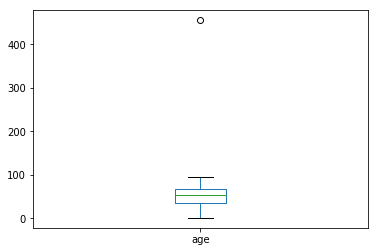

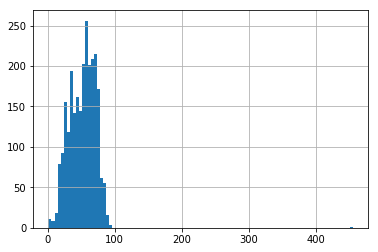

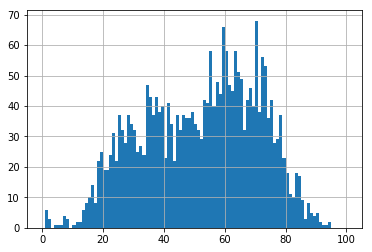

In [37]:
train_data['age'].plot.box()
plt.figure()
train_data['age'].hist(bins=100)
plt.figure()
train_data['age'].hist(bins=100, range=(0,100))
plt.figure()

Uvedena distribucia hodnot naznacuje, ze sa s velkou pravdepodobnostou nejedna o posunutu desatinnu ciarku, pretoze hodnoty TSH by potom mali priblzne rovnaku distribuci v jednotlivych intervaloch magnitudy 10

TSH viac ako 10 :  158
TSH viac ako 100 :  18


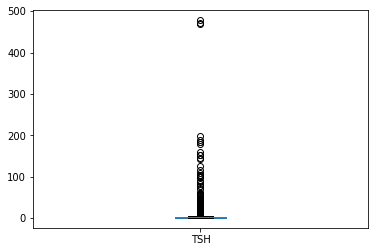

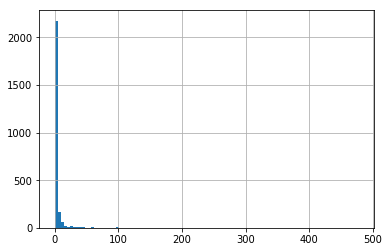

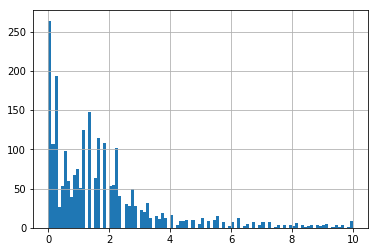

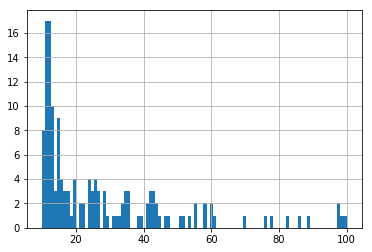

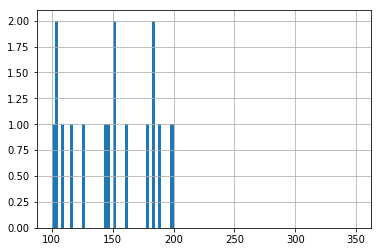

In [51]:
train_data['TSH'].plot.box()
plt.figure()
train_data['TSH'].hist(bins=100)
plt.figure()
train_data['TSH'].hist(bins=100, range=(0, 10.0))
plt.figure()
train_data['TSH'].hist(bins=100, range=(10.0, 100.0))
plt.figure()
train_data['TSH'].hist(bins=100, range=(100.0, 350.0))
plt.figure()

print ("TSH viac ako 10 : ", train_data['TSH'][train_data['TSH'] > 10].count())
print ("TSH viac ako 100 : ", train_data['TSH'][train_data['TSH'] > 100].count())

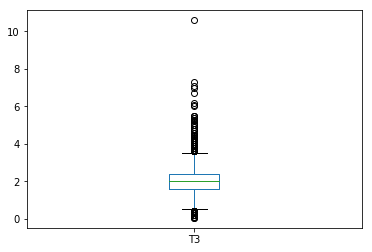

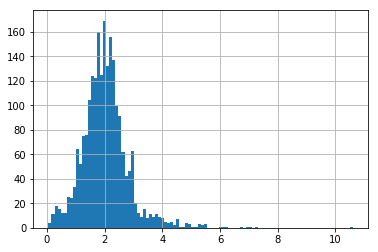

In [38]:
train_data['T3'].plot.box()
plt.figure()
train_data['T3'].hist(bins=100)
plt.figure()

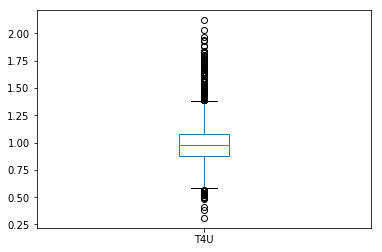

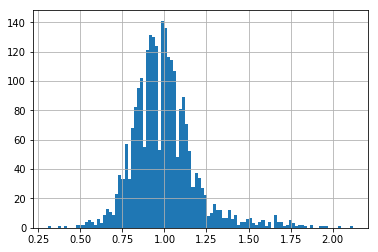

In [39]:
train_data['T4U'].plot.box()
plt.figure()
train_data['T4U'].hist(bins=100)
plt.figure()

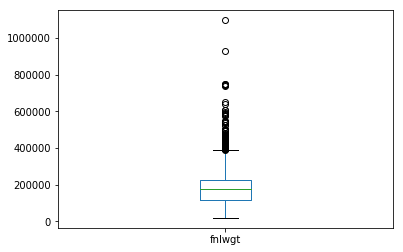

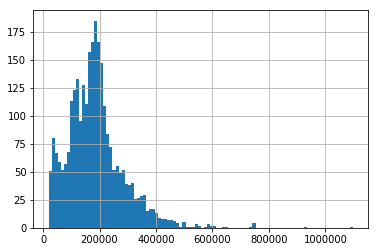

In [95]:
train_data['fnlwgt'].plot.box()
plt.figure()
train_data['fnlwgt'].hist(bins=100)
plt.figure()

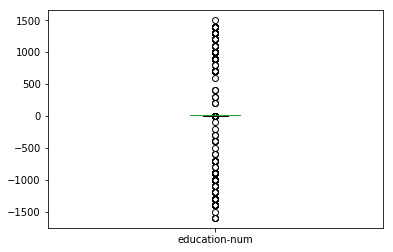

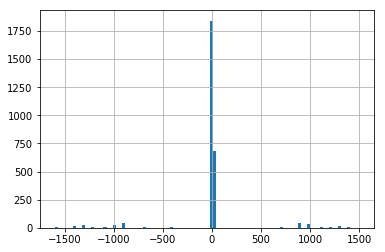

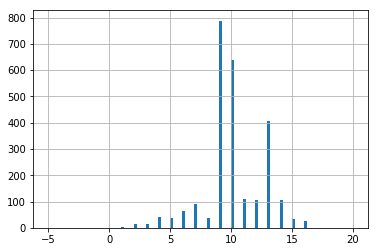

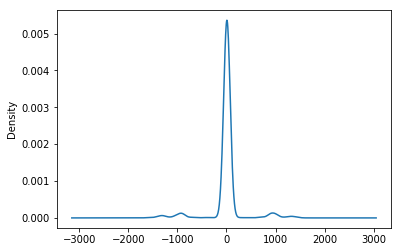

In [64]:
train_data['education-num'].plot.box()
plt.figure()
train_data['education-num'].hist(bins=100)
plt.figure()
train_data['education-num'].hist(bins=100, range=(-5, 20))
plt.figure()
train_data['education-num'].plot(kind="density")

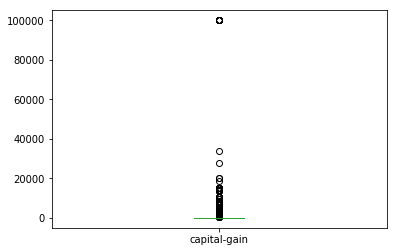

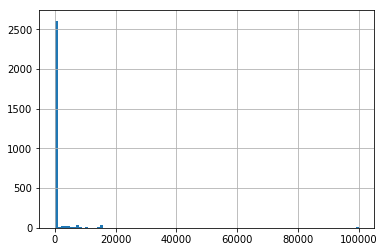

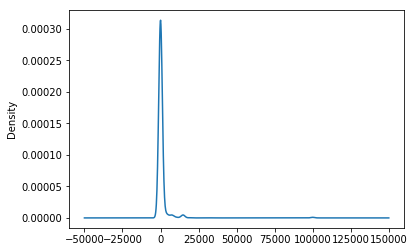

In [63]:
train_data['capital-gain'].plot.box()
plt.figure()
train_data['capital-gain'].hist(bins=100)
plt.figure()
train_data['capital-gain'].plot(kind="density")


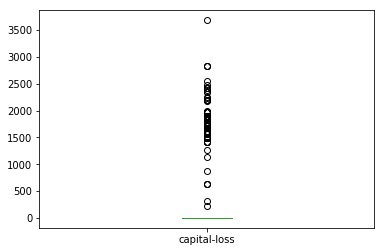

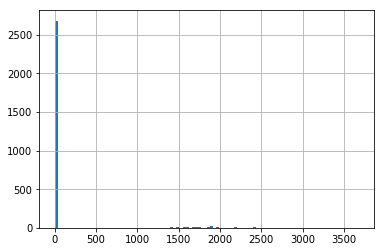

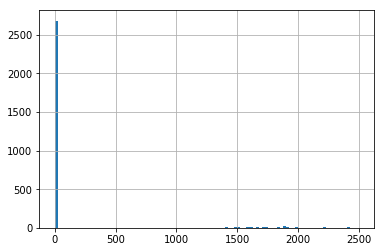

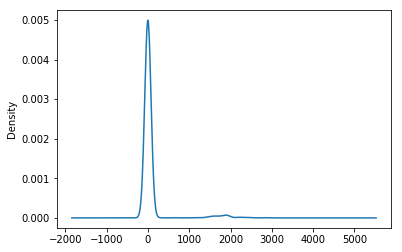

In [62]:
train_data['capital-loss'].plot.box()
plt.figure()
train_data['capital-loss'].hist(bins=100)
plt.figure()
train_data['capital-loss'].plot(kind="density")

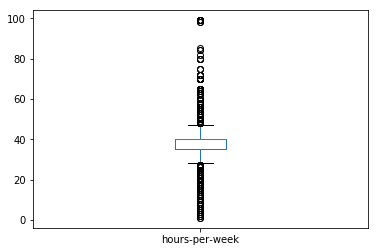

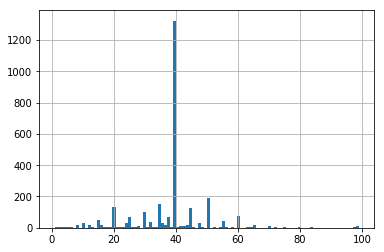

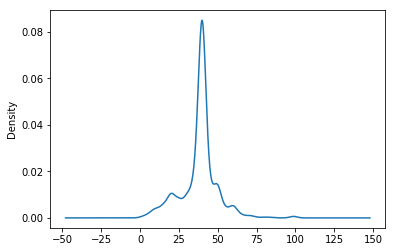

In [61]:
train_data['hours-per-week'].plot.box()
plt.figure()
train_data['hours-per-week'].hist(bins=100)
plt.figure()
train_data['hours-per-week'].plot(kind="density")

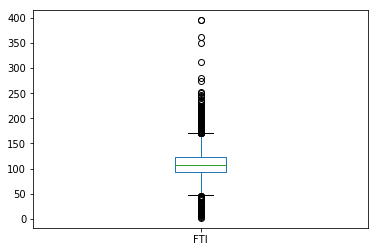

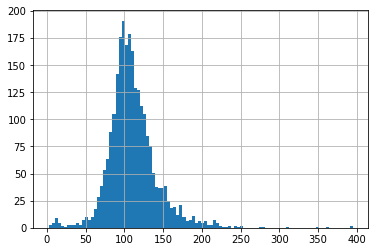

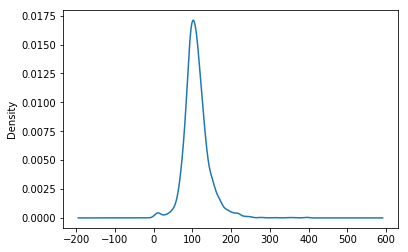

In [16]:
train_data['FTI'].plot.box()
plt.figure()
train_data['FTI'].hist(bins=100)
plt.figure()

In [3]:
train_data.describe(include=['O'])

on thyroxine query on thyroxine pregnant thyroid surgery  \
count          2800               2800     2800            2800   
unique            6                  2        2               2   
top               f                  f        f               f   
freq           2223               2760     2759            2761   

       I131 treatment lithium goitre tumor hypopituitary T3 measured   TT4  \
count            2800    2800   2800  2800          2800        2800  2451   
unique              2       2      2     2             2           2   213   
top                 f       f      f     f             f           t    ??   
freq             2752    2786   2775  2729          2799        2215    99   

       FTI measured TBG measured   TBG referral source           class  \
count          2800         2800  2800            2800            2800   
unique            2            1     1               5            2800   
top               t            f     ?           other  negative.|2580   
freq           2505         2800  2800            1632               1   

       workclass education  marital-status     occupation    relationship  \
count       2800      2800            2800           2800            2800   
unique        14        16               7             26               6   
top      Private   HS-grad   Never-married   Adm-clerical   Not-in-family   
freq        1774       879            1118            449             899   

          race  native-country date_of_birth TSH measured   sex  \
count     2800            2800          2799         2800  2800   
unique       5              38          2721            2     3   
top      White   United-States    1953-02-28            t     F   
freq      2318            2493             3         2516  1830   

       query hyperthyroid TT4 measured on antithyroid medication  sick  \
count                2800         2800                      2800  2800   
unique                  2            2                         2     2   
top                     f            t                         f     f   
freq                 2627         2616                      2766  2690   

       T4U measured psych query hypothyroid      test testID  
count          2800  2800              2800      2800   2800  
unique            2     2                 2         2   2800  
top               t     f                 f  negative    474  
freq           2503  2665              2637      2755      1

In [37]:
for column in train_data.columns[train_data.dtypes == np.object]:
    if train_data[column].unique().size < 50:
        print(column, ':')
        for val in train_data[column].unique():
            print ('   |' + val)
        print()

on thyroxine :
   |f
   |F
   |FALSE
   |t
   |TRUE
   |T

query on thyroxine :
   |f
   |t

pregnant :
   |f
   |t

thyroid surgery :
   |f
   |t

I131 treatment :
   |f
   |t

lithium :
   |f
   |t

goitre :
   |f
   |t

tumor :
   |f
   |t

hypopituitary :
   |f
   |t

T3 measured :
   |t
   |f

FTI measured :
   |t
   |f

TBG measured :
   |f

TBG :
   |?

referral source :
   |SVI
   |other
   |SVHC
   |STMW
   |SVHD

workclass :
   | Local-gov
   | Self-emp-not-inc
   |private
   | Self-emp-inc
   | Private
   | ?
   | State-gov
   |federal-gov
   |local-gov
   | Federal-gov
   |self-emp-not-inc
   |?
   |self-emp-inc
   |state-gov

education :
   | Assoc-voc
   | Bachelors
   | Some-college
   | HS-grad
   | 11th
   | Assoc-acdm
   | 12th
   | 10th
   | Masters
   | 9th
   | 7th-8th
   | Preschool
   | Prof-school
   | 1st-4th
   | Doctorate
   | 5th-6th

marital-status :
   | Married-civ-spouse
   | Divorced
   | Widowed
   | Never-married
   | Separated
   | Married-spouse-abs

In [34]:
for column in train_data.columns[train_data.dtypes == np.object]:
    if train_data[column].unique().size < 50:
        print(train_data[column].value_counts())
        print()

f        2223
t         297
F         126
FALSE     121
TRUE       19
T          14
Name: on thyroxine, dtype: int64

f    2760
t      40
Name: query on thyroxine, dtype: int64

f    2759
t      41
Name: pregnant, dtype: int64

f    2761
t      39
Name: thyroid surgery, dtype: int64

f    2752
t      48
Name: I131 treatment, dtype: int64

f    2786
t      14
Name: lithium, dtype: int64

f    2775
t      25
Name: goitre, dtype: int64

f    2729
t      71
Name: tumor, dtype: int64

f    2799
t       1
Name: hypopituitary, dtype: int64

t    2215
f     585
Name: T3 measured, dtype: int64

t    2505
f     295
Name: FTI measured, dtype: int64

f    2800
Name: TBG measured, dtype: int64

?    2800
Name: TBG, dtype: int64

other    1632
SVI       771
SVHC      275
STMW       91
SVHD       31
Name: referral source, dtype: int64

 Private             1774
private               200
 Local-gov            192
 Self-emp-not-inc     160
 ?                    152
 State-gov            113
 Federal-go

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


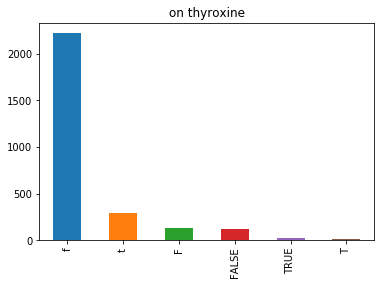

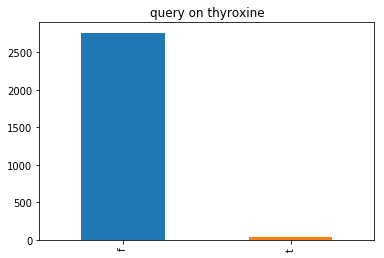

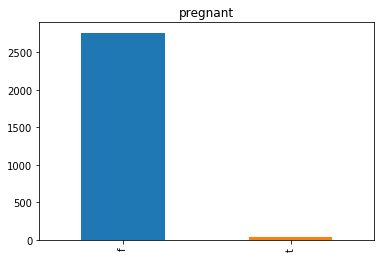

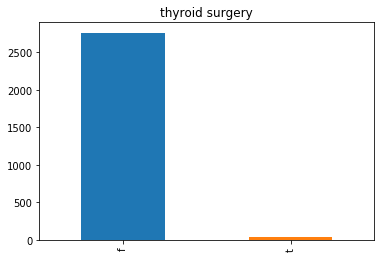

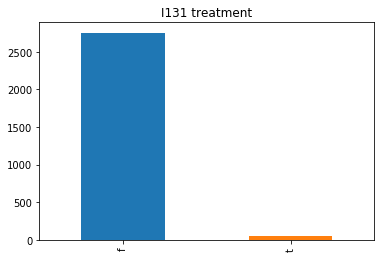

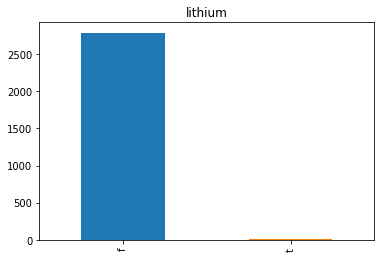

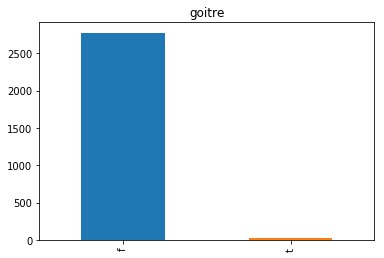

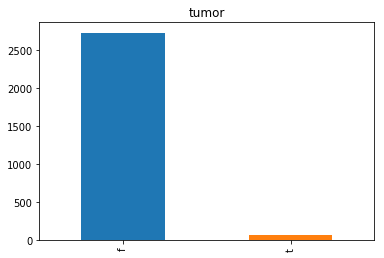

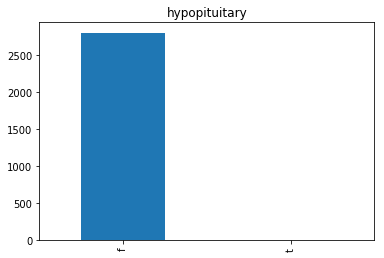

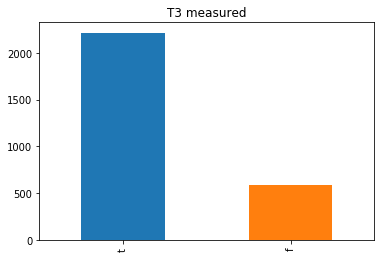

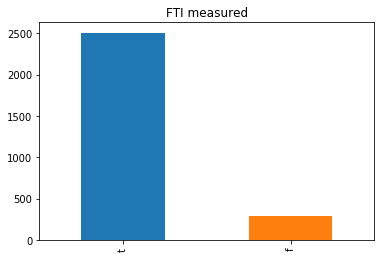

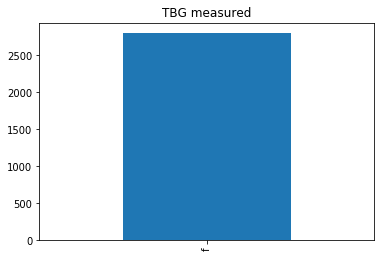

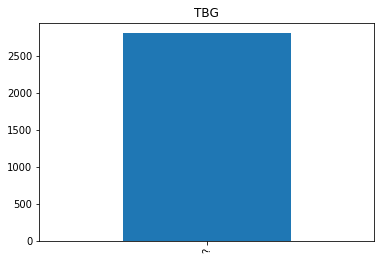

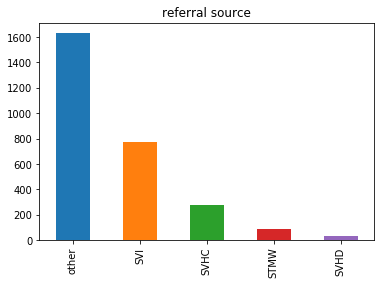

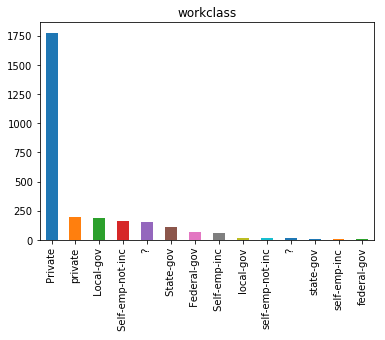

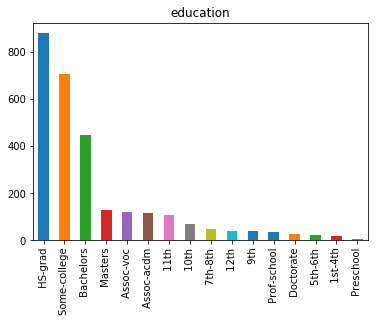

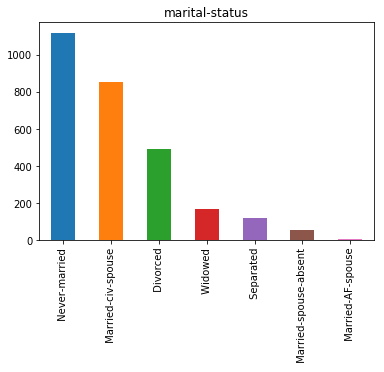

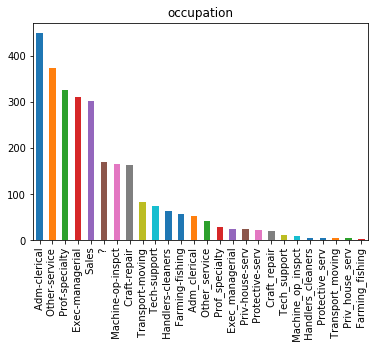

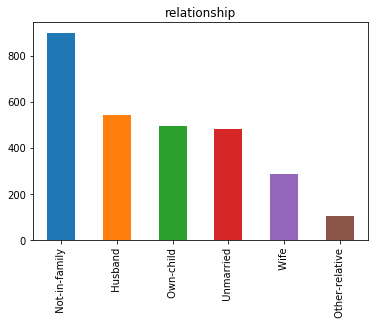

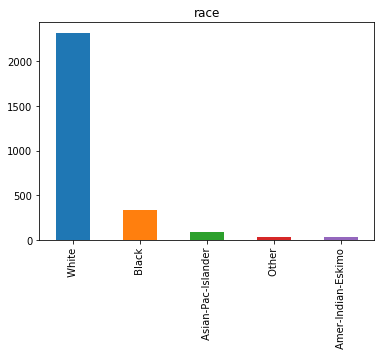

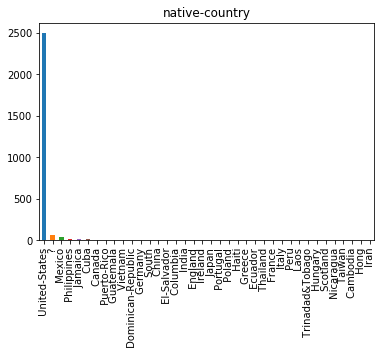

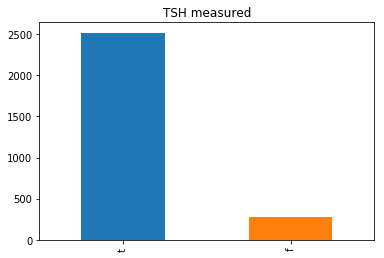

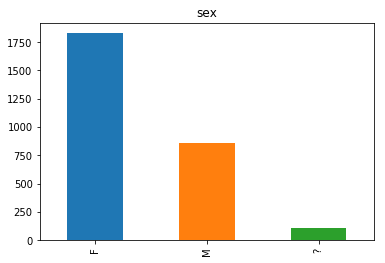

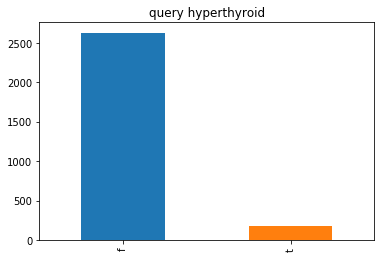

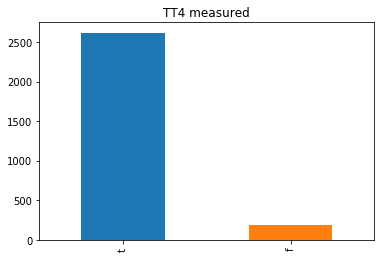

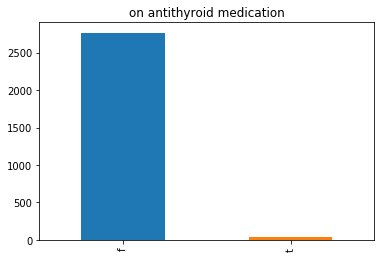

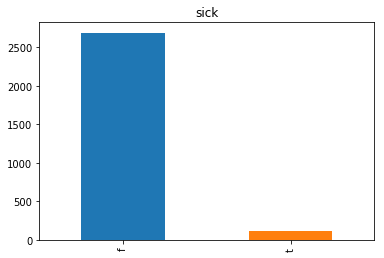

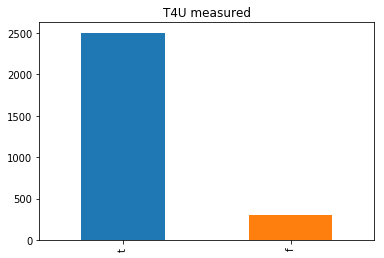

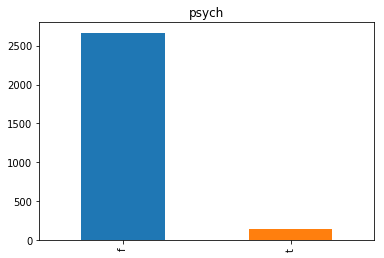

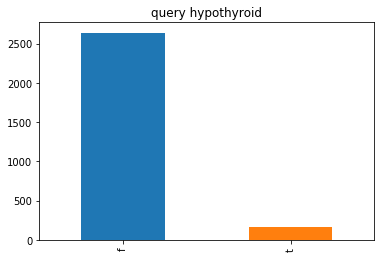

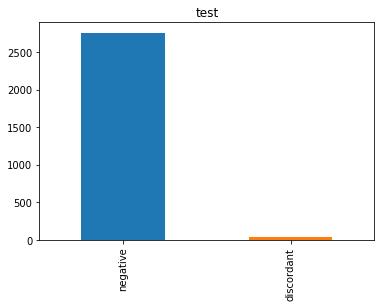

In [75]:
for column in train_data.columns[train_data.dtypes == np.object]:
    if train_data[column].unique().size < 50:
        train_data[column].value_counts().plot(kind='bar', title=column)
        plt.figure()

In [86]:
train_data['hypopituitary'].value_counts()

f    2799
t       1
Name: hypopituitary, dtype: int64

In [60]:
for column in train_data.columns:
    b = train_data[column].isnull()
    print(column, ": ", b[b == True].count())

age :  281
on thyroxine :  0
query on thyroxine :  0
pregnant :  0
thyroid surgery :  0
I131 treatment :  0
lithium :  0
goitre :  0
tumor :  0
hypopituitary :  0
TSH :  284
T3 measured :  0
T3 :  585
TT4 :  349
T4U :  297
FTI measured :  0
TBG measured :  0
TBG :  0
referral source :  0
class :  0
workclass :  0
fnlwgt :  0
education :  0
education-num :  0
marital-status :  0
occupation :  0
relationship :  0
race :  0
capital-gain :  0
capital-loss :  0
hours-per-week :  0
native-country :  0
date_of_birth :  1
TSH measured :  0
sex :  0
query hyperthyroid :  0
TT4 measured :  0
on antithyroid medication :  0
FTI :  0
sick :  0
T4U measured :  0
psych :  0
query hypothyroid :  0


## 2.1 Analýza dvojíc atribútov
### 2.1.1 Kategorické-kategorické atribúty

Kedže možnosti kombinácii kategorických atribútov bolo veľké množstvo, ktoré nebolo v našich časových možnostiach pokrzť, royhodli sme sa napísať krátku heuristiku pre prvotné vylúčenie nezaujímavých kombinácii, ktorá samozrejme, . Z analýzy sme vylúčili aj zrejmé, či zbytočne špekulatívne kombinácie atribútov a taktiež aj také, ktoré sa týkali skôr spoločenskovedných záležitostí a najskôr by vzhľadom na povahu dátového súboru beztak nepriniesli pravdivý výsledok.

In [ ]:
for column in train_data.columns[train_data.dtypes == np.object]:
    for column2 in train_data.columns[train_data.dtypes == np.object]:
        if train_data[column].unique().size < 10 and train_data[column2].unique().size < 10 and column != column2:
            non_uniform = False
            ctab = pd.crosstab(index=train_data[column], columns=train_data[column2], normalize='index')
            for col in ctab.columns[:-1]:
                if (ctab[col].std() / ctab[col].mean() > 0.15):
                    non_uniform = True
                    break
            if non_uniform:
                ctab.plot.bar()



Algoritmus jednoducho zistí rozptyl v relatívnej početnosti jednotlivých hodnôt atribútu riadkov pre daný stĺpec a ak variácia v týchto relatívnych početnostiach neprekročí istý prah ani v jednom zo stĺpcov, je rozumné sa domnievať, že tieto relatívne početnosti jednotlivých riadkov sú pre stĺpce rovnaké a teda zmena hodnôt na riadkoch neovplyvňuje hodnotu stĺpca.
Pre nepriehľadnosť zobrazenia sme museli pre vizuálnu analýzu a zobrazenie vzťahu atribútov niektoré kombinácie nadobudajúce väčšie množstvo hodnôt vylúčiť.
Tento algoritmus je založený na tom, ako by sme my hľadali závislosti v zobrazení početností dvoch kategorických atribútov.
Zobrazenie sme zvolili pomocou **********. Na prvý pohľad sa síce ťažšie interpretujú výsledky, avšak toto zobrazenie je dobrou ilustráciou toho, ako vyšší algoritmus funguje. Ak by v každom stĺpci boli pre danú farbu rovnaké výšky, značilo by to, že sa od seba relatívne početnosti týchto atribútov v jednotlivých stĺpcoch neodlišujú.

Zdroje neposkytujú rovnako rozložene dáta. Najvýraznejšie je to možno pozorovať u SVHD, kde boli všetky testy negatívne, TSH sa nemeralo, atribút psych bol vylúčne nepravdivý. "Iné" zdroje zas mali menší podiel vo vykonaných medicínskych meraniach (TSH, T3...). Toto mohlo mať vplyv aj na závislosť iných atribútov na zdroji.

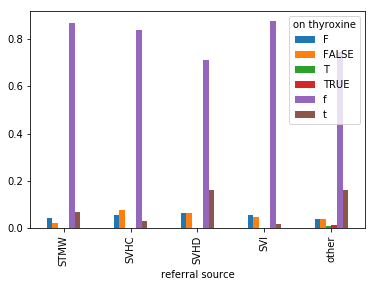

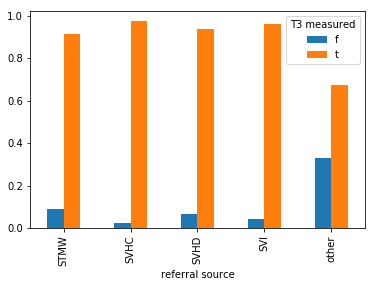

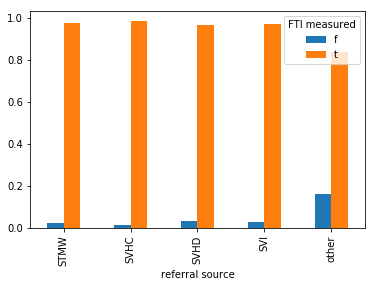

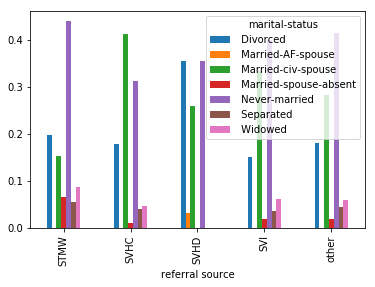

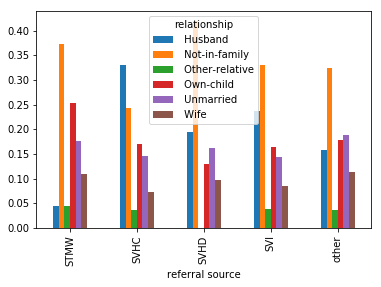

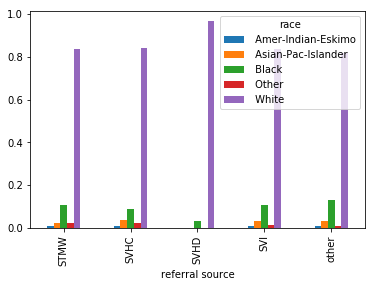

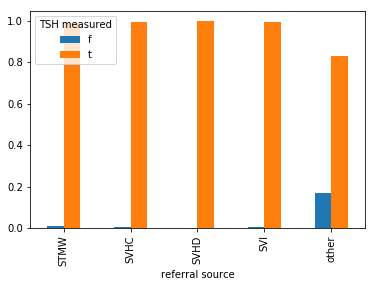

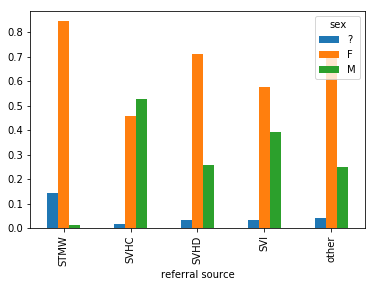

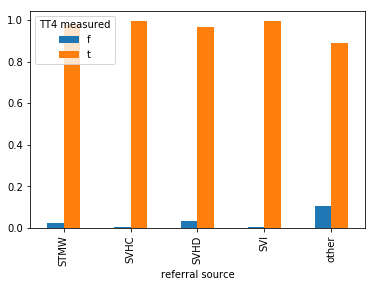

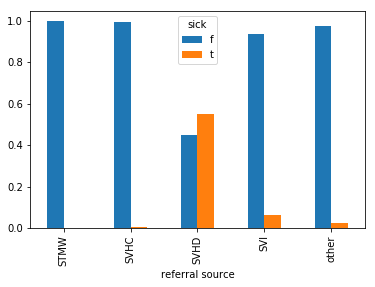

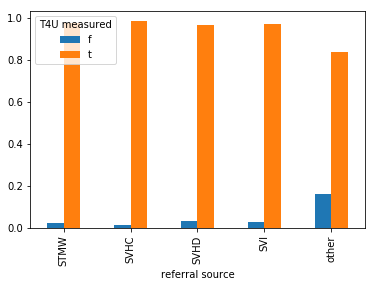

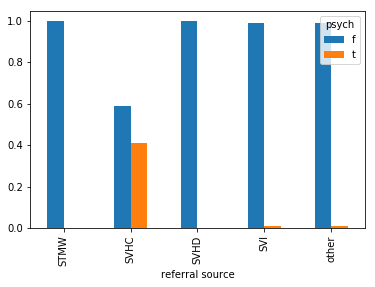

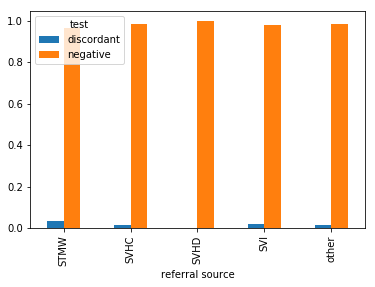

In [8]:
for column2 in train_data.columns[train_data.dtypes == np.object]:
    if train_data['referral source'].unique().size < 10 and train_data[column2].unique().size < 10 and 'referral source' != column2:
        non_uniform = False
        ctab = pd.crosstab(index=train_data['referral source'], columns=train_data[column2], normalize='index')
        for col in ctab.columns[:-1]:
            if (ctab[col].std() / ctab[col].mean() > 0.15):
                non_uniform = True
                break
        if non_uniform:
            ctab.plot.bar()

Vykonávanie medicínskych meraní sa zdá byť previazané, t.j. keď už sa vykonalo niektoré z medicínskych meraní, vyskytoval sa už aj väčší počet iných medicínskych meraní. FTI, T4U a TT4 sú takmer vždy merané súčasne.

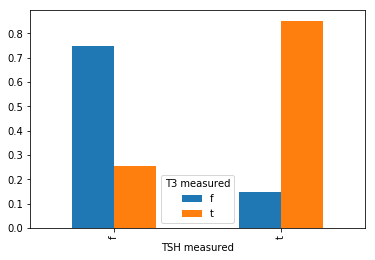

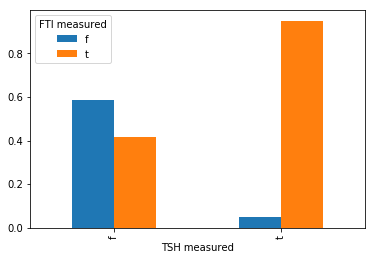

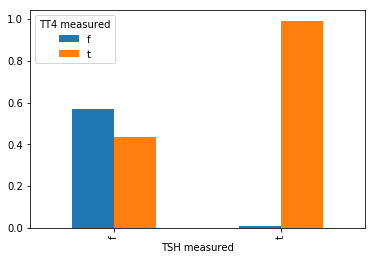

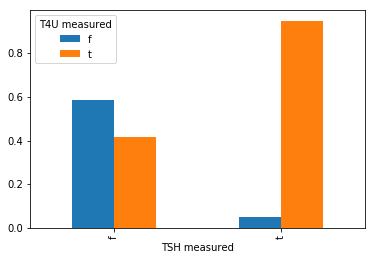

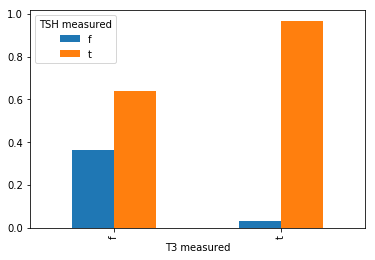

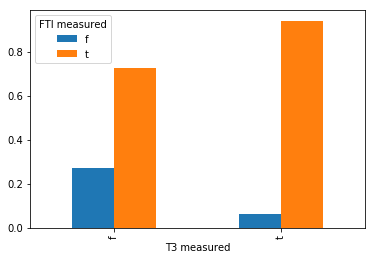

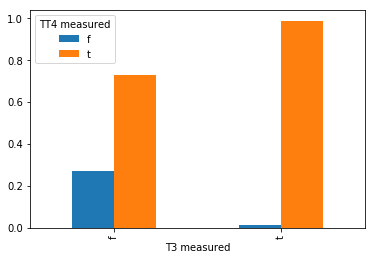

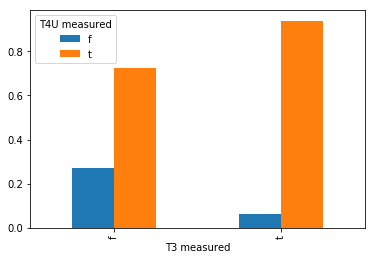

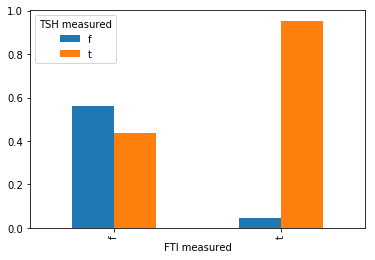

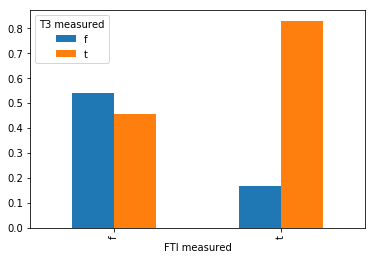

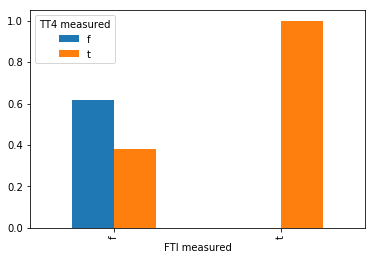

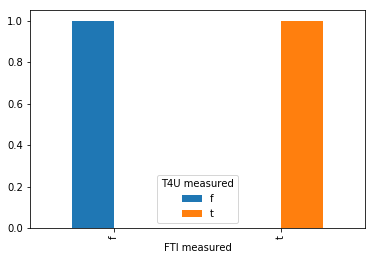

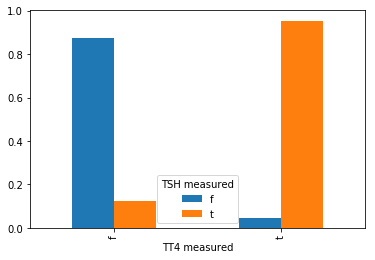

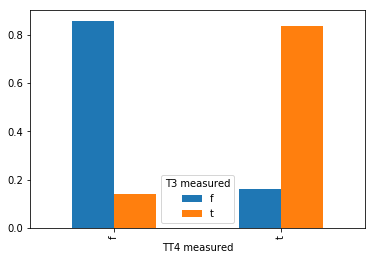

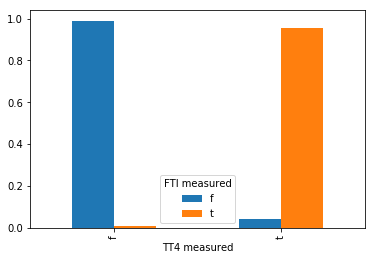

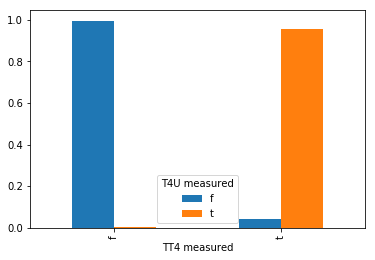

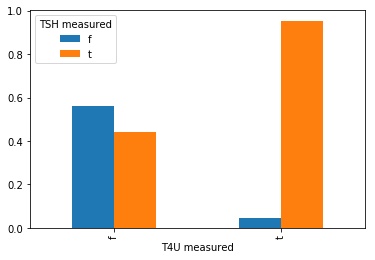

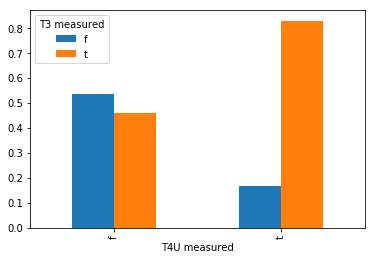

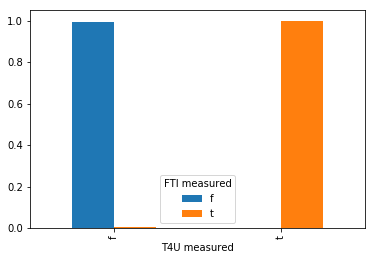

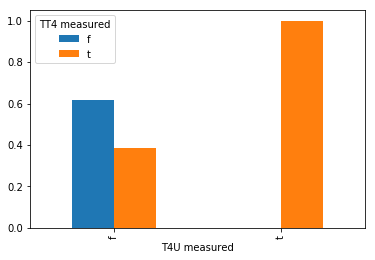

In [12]:
cols = ['TSH measured', 'T3 measured', 'FTI measured', 'TT4 measured', 'T4U measured']

for i in range(len(cols)):
    for j in range(len(cols)):
        if train_data[cols[i]].unique().size < 10 and train_data[cols[j]].unique().size < 10 and i != j:
            non_uniform = False
            ctab = pd.crosstab(index=train_data[cols[i]], columns=train_data[cols[j]], normalize='index')
            for col in ctab.columns[:-1]:
                if (ctab[col].std() / ctab[col].mean() > 0.15):
                    non_uniform = True
                    break
            if non_uniform:
                ctab.plot.bar()

Tehotné ženy mali vždy vyššie podiely vykonaních meraní ako netehotné, FTI, TT4 a T4U im bolo merané vždy. Všetky tehotné ženy mali negatívny výsledok testu.

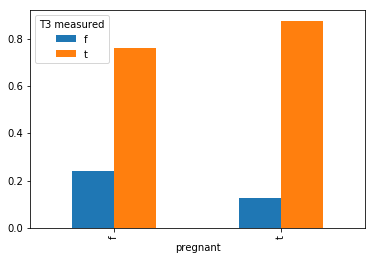

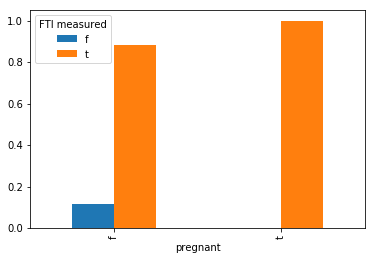

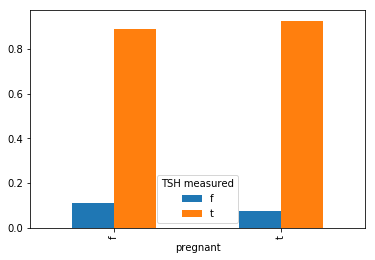

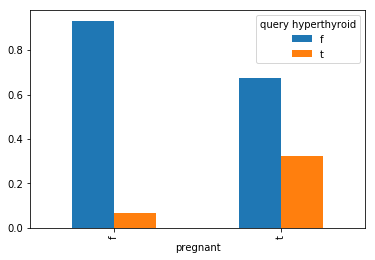

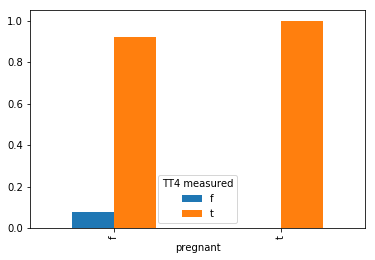

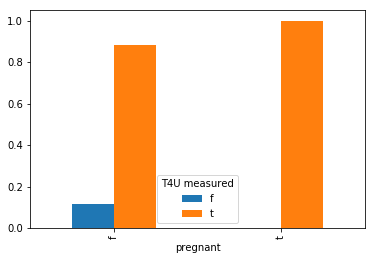

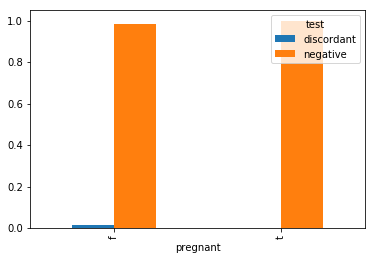

In [13]:
for column2 in ['T3 measured', 'FTI measured', 'TSH measured', 'query hyperthyroid', 'TT4 measured', 'T4U measured', 'test']:
    if train_data[train_data['sex'] == 'F']['pregnant'].unique().size < 10 and train_data[column2].unique().size < 10 and 'pregnant' != column2:
        non_uniform = False
        ctab = pd.crosstab(index=train_data[train_data['sex'] == 'F']['pregnant'], columns=train_data[column2], normalize='index')
        for col in ctab.columns[:-1]:
            if (ctab[col].std() / ctab[col].mean() > 0.15):
                non_uniform = True
                break
        if non_uniform:
            ctab.plot.bar()

Väčší podiel mužov ako žien malo strumu. Keď sa vyskytovala struma, test bol vždy negatívny.

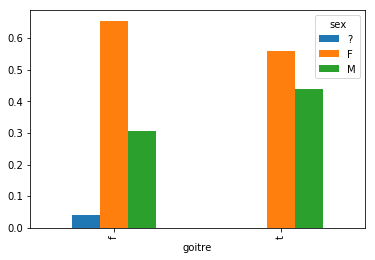

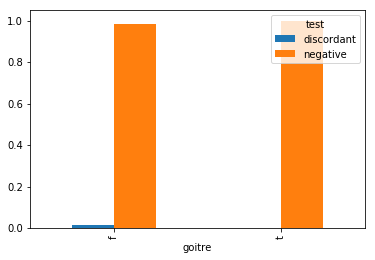

In [14]:
pd.crosstab(index=train_data['goitre'], columns=train_data['sex'], normalize='index').plot.bar()
pd.crosstab(index=train_data['goitre'], columns=train_data['test'], normalize='index').plot.bar()

Väčší podiel žien ako mužov malo tumor. Keď sa vyskytoval tumor, test bol vždy negatívny.

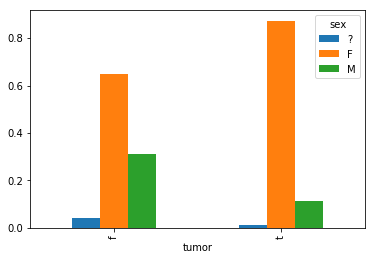

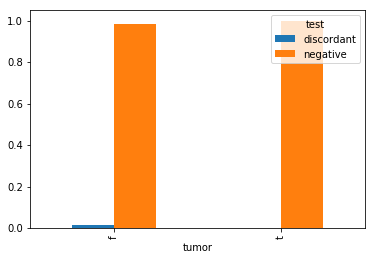

In [16]:
pd.crosstab(index=train_data['tumor'], columns=train_data['sex'], normalize='index').plot.bar()
pd.crosstab(index=train_data['tumor'], columns=train_data['test'], normalize='index').plot.bar()

Lítium je prítomné len s vykonaním všetkých medicínskych meraní. Keď je lítium prítomné, test je vždy negatívny.

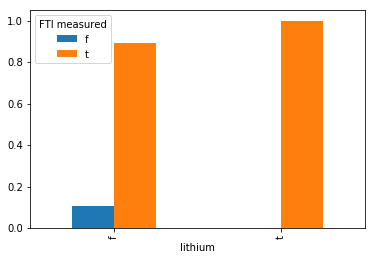

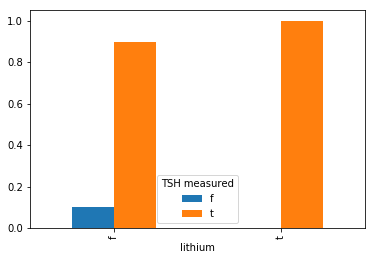

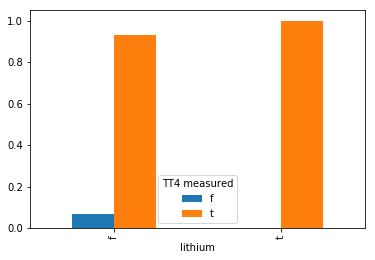

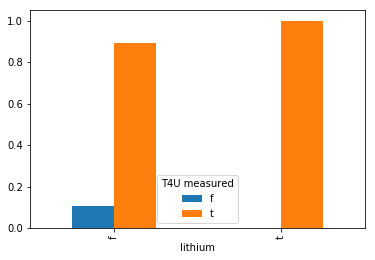

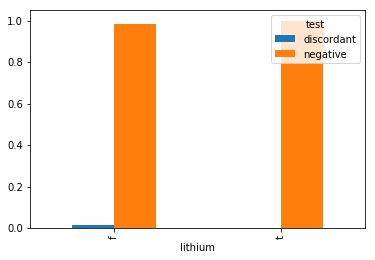

In [20]:
for column2 in ['T3 measured', 'FTI measured', 'TSH measured', 'query hyperthyroid', 'TT4 measured', 'T4U measured', 'test']:
    if train_data['lithium'].unique().size < 10 and train_data[column2].unique().size < 10 and 'lithium' != column2:
        non_uniform = False
        ctab = pd.crosstab(index=train_data['lithium'], columns=train_data[column2], normalize='index')
        for col in ctab.columns[:-1]:
            if (ctab[col].std() / ctab[col].mean() > 0.15):
                non_uniform = True
                break
        if non_uniform:
            ctab.plot.bar()

Pri I131 liečbe boli všetky testy negatívne a vždy sa vykonali TSH a TT4 merania. Pri I131 liečbe bol test vždy negatívny.

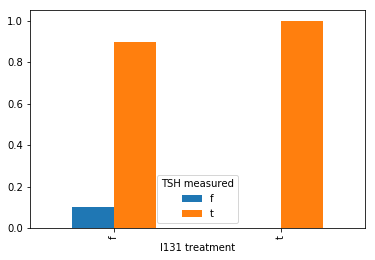

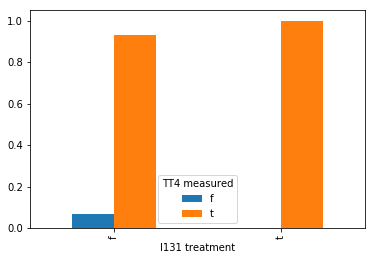

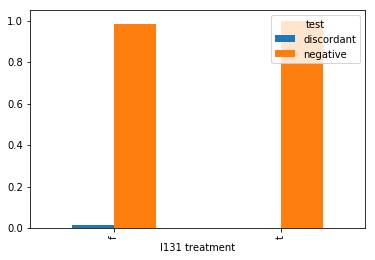

In [76]:
for column2 in ['TSH measured', 'TT4 measured', 'test']:
    if train_data['I131 treatment'].unique().size < 10 and train_data[column2].unique().size < 10 and 'I131 treatment' != column2:
        non_uniform = False
        ctab = pd.crosstab(index=train_data['I131 treatment'], columns=train_data[column2], normalize='index')
        for col in ctab.columns[:-1]:
            if (ctab[col].std() / ctab[col].mean() > 0.15):
                non_uniform = True
                break
        if non_uniform:
            ctab.plot.bar()

Ženy mali vačší relatívny počet thyroid operácií ako muži, operácia bola spojená vždy s TSH a TT4 meraniami a pri operácii bol vždy test negatívny.

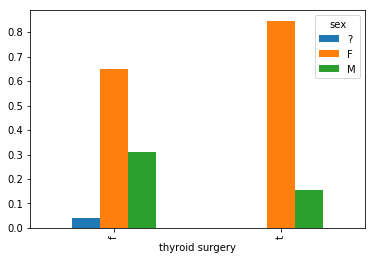

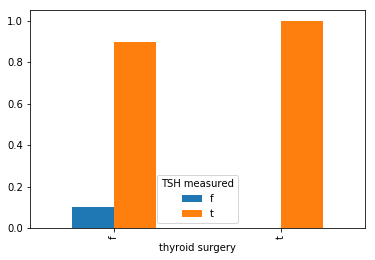

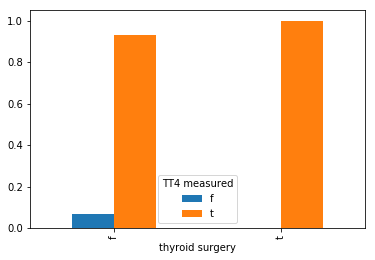

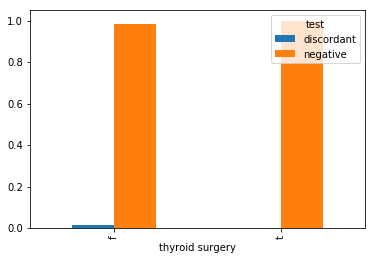

In [78]:
for column2 in ['sex', 'TSH measured', 'TT4 measured' , 'test']:
    if train_data['thyroid surgery'].unique().size < 10 and train_data[column2].unique().size < 10 and 'thyroid surgery' != column2:
        non_uniform = False
        ctab = pd.crosstab(index=train_data['thyroid surgery'], columns=train_data[column2], normalize='index')
        for col in ctab.columns[:-1]:
            if (ctab[col].std() / ctab[col].mean() > 0.15):
                non_uniform = True
                break
        if non_uniform:
            ctab.plot.bar()

Dopyt po tyroxínu sa vyskytoval o niečo viac po nameraní T4U a FTI, naopak nameranie T3 a TSH znižovali dopyt po tyroxínu. Muži mali vačší dopyt po tyroxínu. Tyroxín bol prítomný len ak bolo merané TT4. Test bol pri dopyte vždy negatívny.

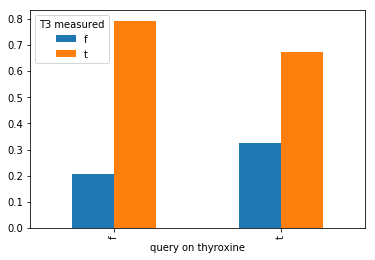

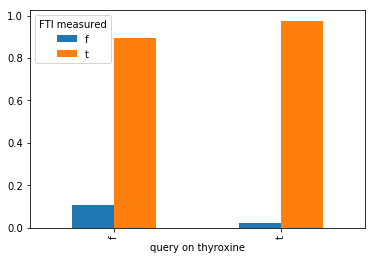

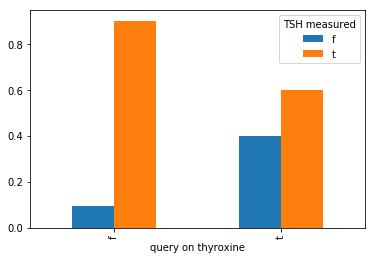

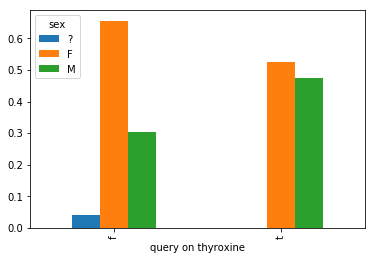

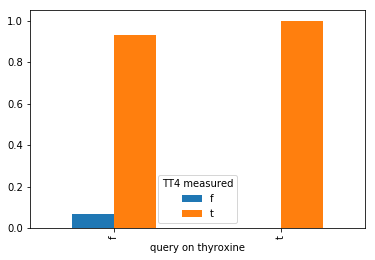

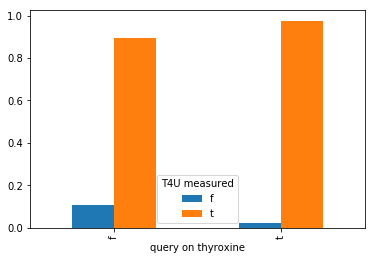

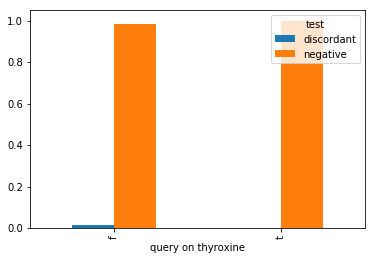

In [22]:
for column2 in ['T3 measured', 'FTI measured', 'TSH measured', 'sex', 'TT4 measured', 'T4U measured', 'test']:
    if train_data['query on thyroxine'].unique().size < 10 and train_data[column2].unique().size < 10 and 'query on thyroxine' != column2:
        non_uniform = False
        ctab = pd.crosstab(index=train_data['query on thyroxine'], columns=train_data[column2], normalize='index')
        for col in ctab.columns[:-1]:
            if (ctab[col].std() / ctab[col].mean() > 0.15):
                non_uniform = True
                break
        if non_uniform:
            ctab.plot.bar()

In [ ]:
Dopyt po hyperthyroide je vačší u žien ako u mužov.

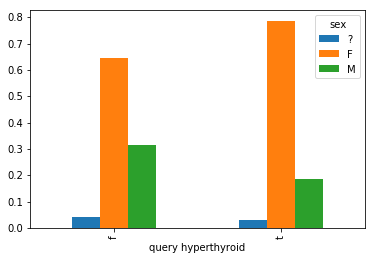

In [23]:
pd.crosstab(index=train_data['query hyperthyroid'], columns=train_data['sex'], normalize='index').plot.bar()

Pri nameraní T3 bol dopyt po hypothyroidu menší ako pri jeho nenameraní, pri nameraní TSH bol dopyt väčší, menší rozdiel v relatívnej početnosti bol aj pri pohlaviach.

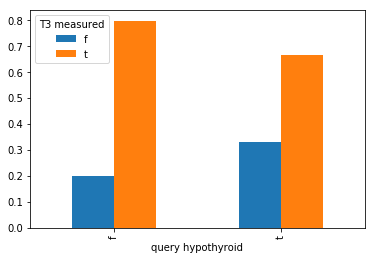

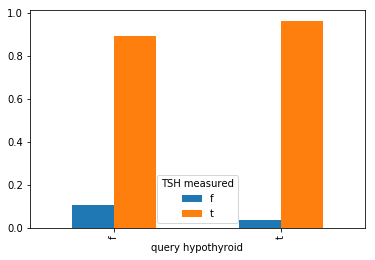

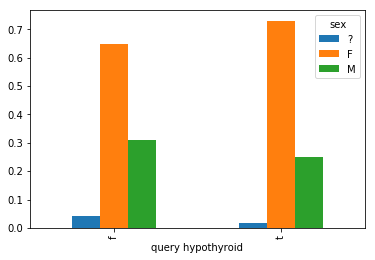

In [26]:
for column2 in ['T3 measured', 'TSH measured', 'sex']:
    if train_data['query hypothyroid'].unique().size < 10 and train_data[column2].unique().size < 10 and 'query hypothyroid' != column2:
        non_uniform = False
        ctab = pd.crosstab(index=train_data['query hypothyroid'], columns=train_data[column2], normalize='index')
        for col in ctab.columns[:-1]:
            if (ctab[col].std() / ctab[col].mean() > 0.15):
                non_uniform = True
                break
        if non_uniform:
            ctab.plot.bar()

Pri nameraní FTI, TT4 a T4U bola medikácia o niečo málo menej častejšia ako pri jeho nenameraní, naopak častejšia bola u žien a po nameraní TSH. Pri medikácii boli všetky testy negatívne.

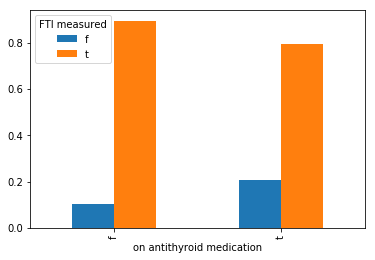

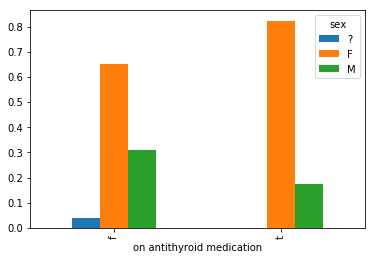

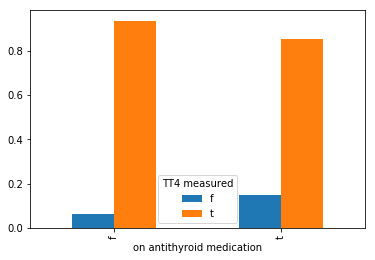

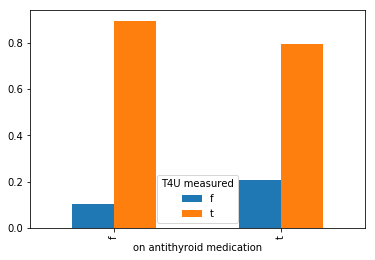

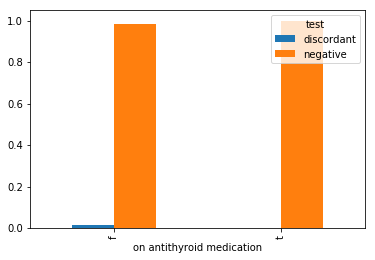

In [51]:
for column2 in ['T3 measured', 'FTI measured', 'TSH measured', 'sex', 'TT4 measured', 'T4U measured', 'test']:
    if train_data['on antithyroid medication'].unique().size < 10 and train_data[column2].unique().size < 10 and 'on antithyroid medication' != column2:
        non_uniform = False
        ctab = pd.crosstab(index=train_data['on antithyroid medication'], columns=train_data[column2], normalize='index')
        for col in ctab.columns[:-1]:
            if (ctab[col].std() / ctab[col].mean() > 0.15):
                non_uniform = True
                break
        if non_uniform:
            ctab.plot.bar()

Pri chorobe boli všetky testy negatívne.

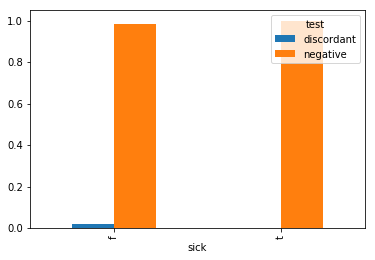

In [50]:
pd.crosstab(index=train_data['sick'], columns=train_data['test'], normalize='index').plot.bar()

Prítomnosť psych bola zdánlivo celkovo podmienená meraniu TSH a TT4, ostané medicínske merania boli tiež veľmi vysokým pomerom prítomne. Psych bolo častejšie u mužov.

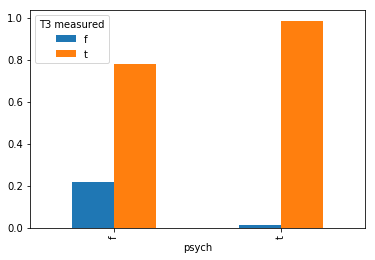

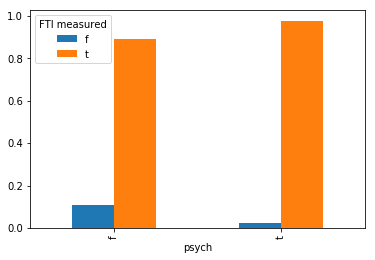

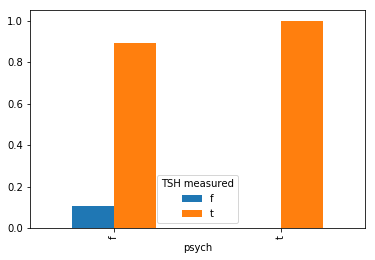

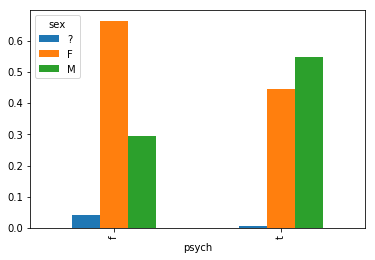

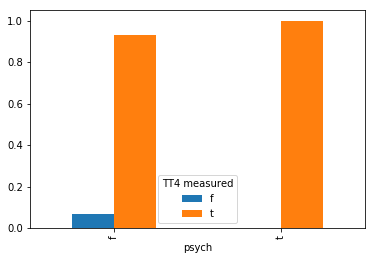

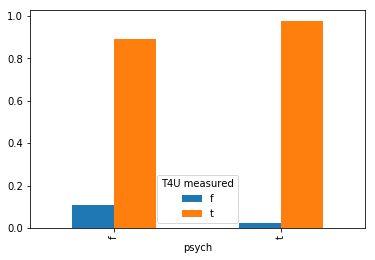

In [49]:
for column2 in ['T3 measured', 'FTI measured', 'TSH measured', 'sex', 'TT4 measured', 'T4U measured', 'test']:
    if train_data['psych'].unique().size < 10 and train_data[column2].unique().size < 10 and 'psych' != column2:
        non_uniform = False
        ctab = pd.crosstab(index=train_data['psych'], columns=train_data[column2], normalize='index')
        for col in ctab.columns[:-1]:
            if (ctab[col].std() / ctab[col].mean() > 0.15):
                non_uniform = True
                break
        if non_uniform:
            ctab.plot.bar()

Pri negatívnom teste boli medicínske dáta menej namerané, pri nesúhlasnom viac, dokonca pri nesúhlasnom teste boli TSH a TT4  namerané vždy. Ženy mali viac negatívnych testov ako muži.

In [64]:
for column2 in ['T3 measured', 'FTI measured', 'TSH measured', 'sex', 'TT4 measured', 'T4U measured', 'test']:
    if train_data['test'].unique().size < 10 and train_data[column2].unique().size < 10 and 'test' != column2:
        non_uniform = False
        ctab = pd.crosstab(index=train_data['test'], columns=train_data[column2], normalize='index')
        for col in ctab.columns[:-1]:
            if (ctab[col].std() / ctab[col].mean() > 0.15):
                non_uniform = True
                break
        if non_uniform:
            ctab.plot.bar()

Je možne si povšimnúť, že mnohé atribúty závisely od krajiny. V iráne nebol nikto na tyroxíne, tehotný boli len v Kambodži, Dominikánskej republike, Kanade a v neznámej krajine, thyroid operácia, I131 liečba nebola vo väčšine krajinách, Lítium bolo pritomné len v Kambodži a v USA. Tumor bol len v štyroch krajinách v krajine Hong (Kong?) neboli vykonávané medicínske pozorovania, v iných (napríklad Peru, Kambodža, Írsko) boli vykonané všetky. Zdroje čerpali z odlišných kombinácií krajín, v niektorých krajinách (Irán, Laos, Portugalsko, Taiwan...) prevažovali ženatý ľudia, či z pohľadu vzťahu len manželky (Hong (Kong?), Irán..). Atribút vzťahu aj rodinného stavu boli veľmi variabilne porozdelované do jednotlivých hodnôt. Podľa očakávania isté rasy prevažovali v istých krajinách (Európske krajiny - belosi, Karibik - černosi, Ázia - aziati). Z niektorých krajín boli získané len pozorovania výlučne mužov (Grécko, Nikaragua), či žien (Hong (Kong?), Irán, Peru). Testy boli nezhodné v Kolumbii, El-Salvádore, Guatemale, USA a vo Vietname, v ostatných krajinách boli výlučne negatívne.

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


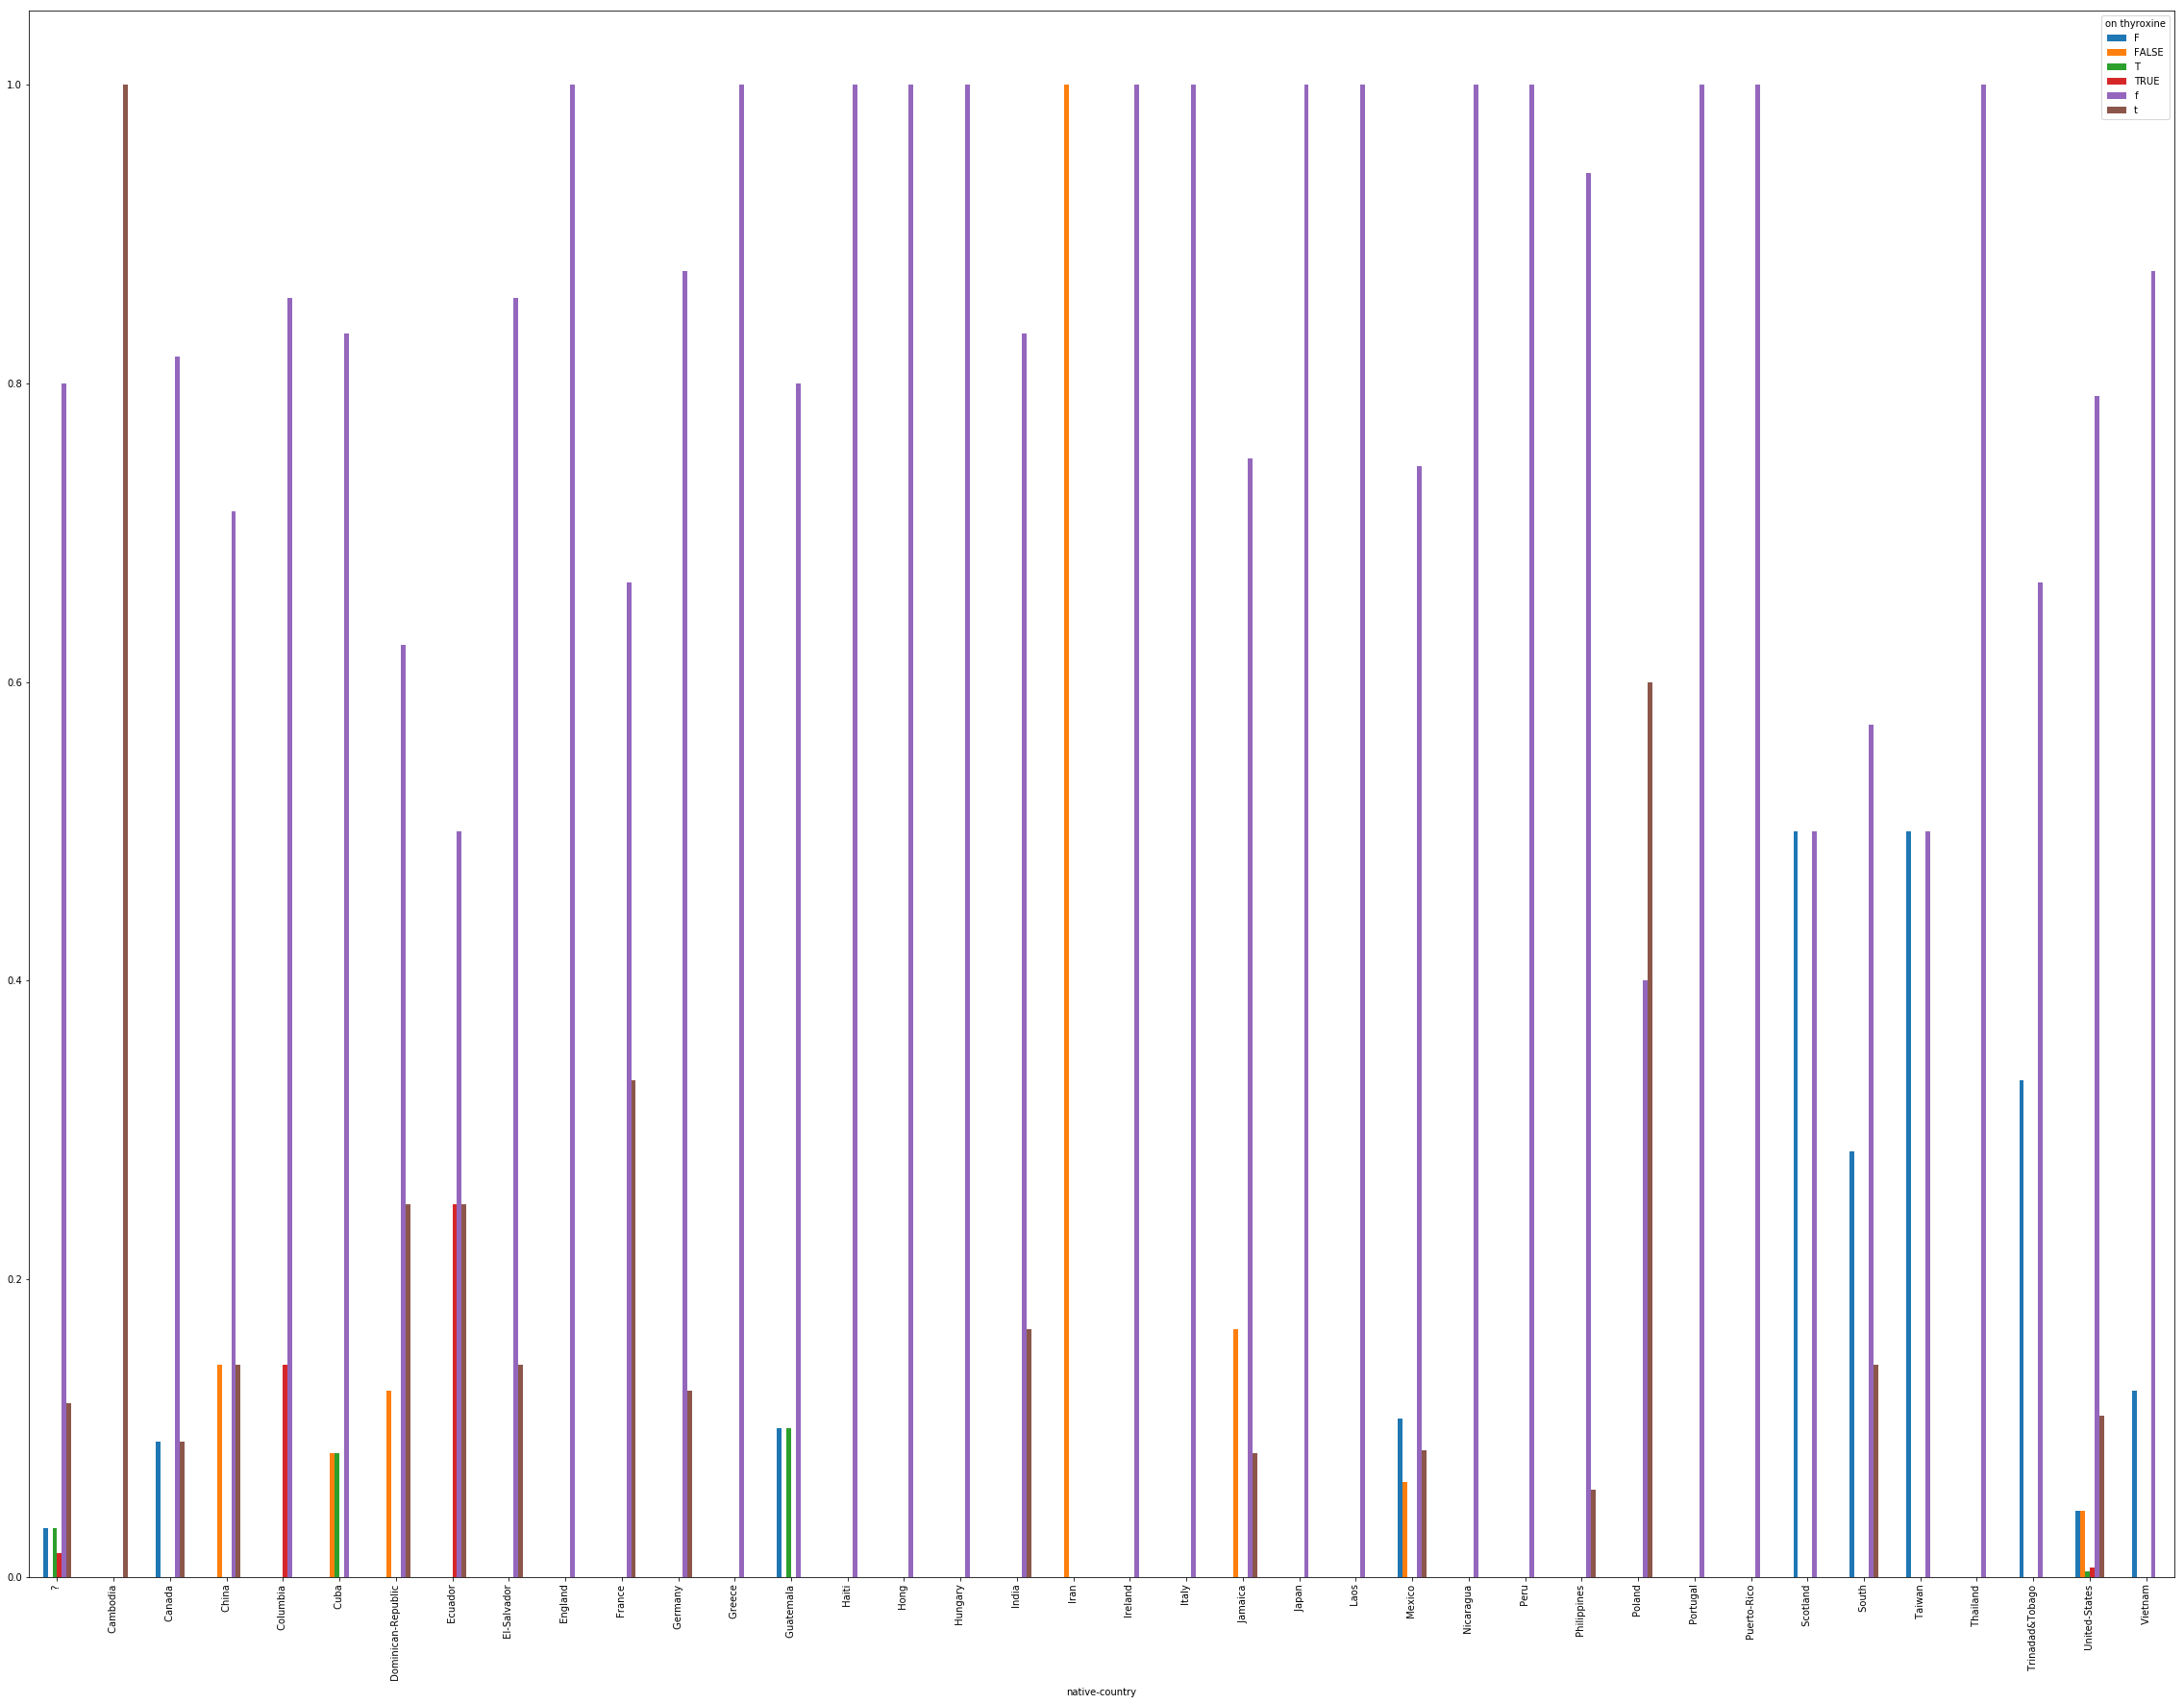

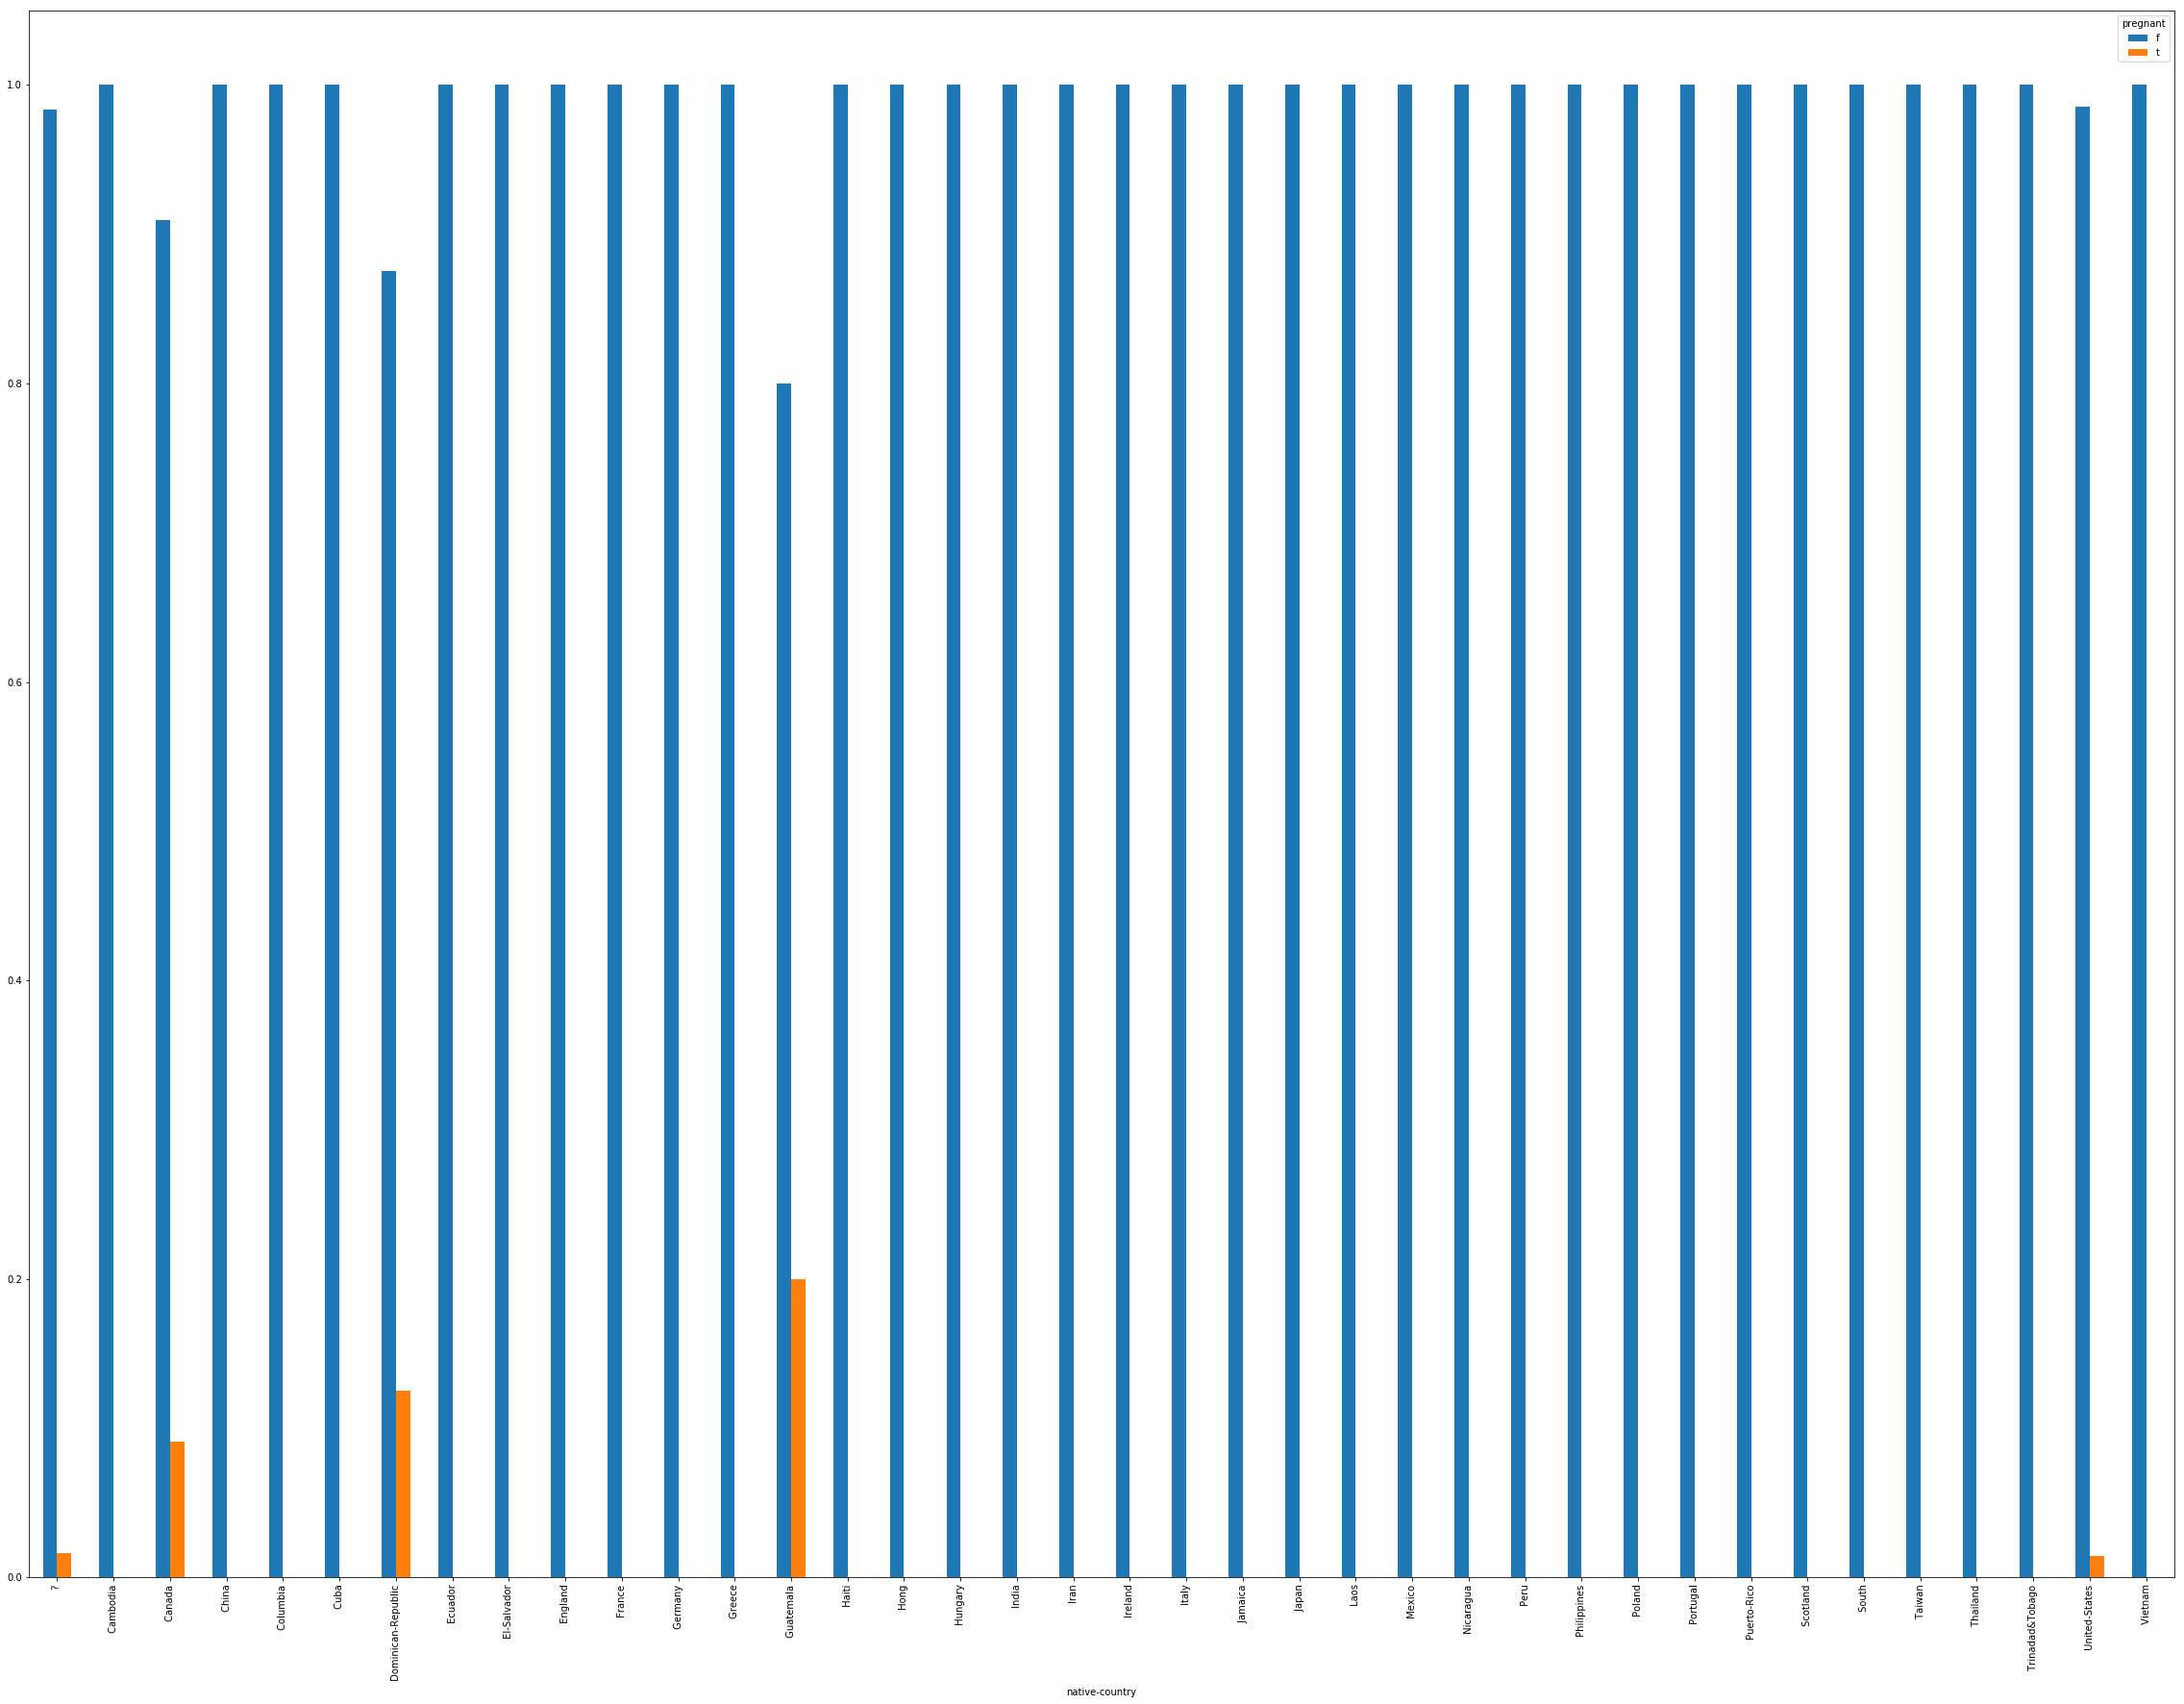

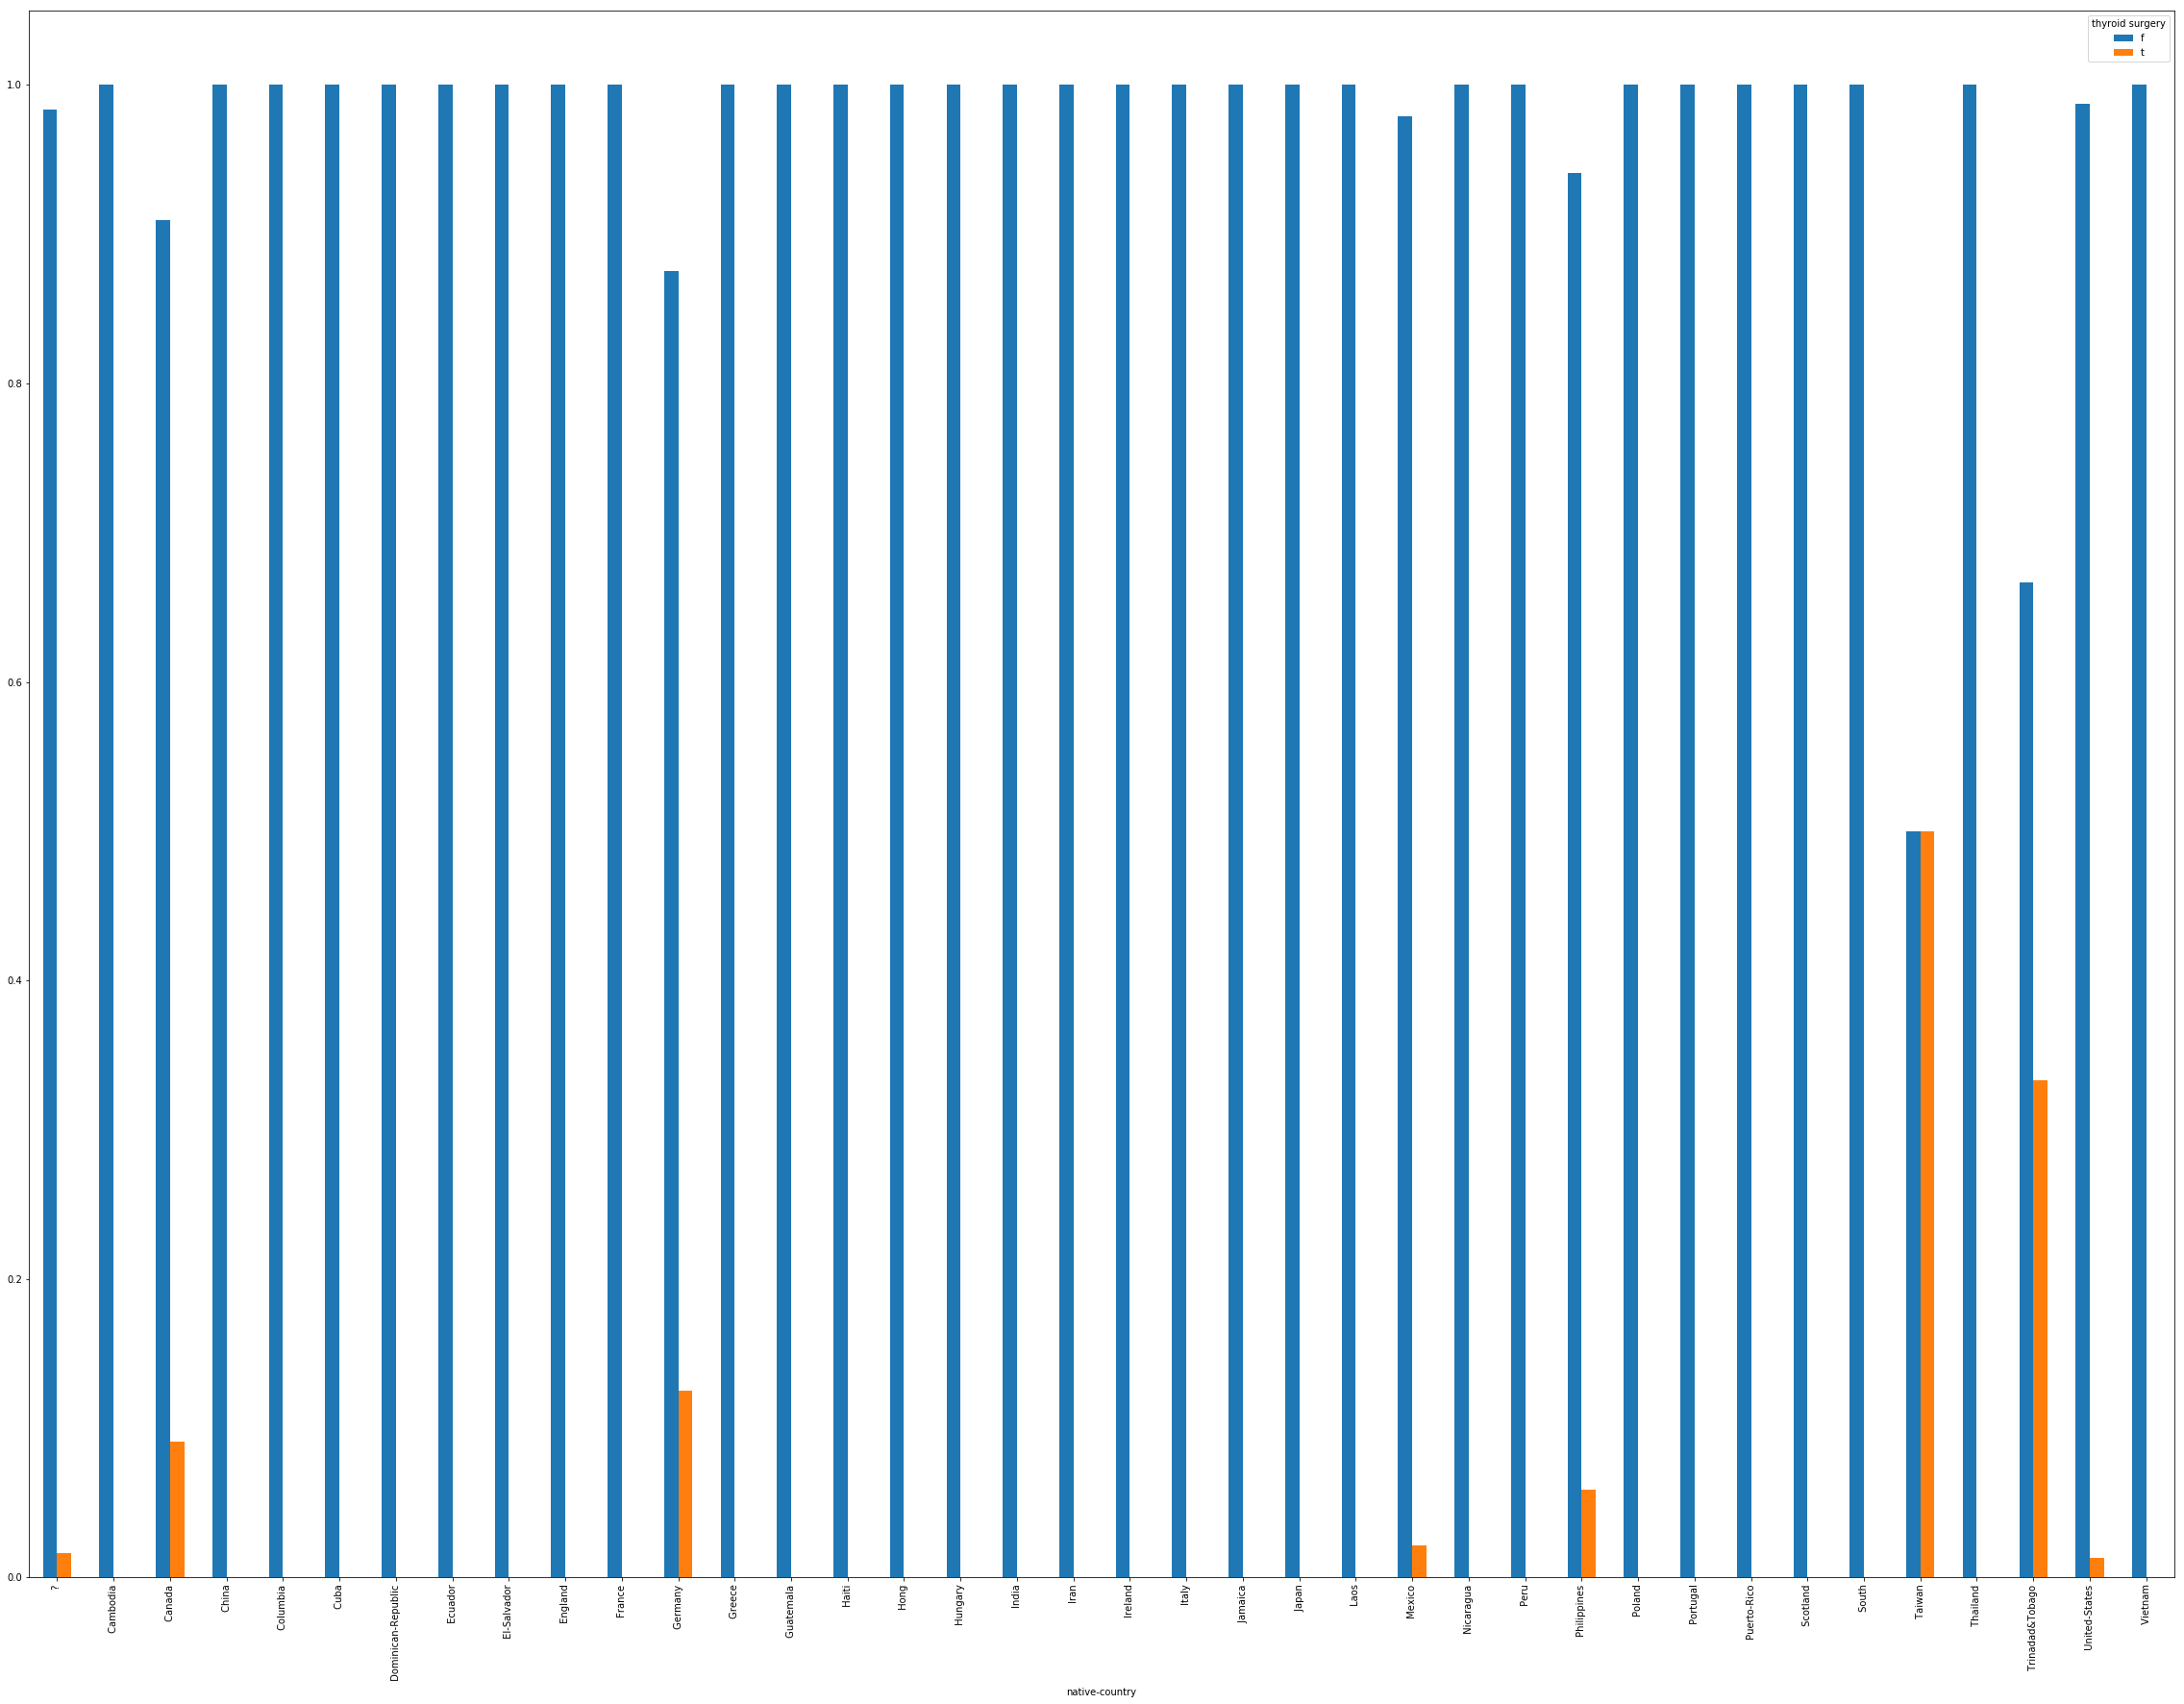

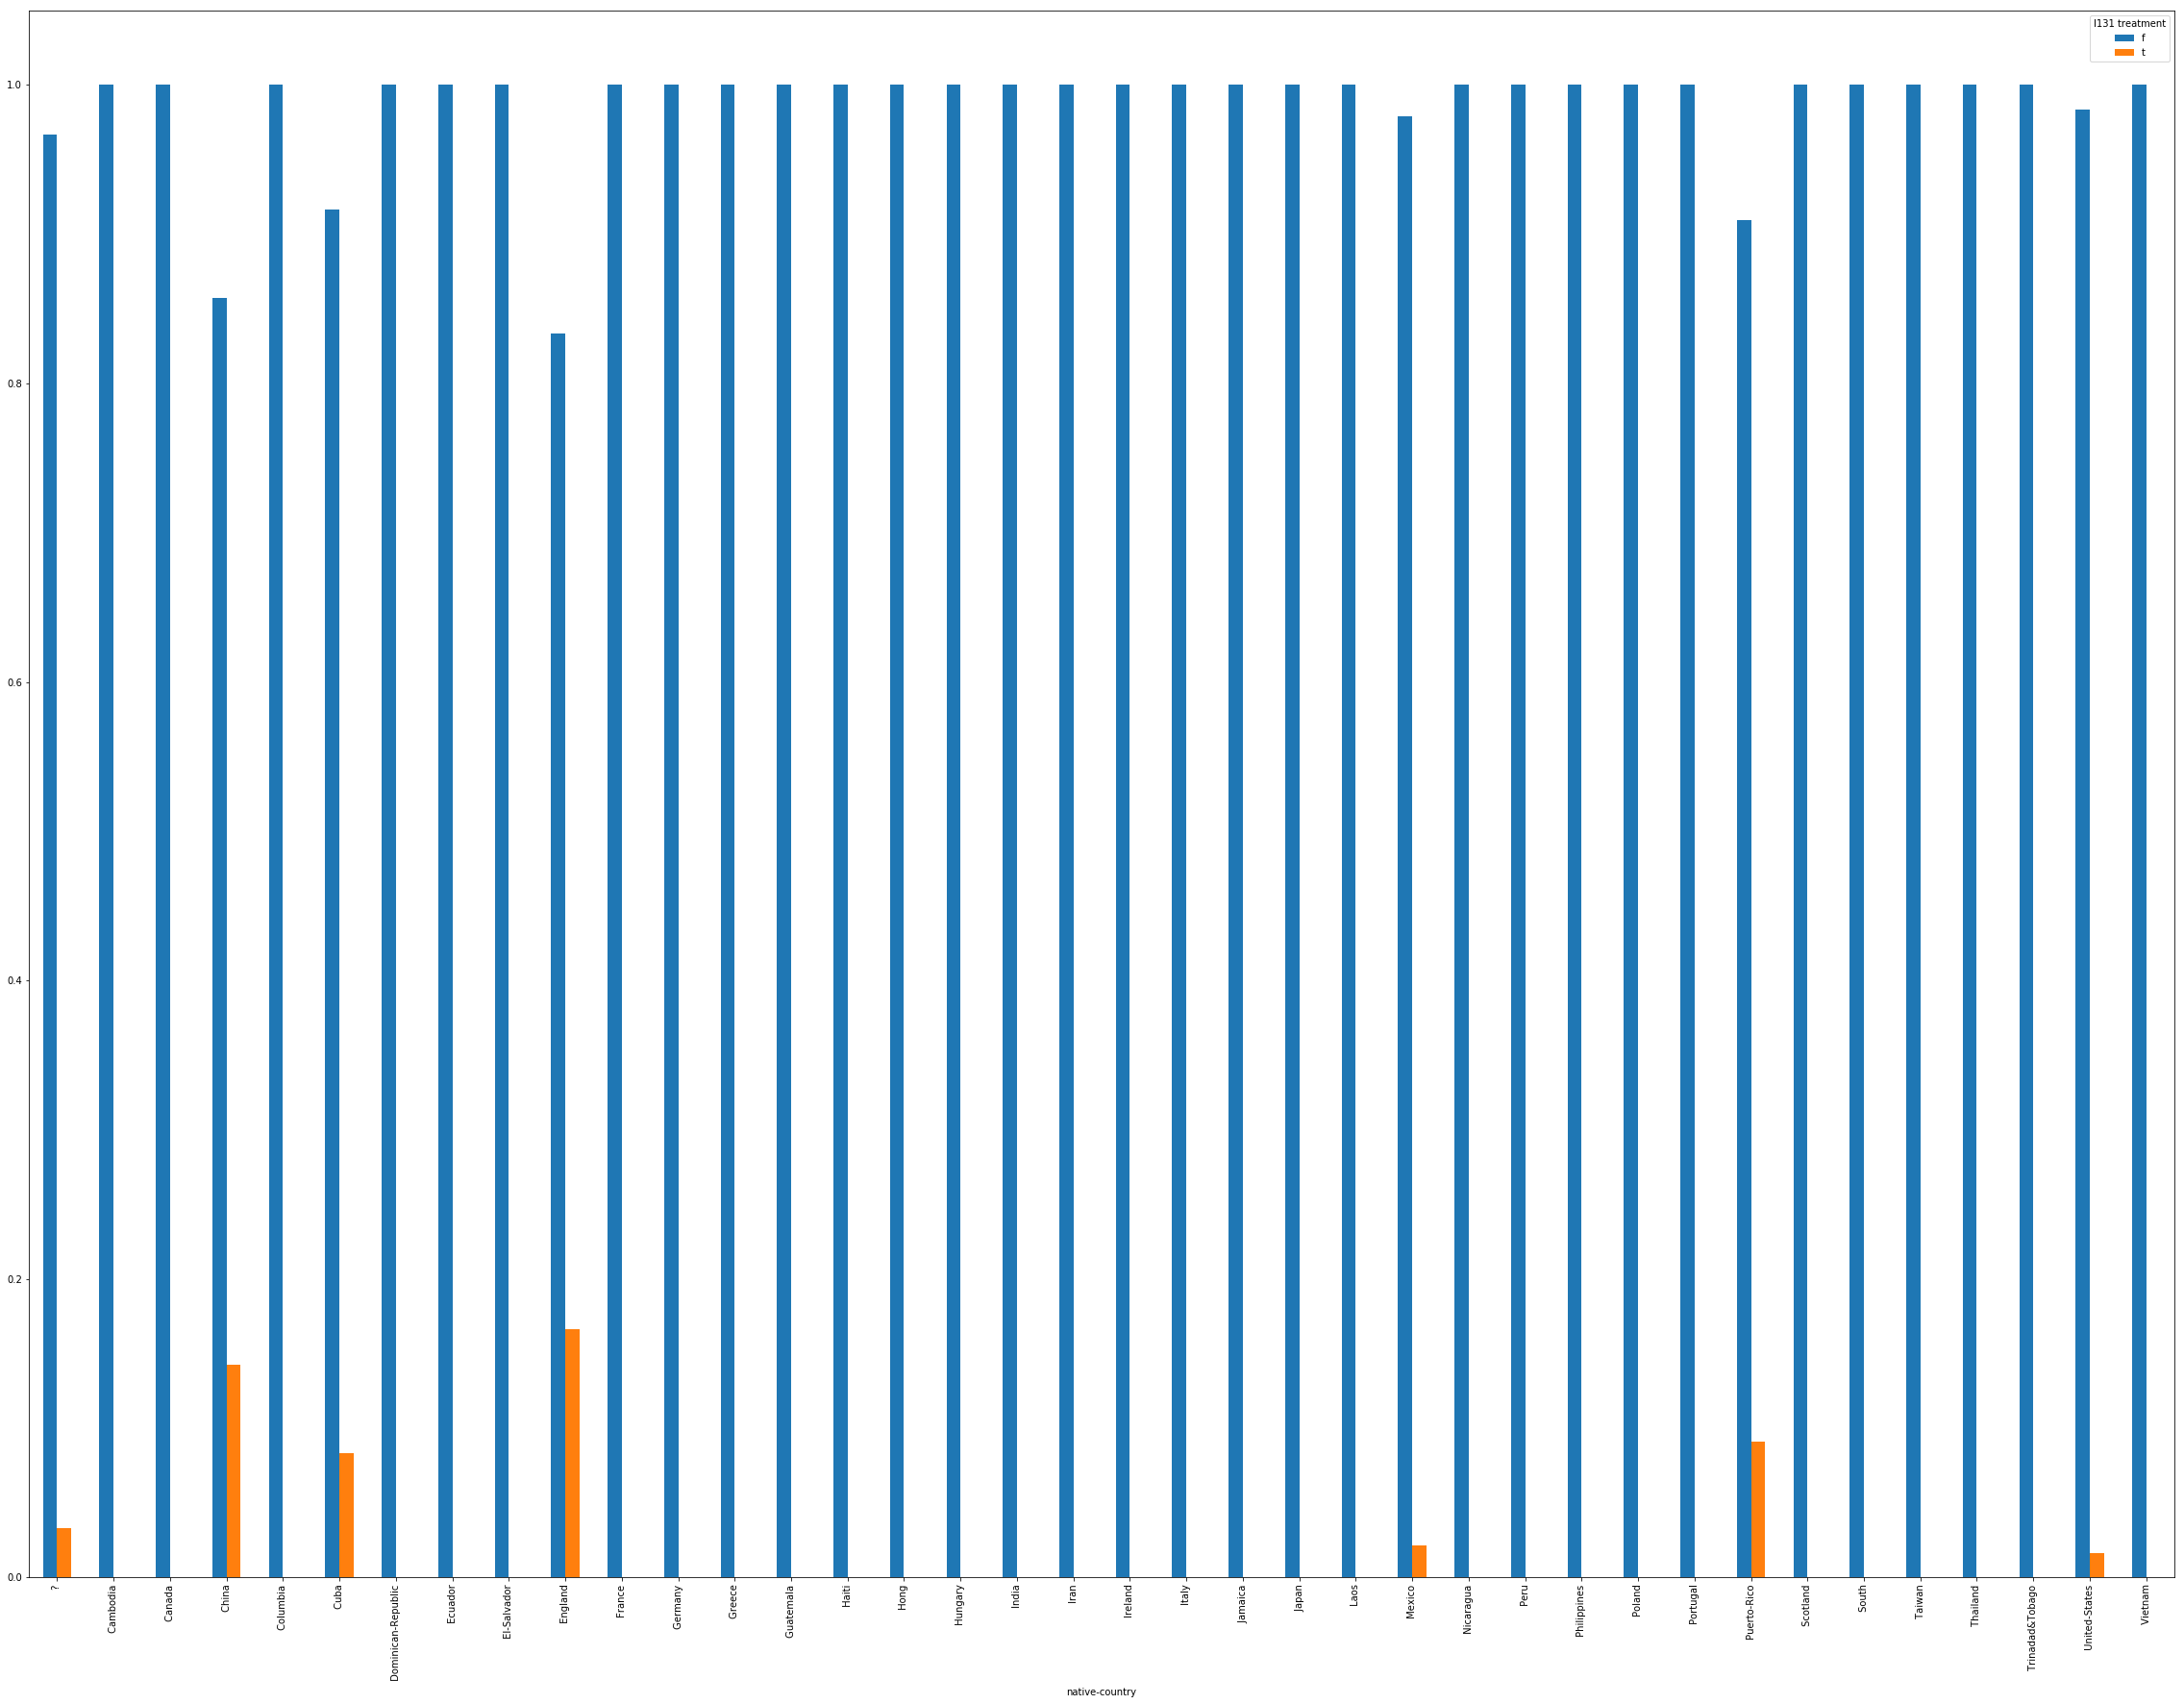

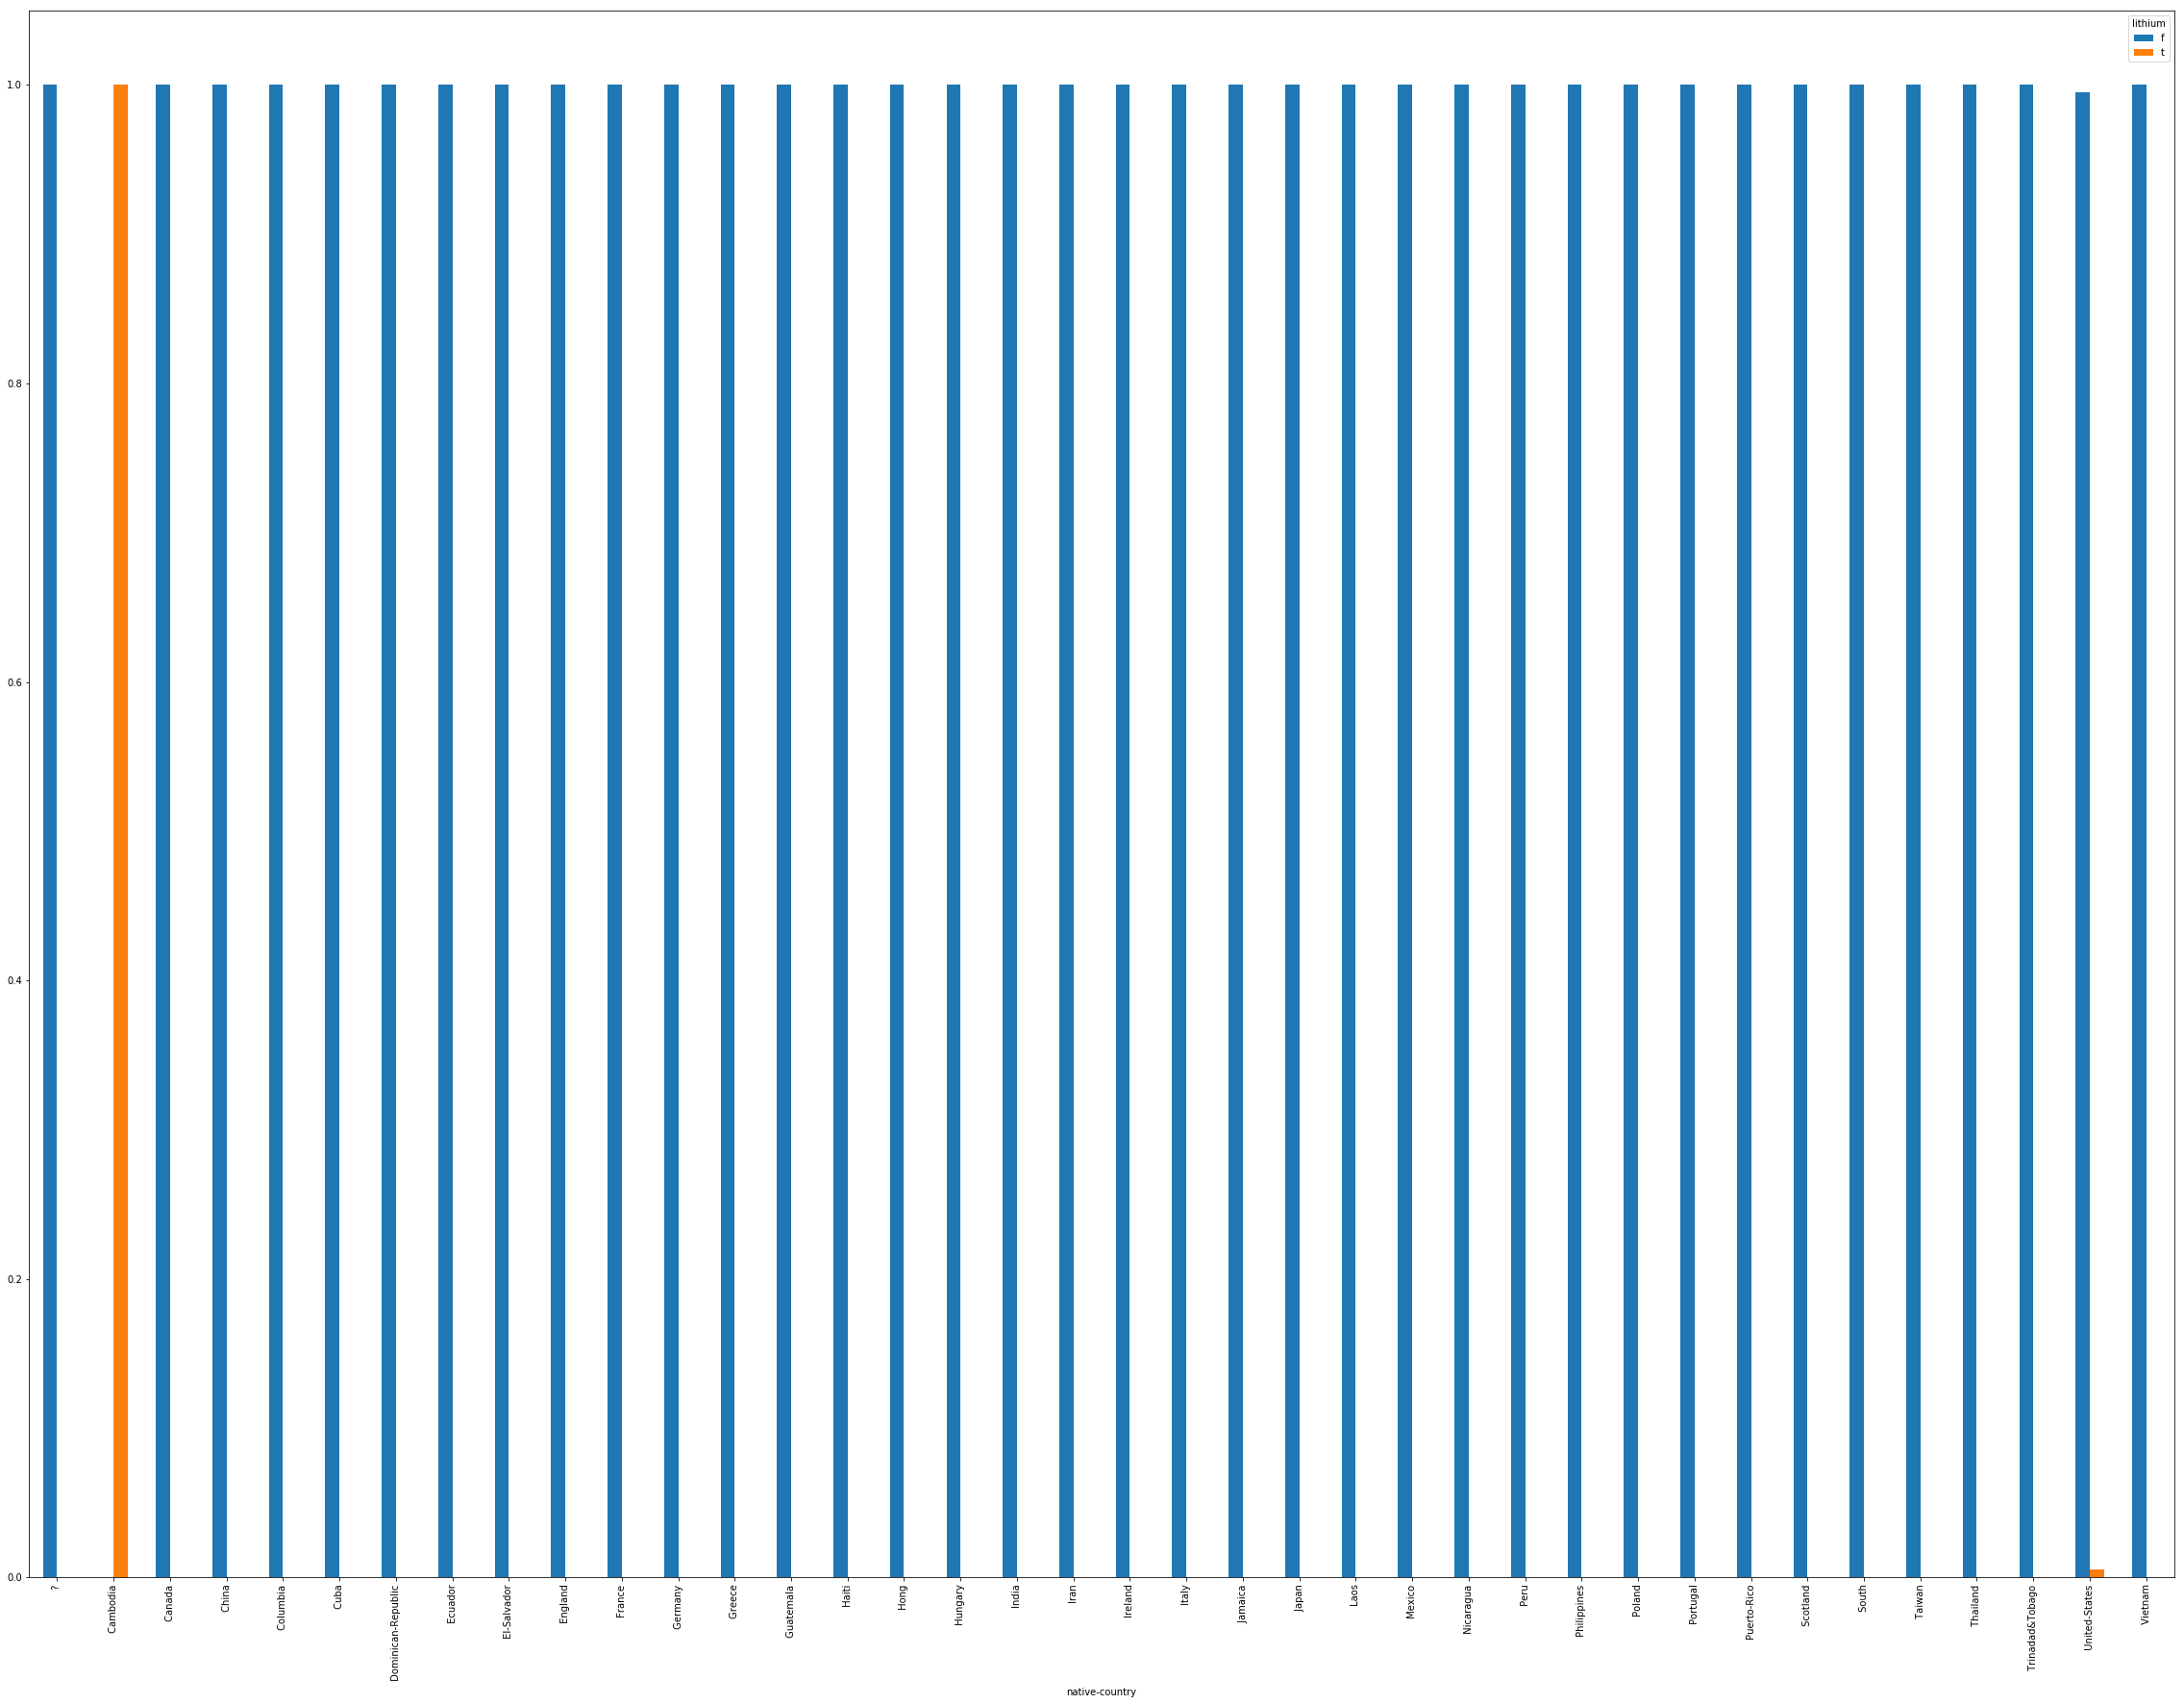

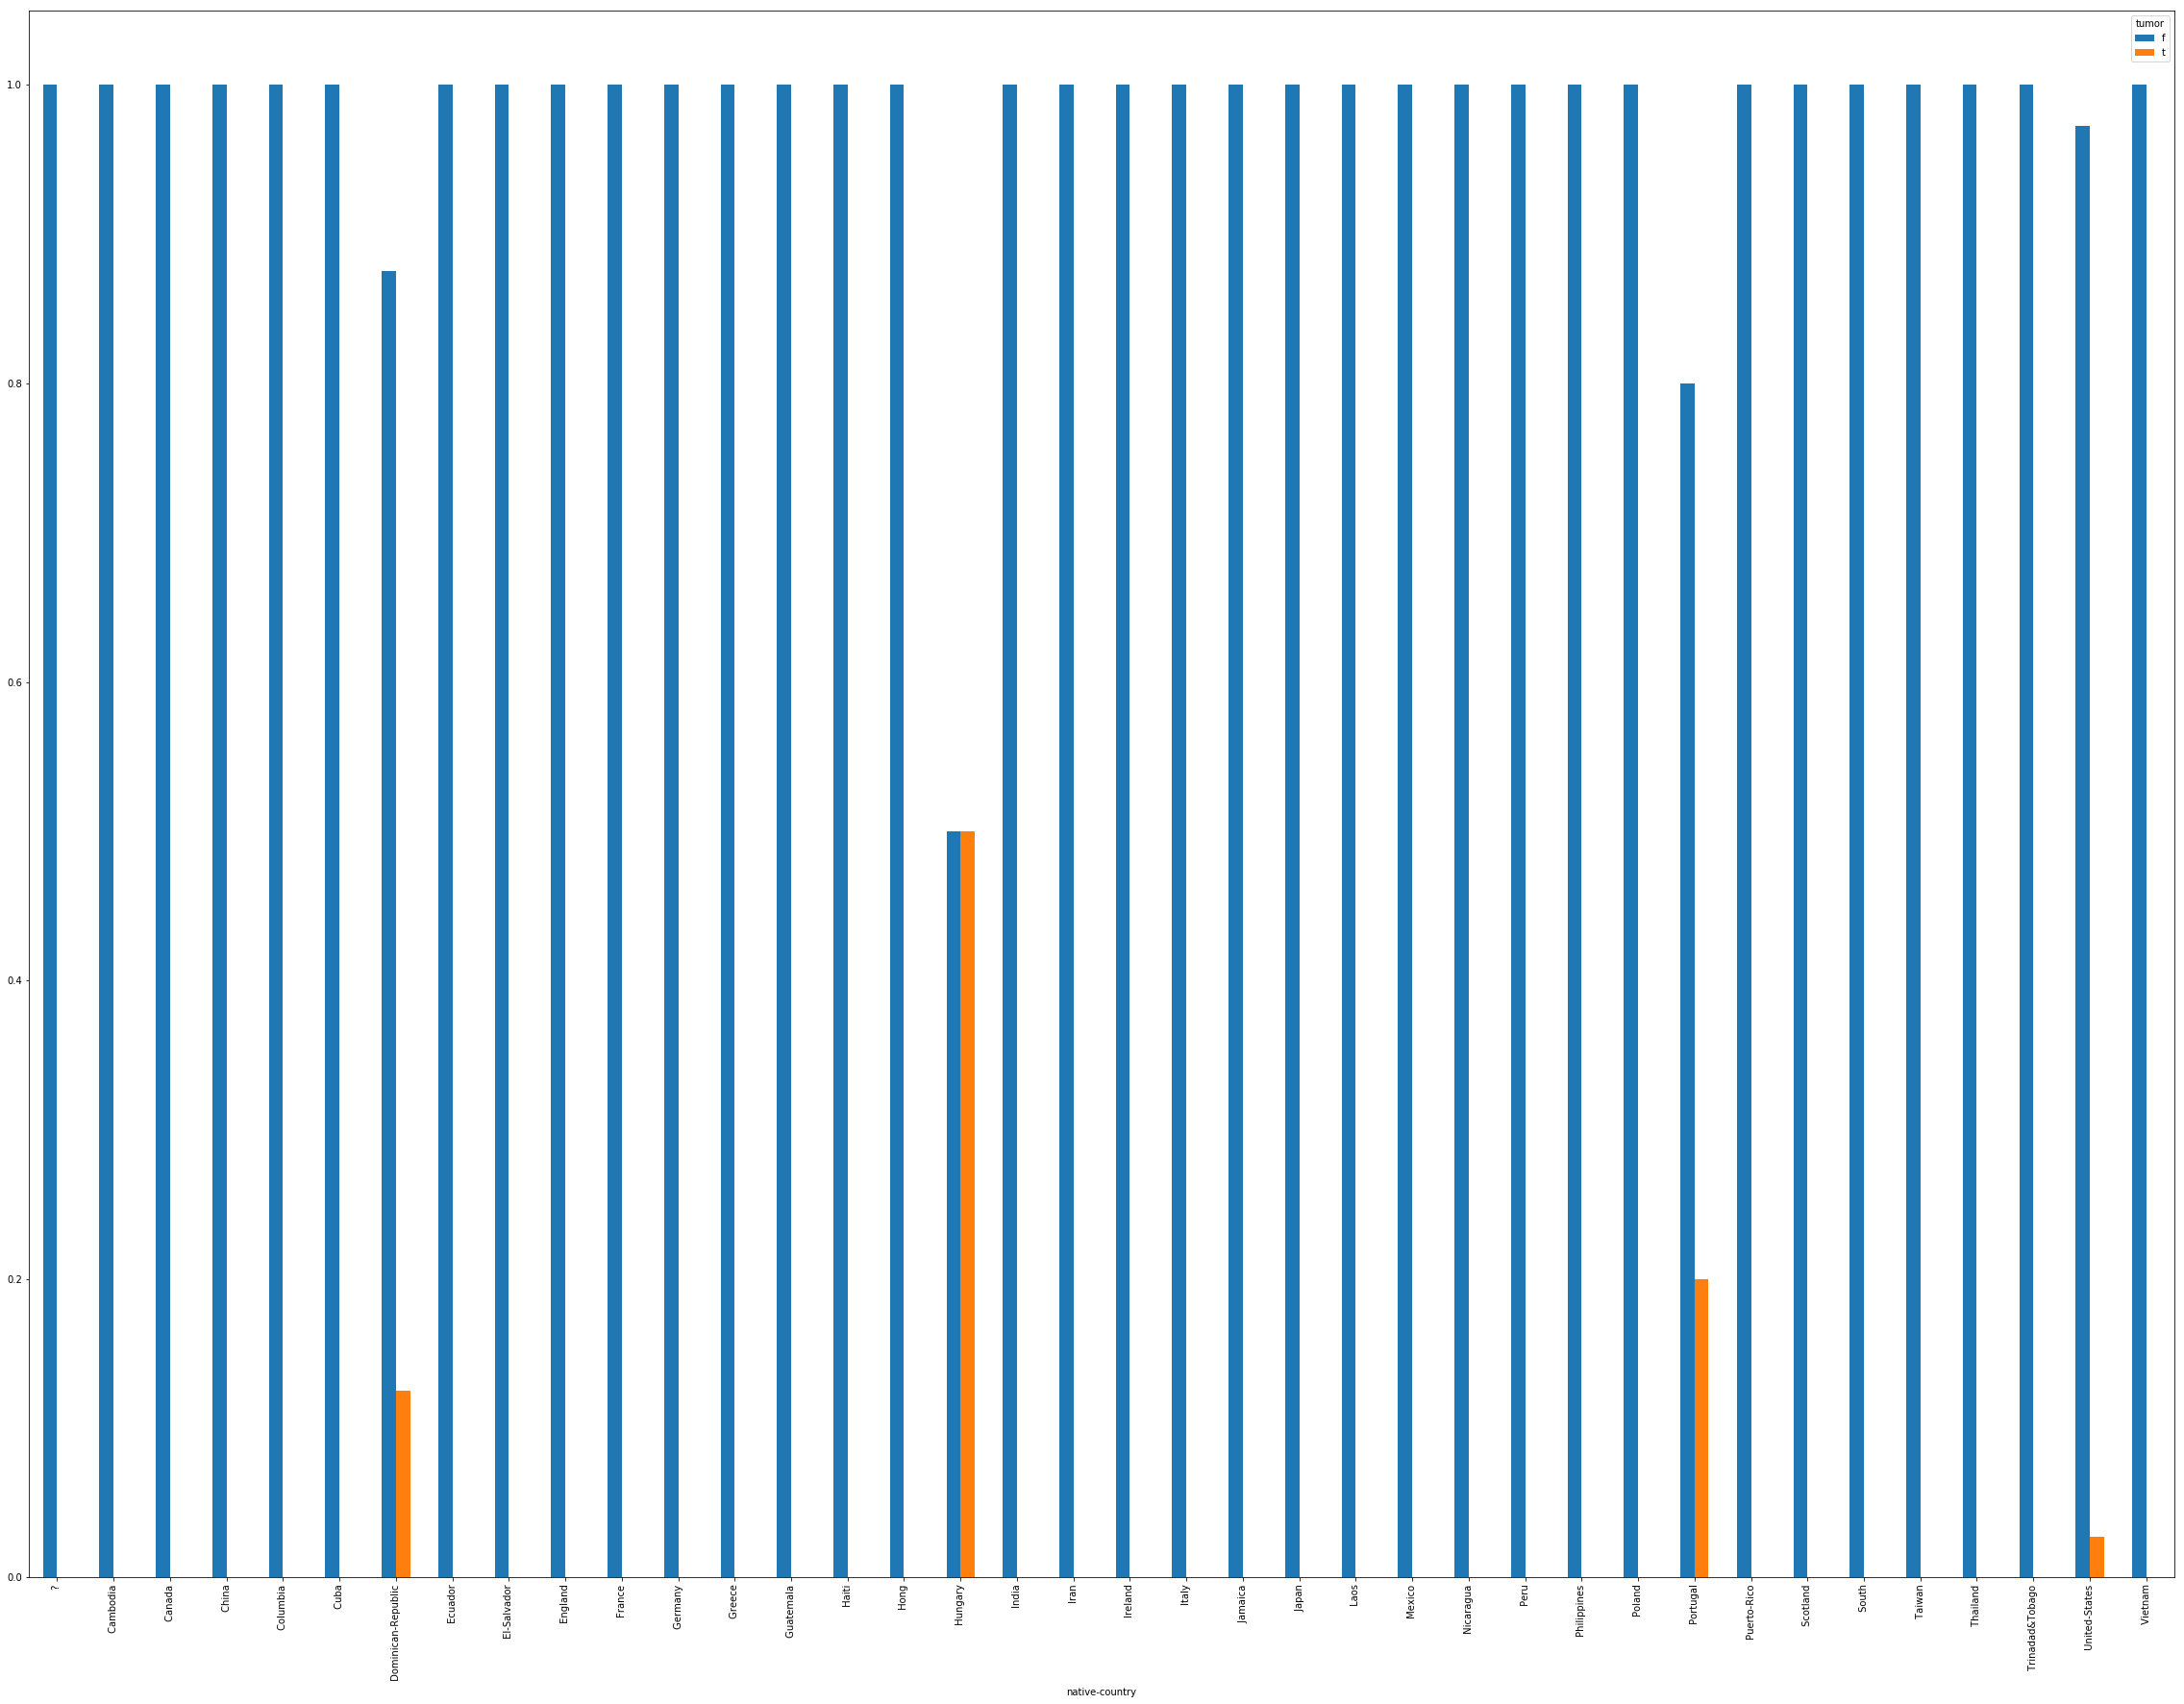

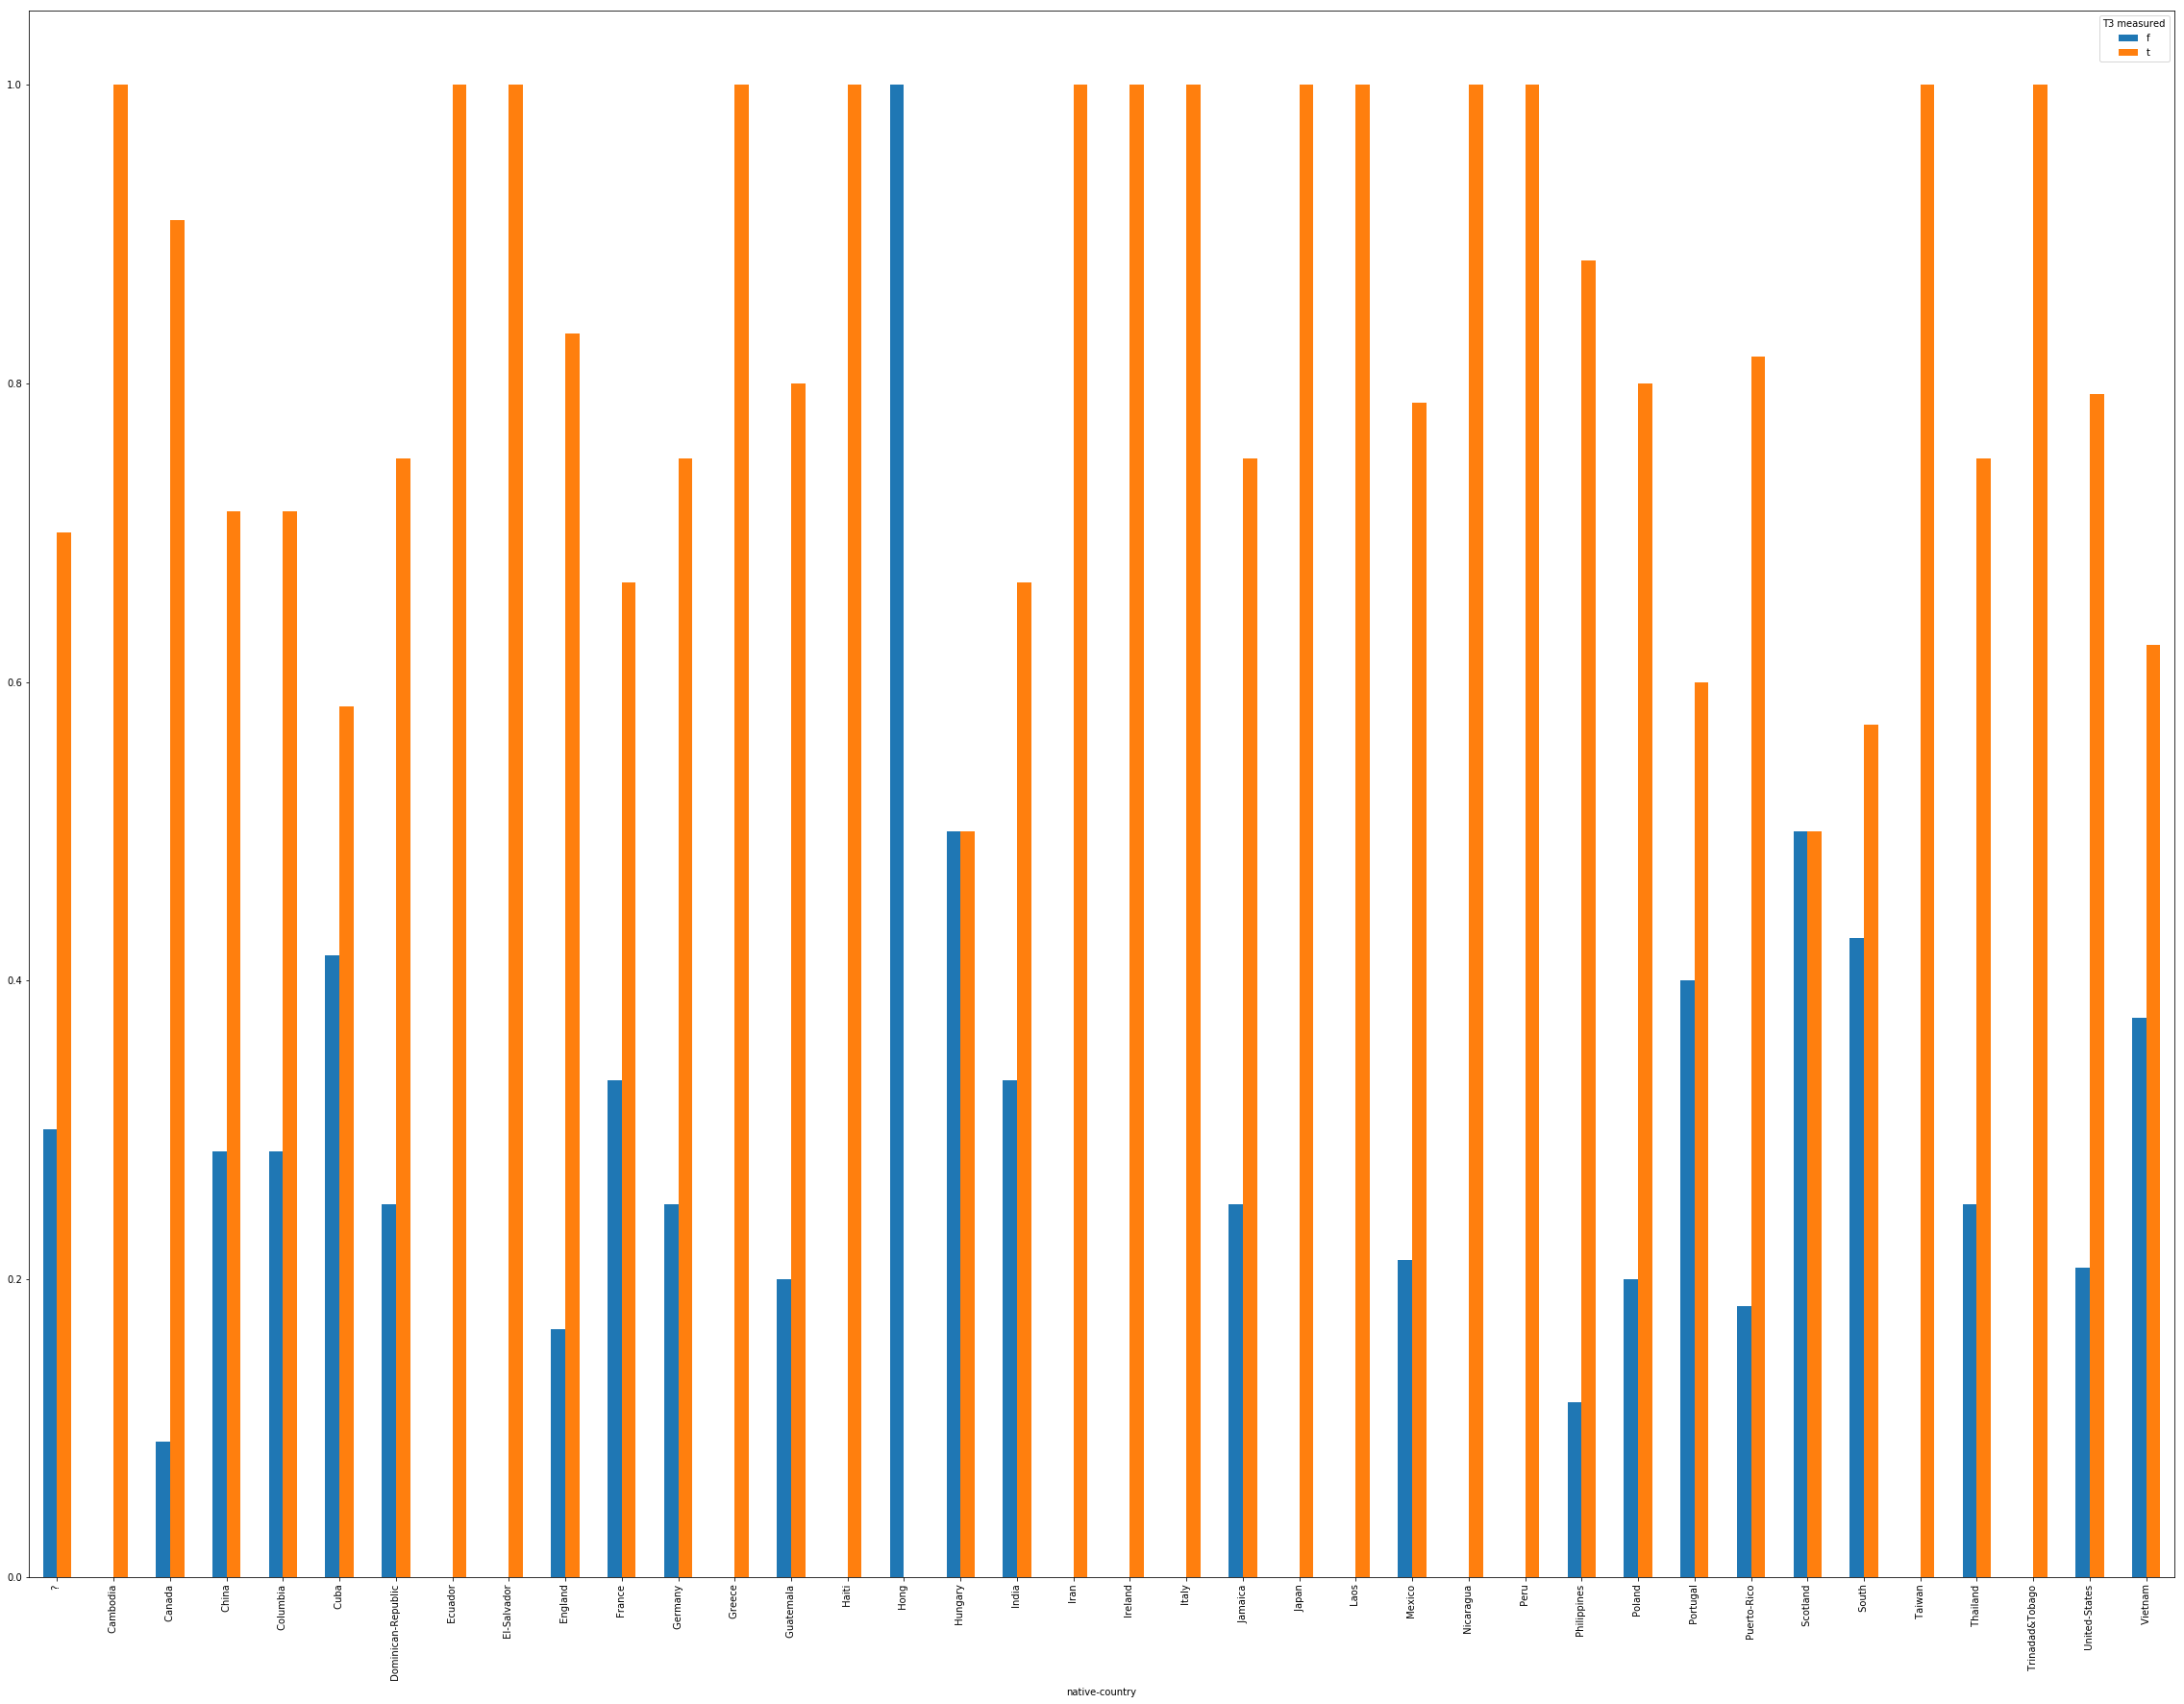

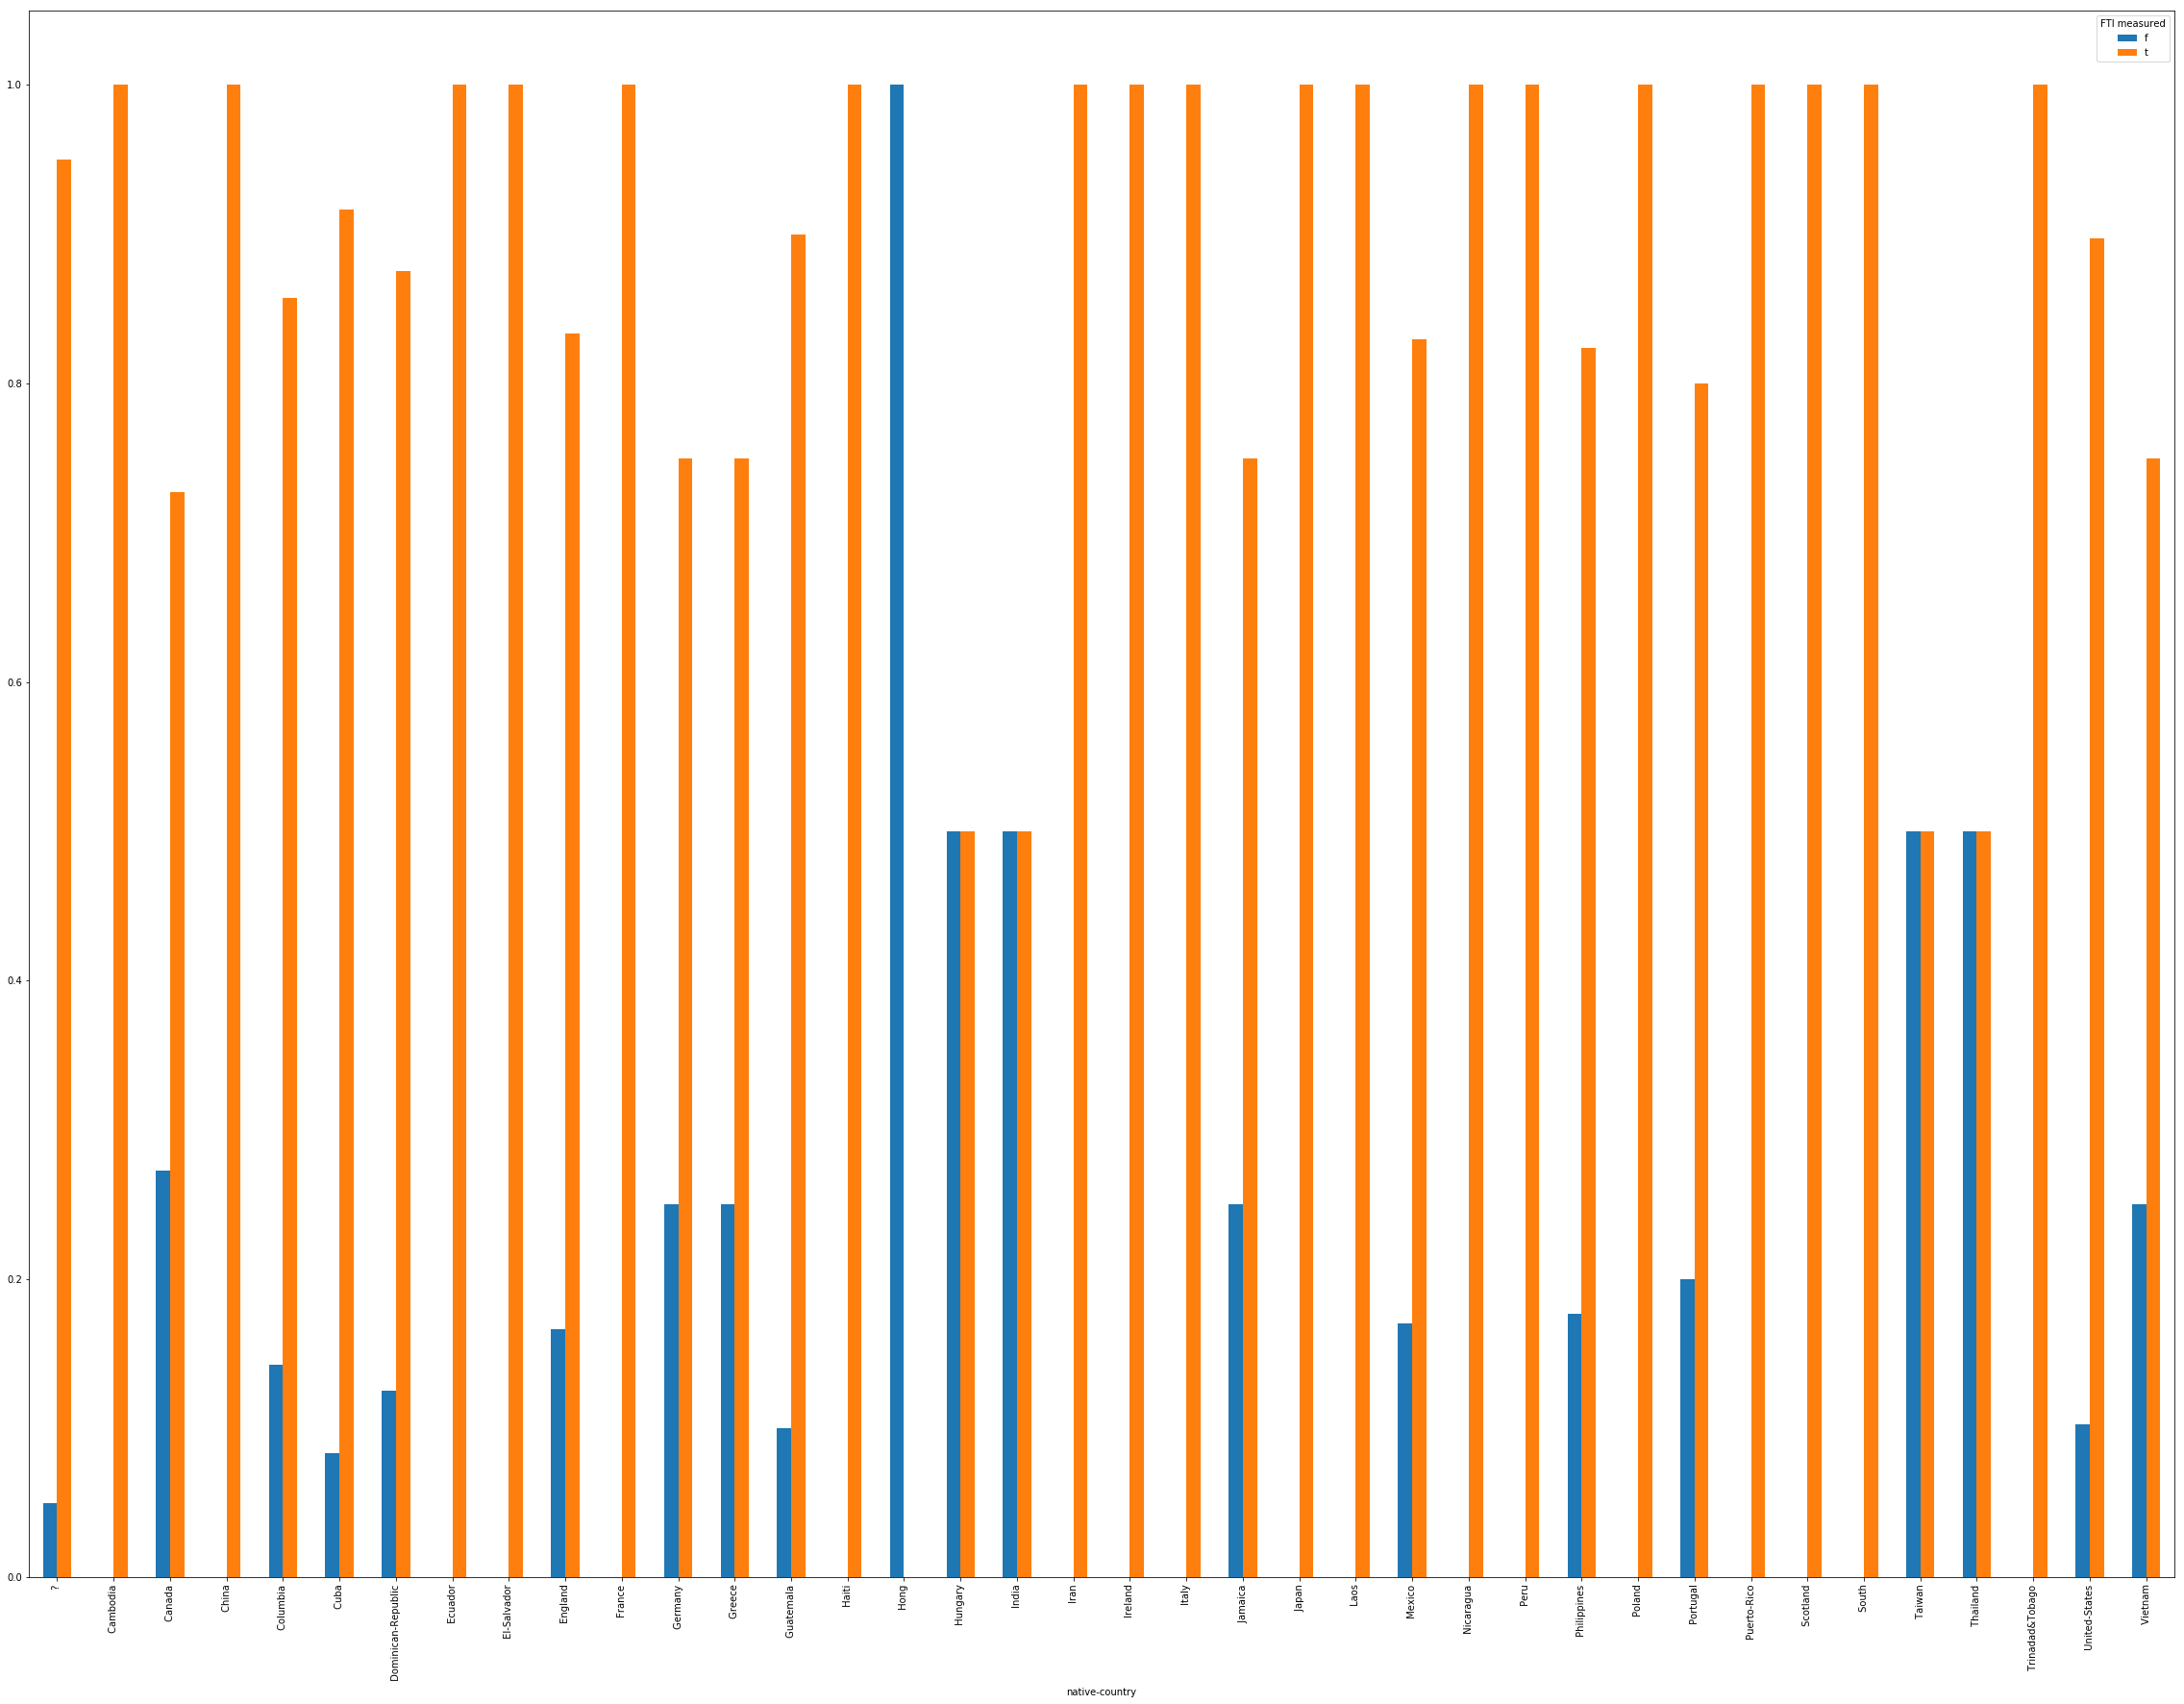

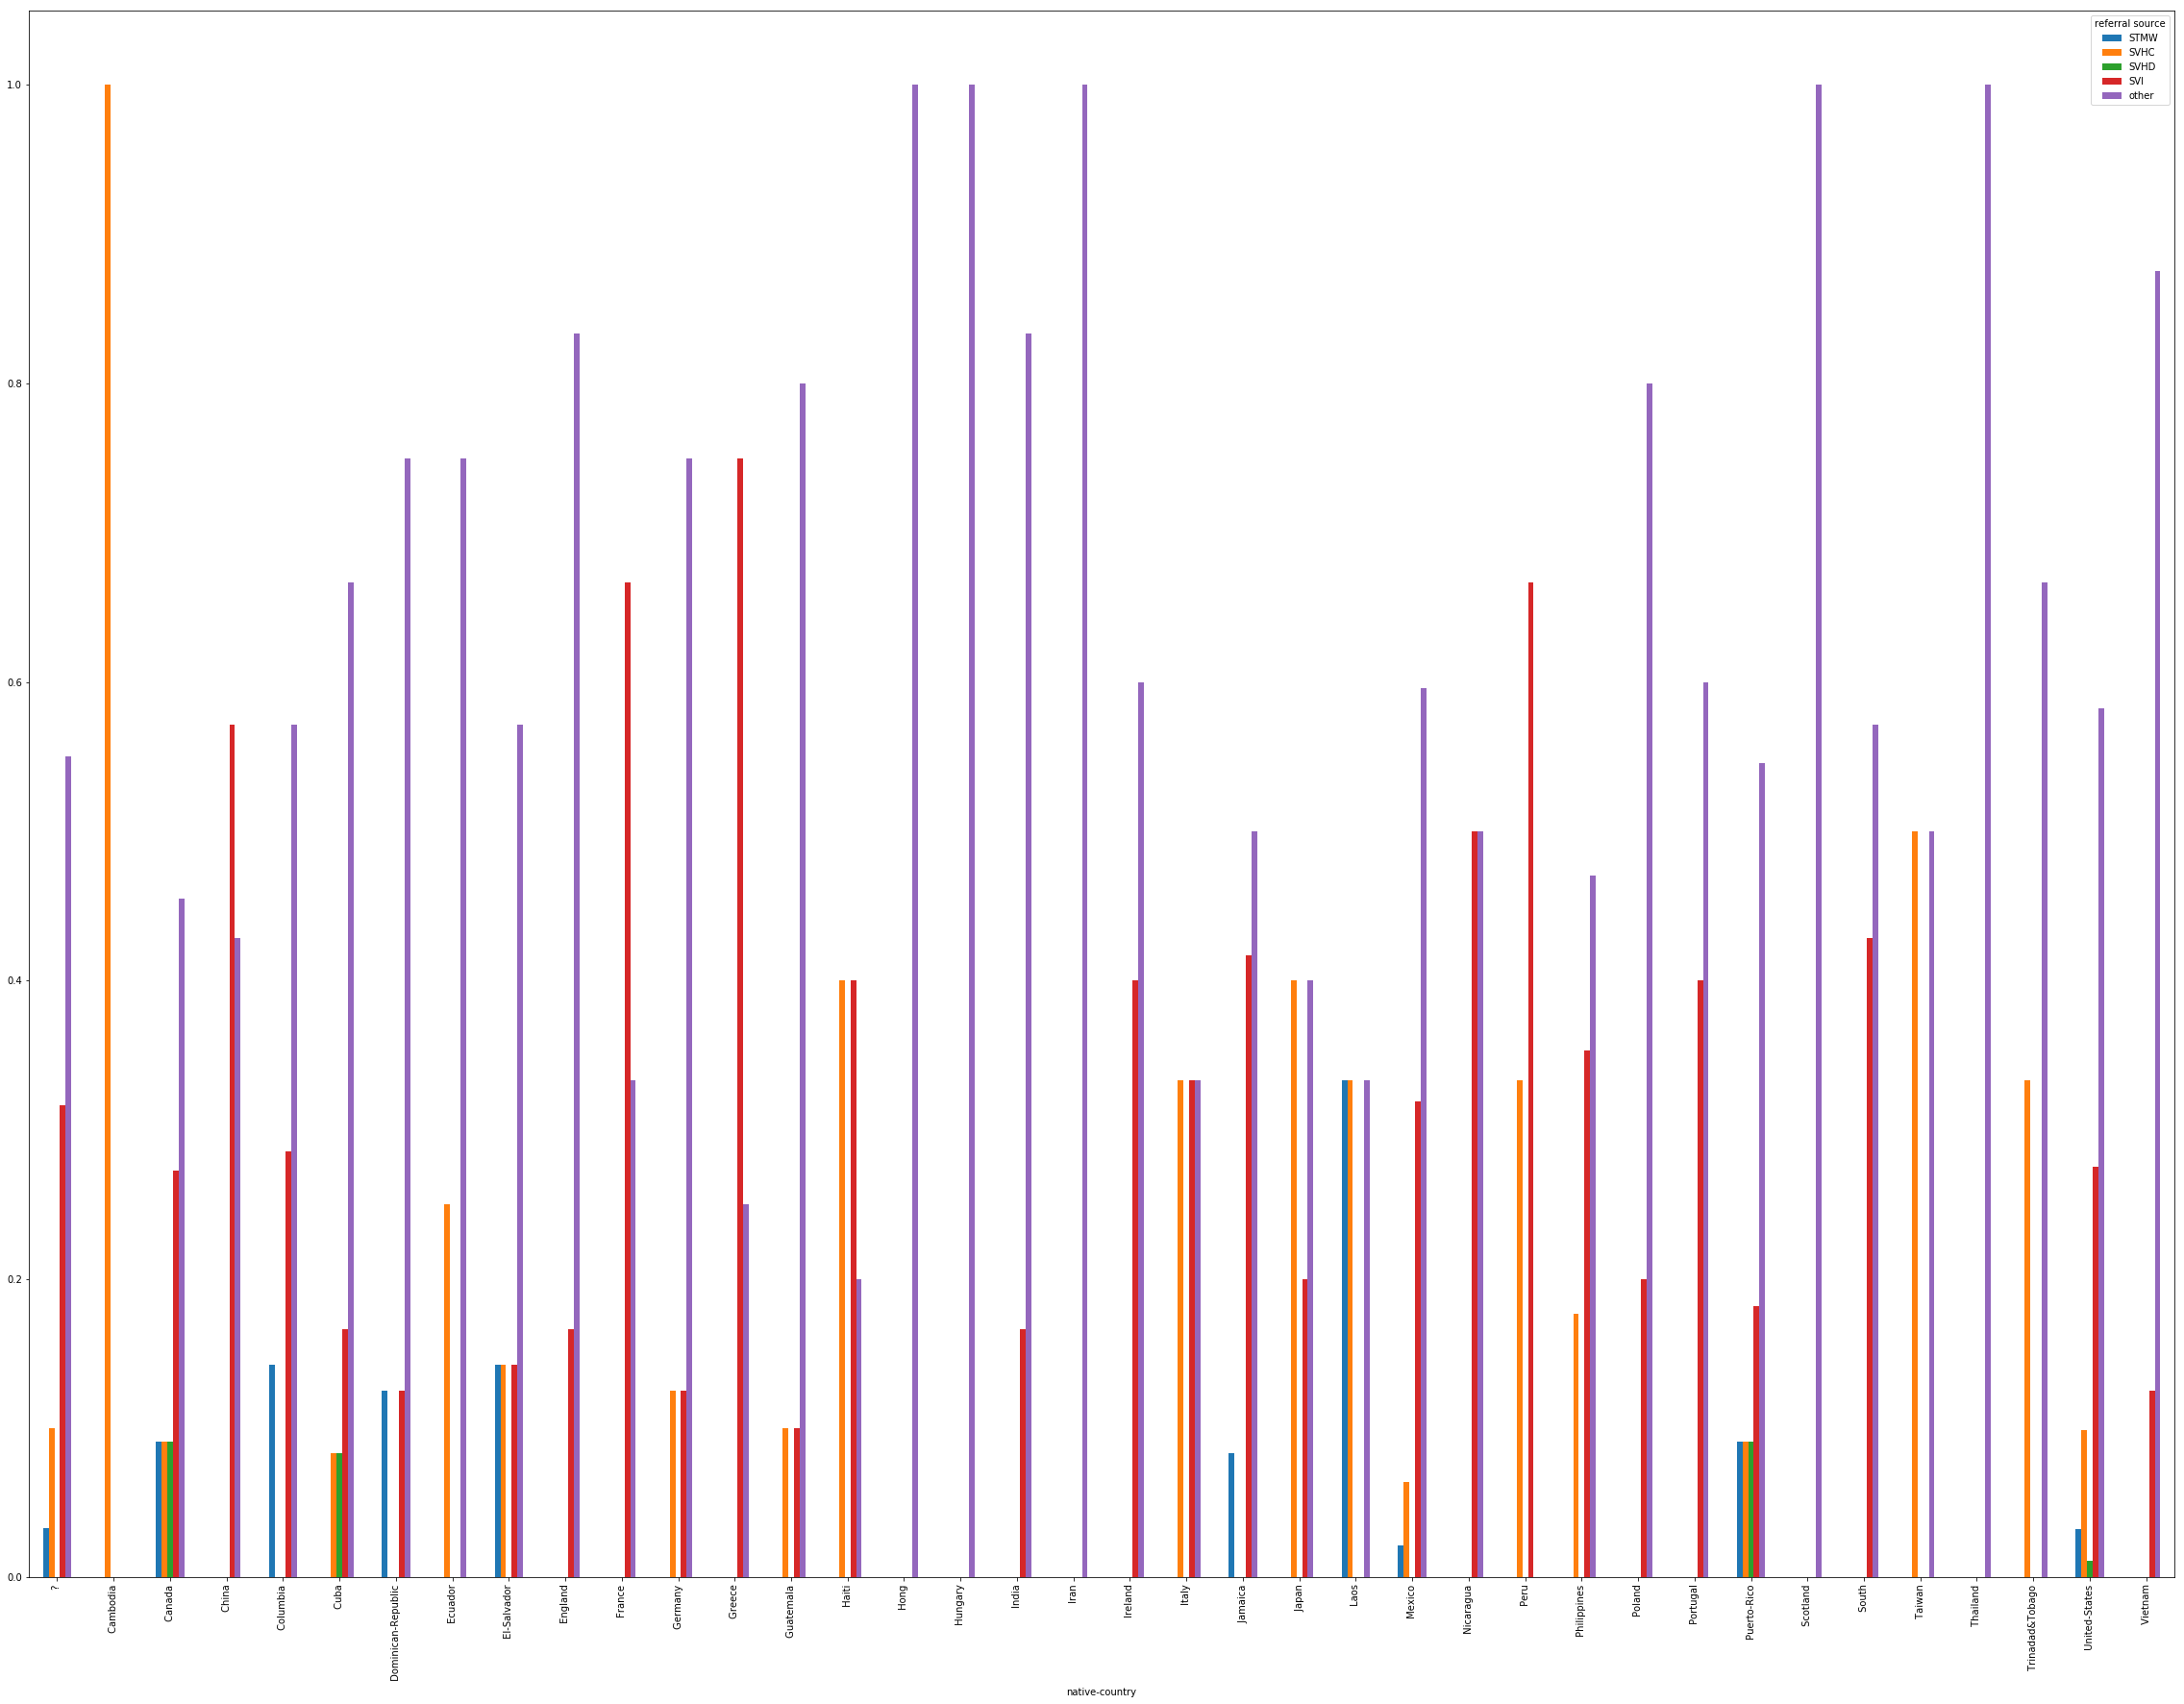

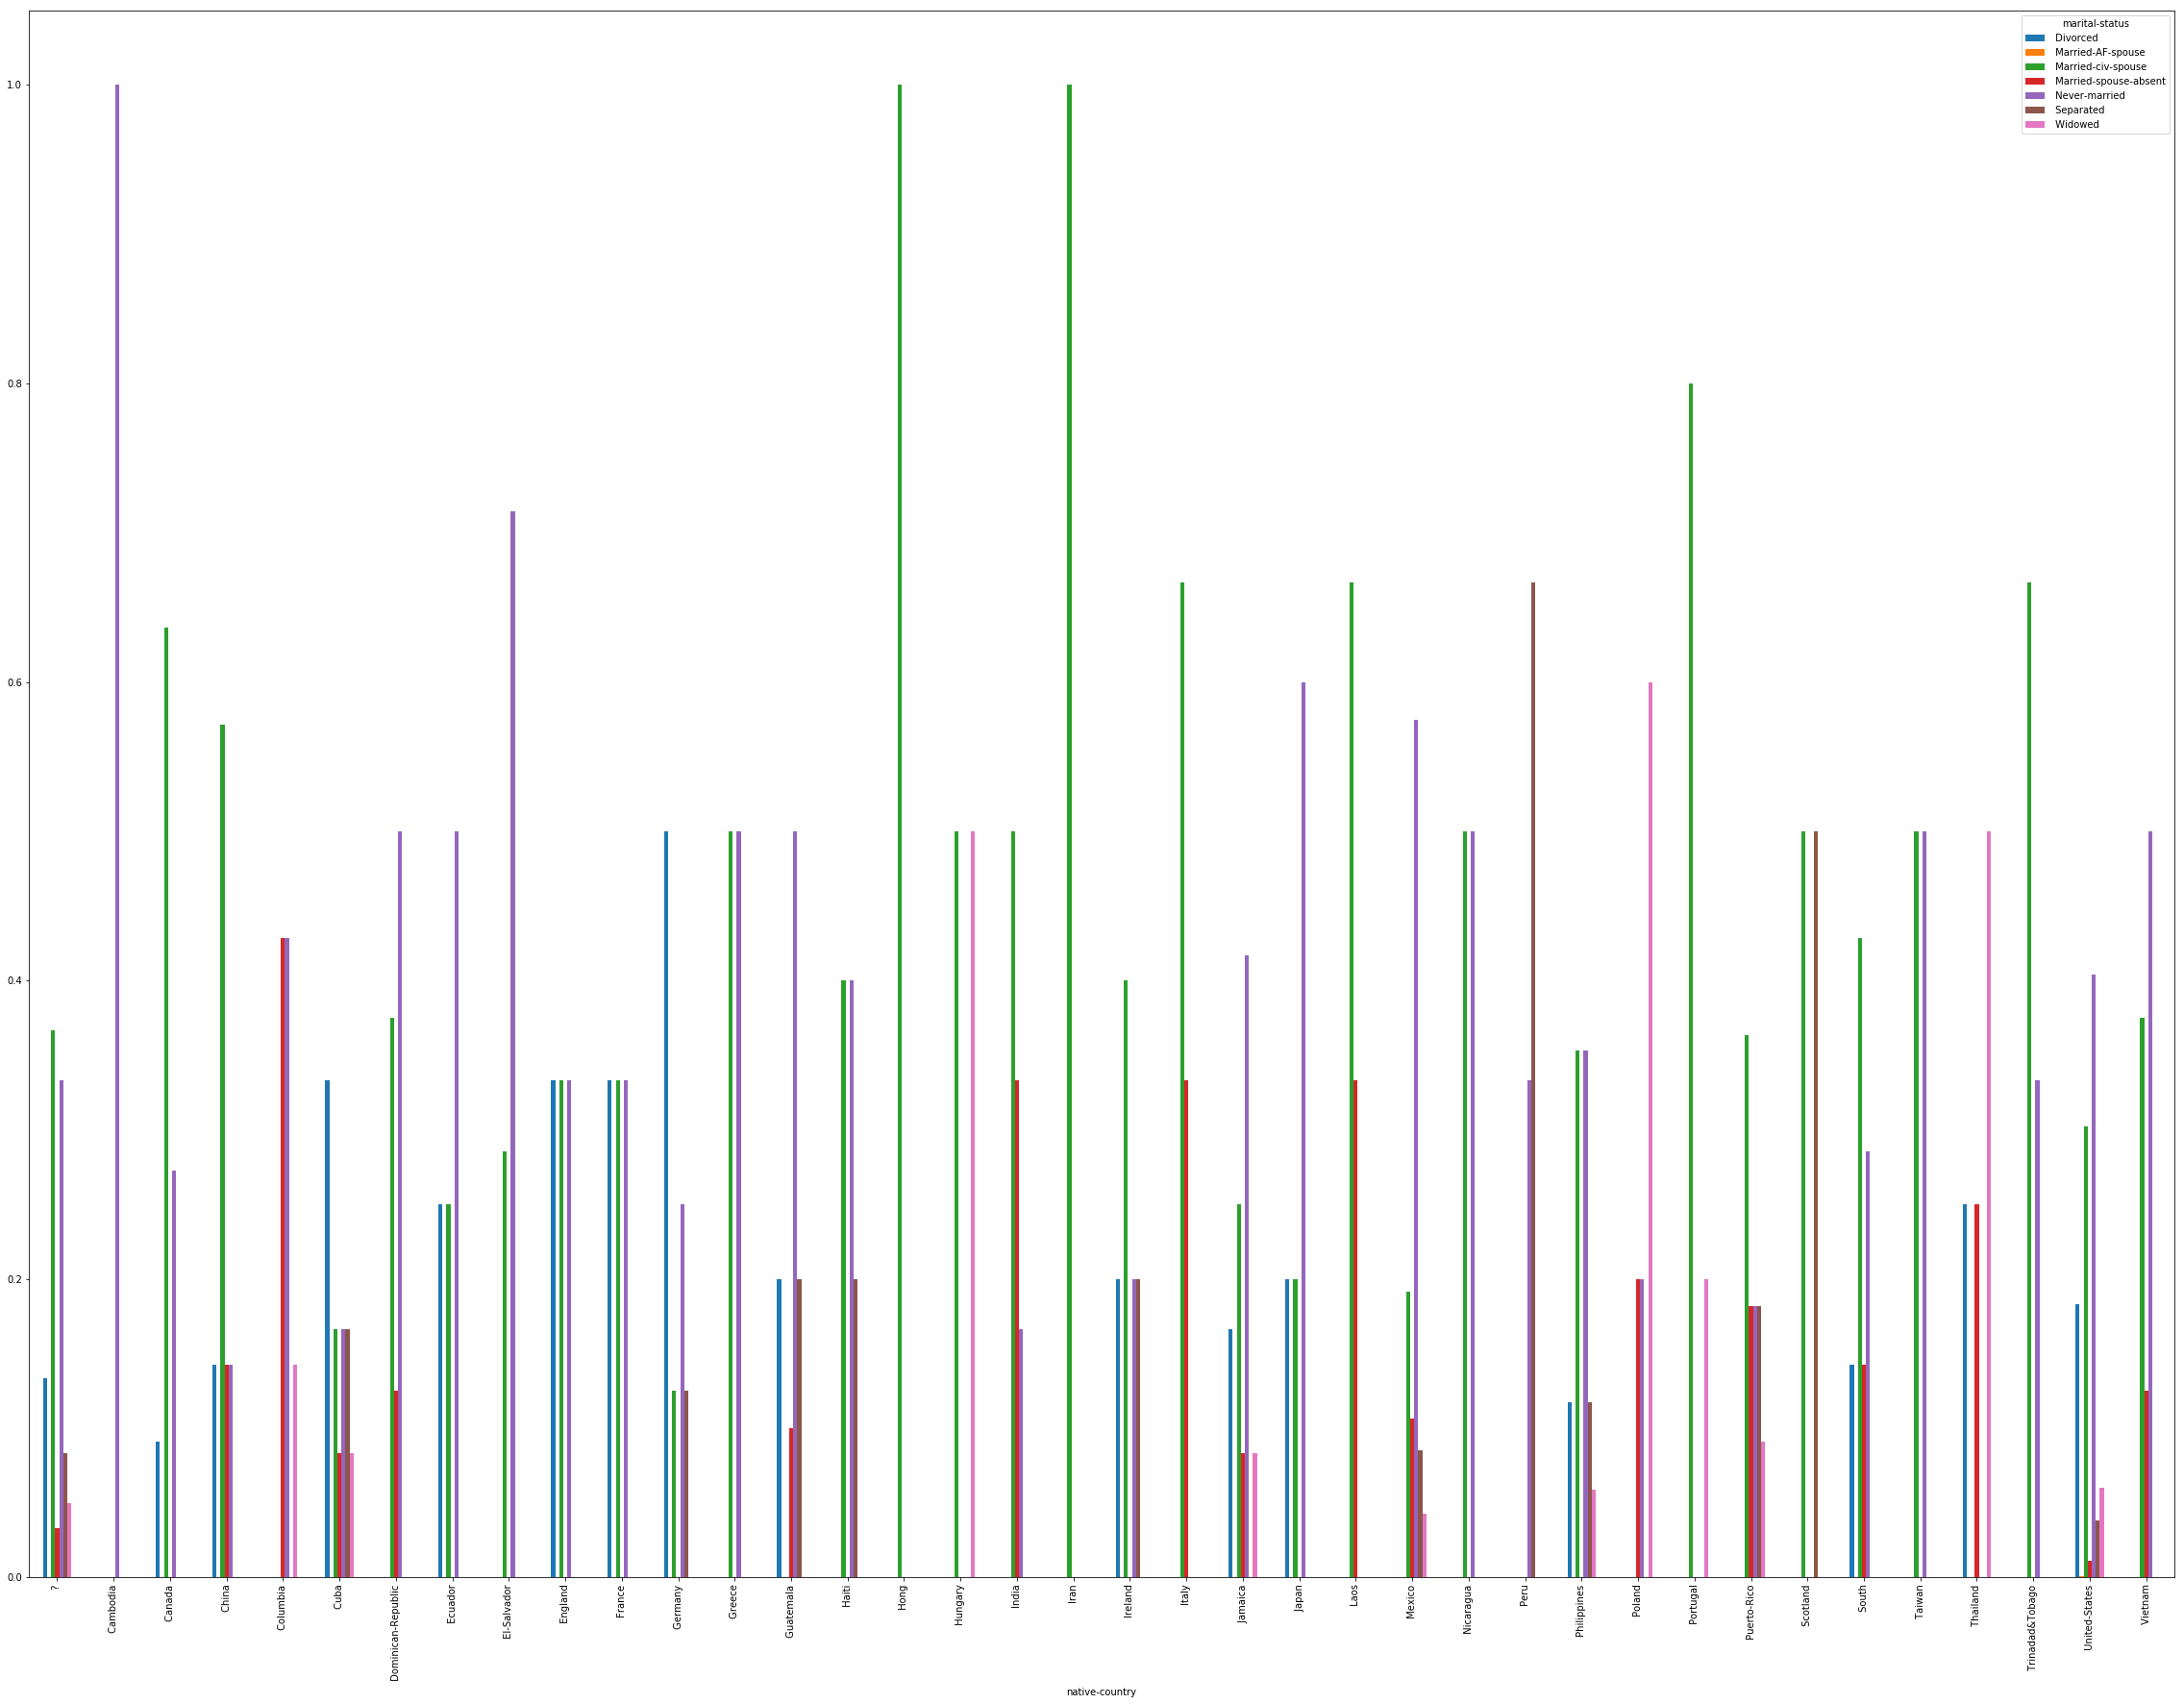

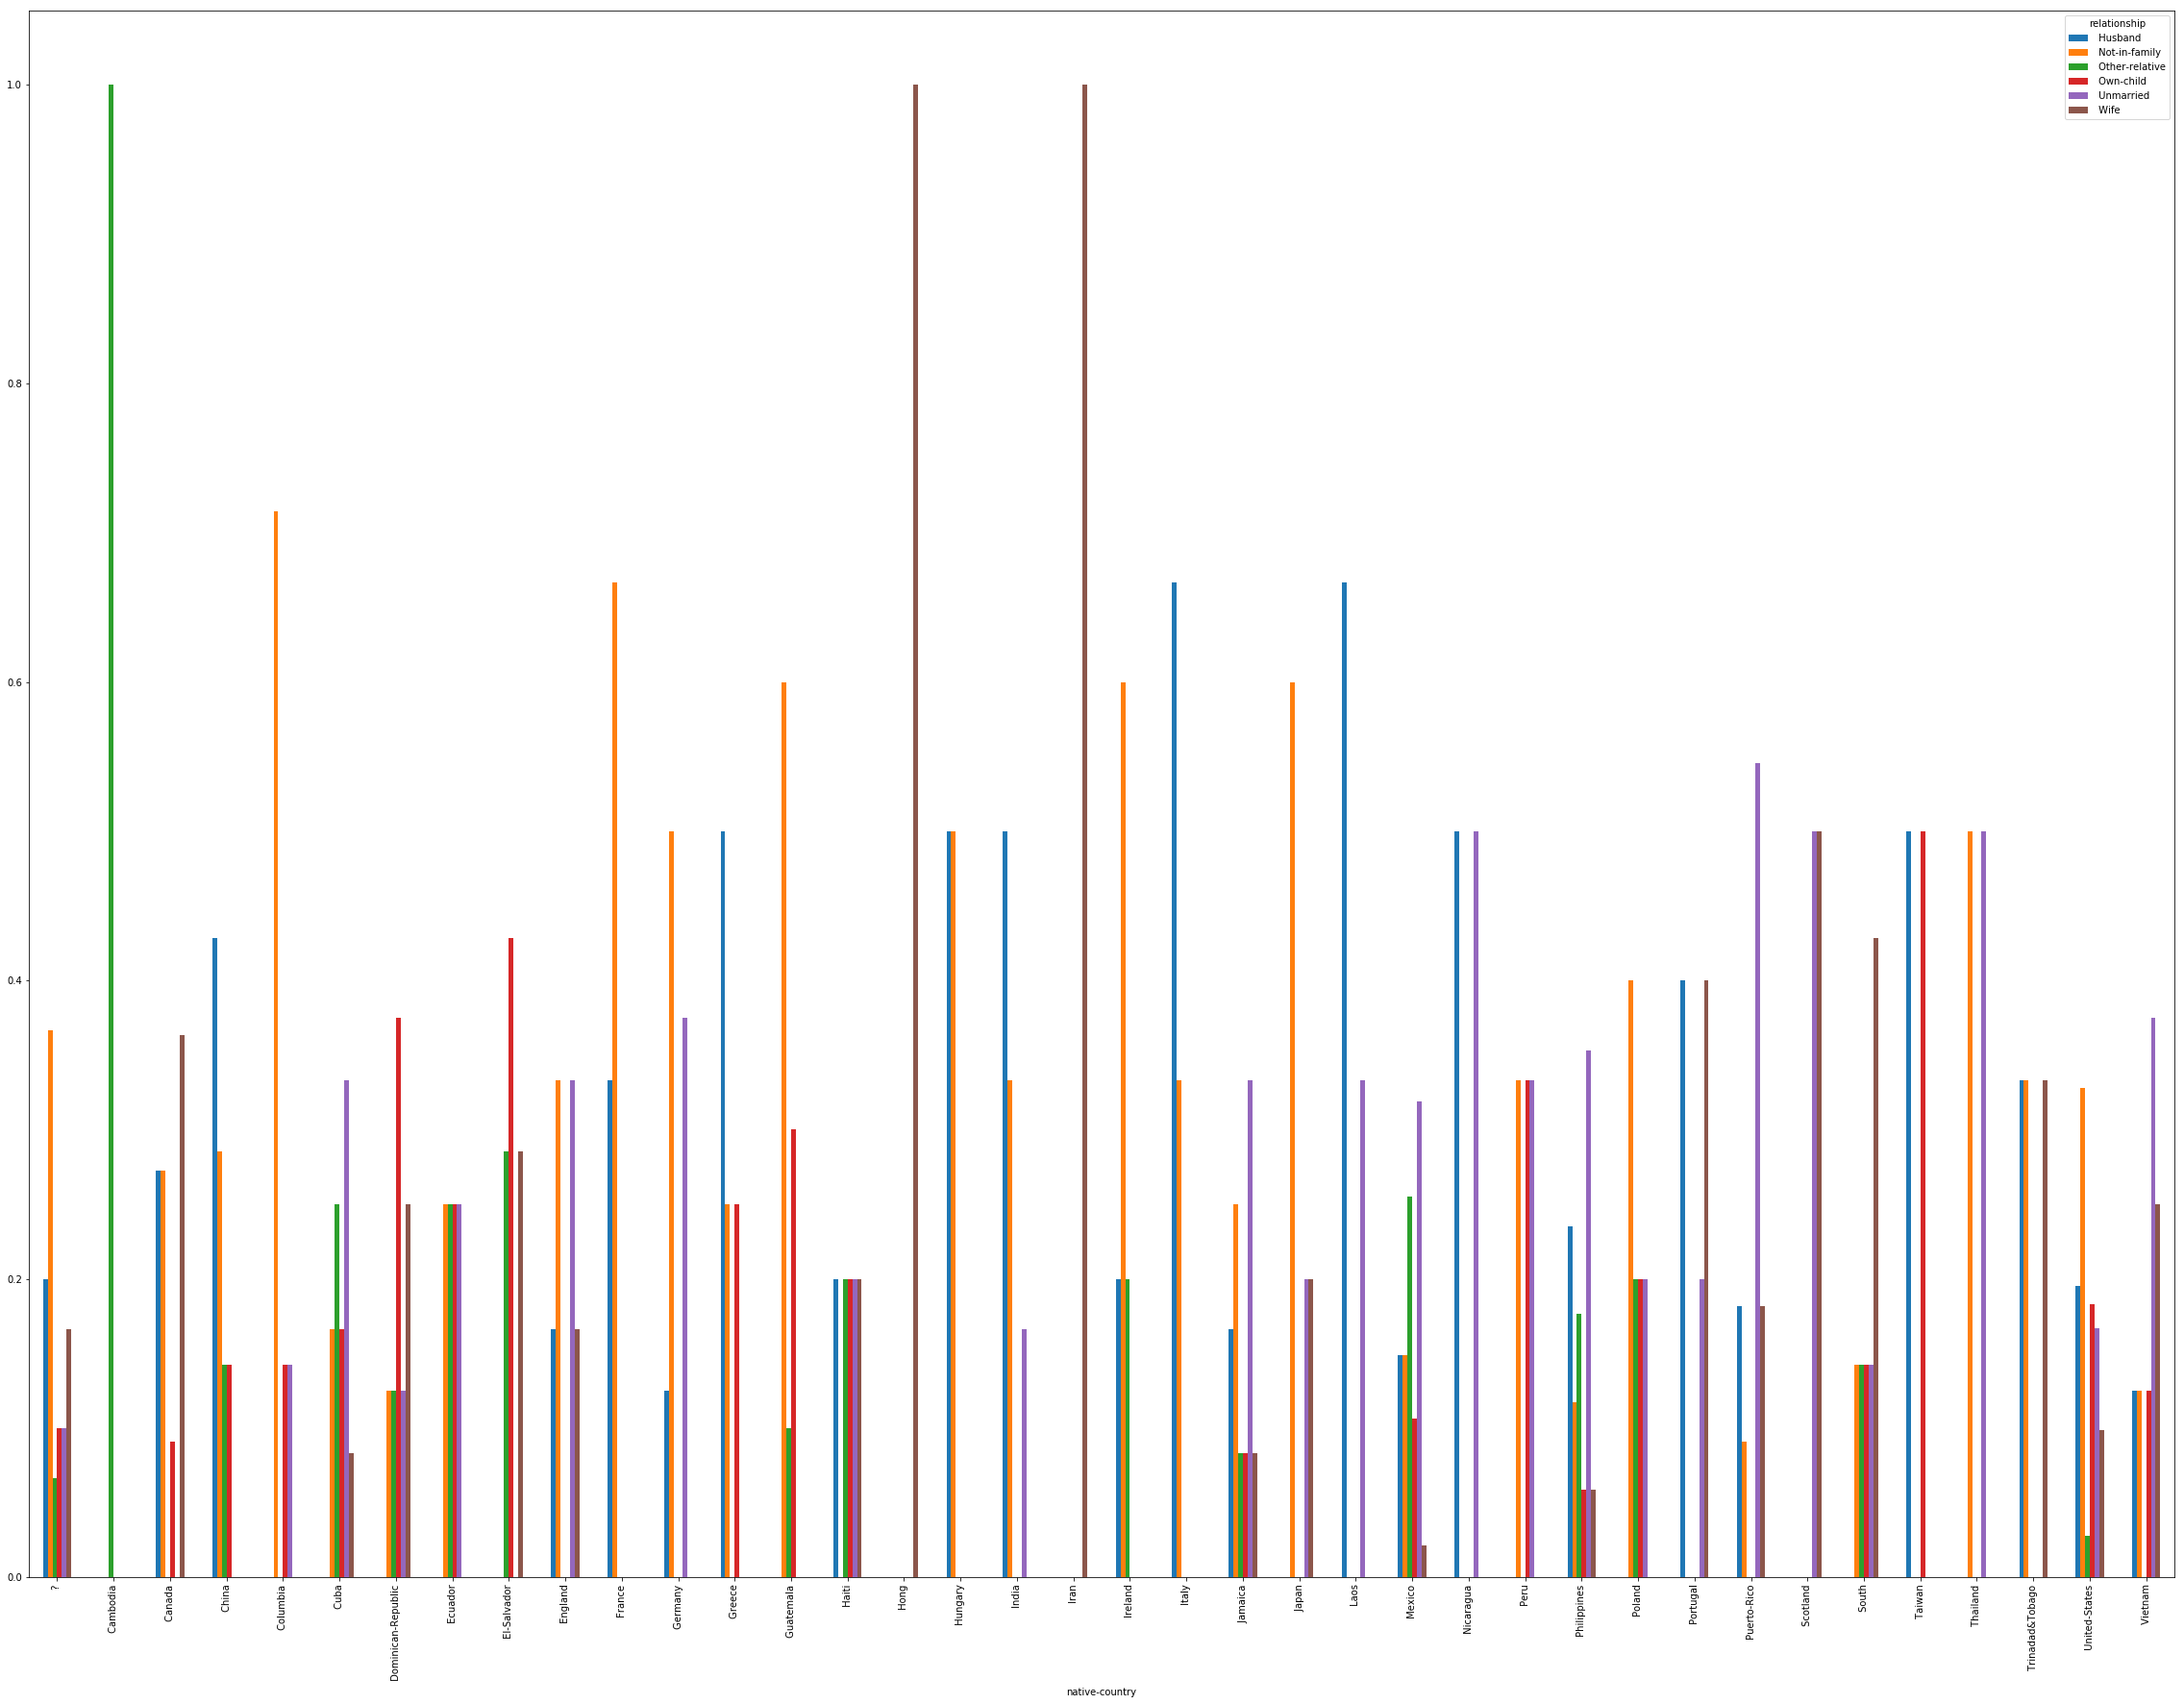

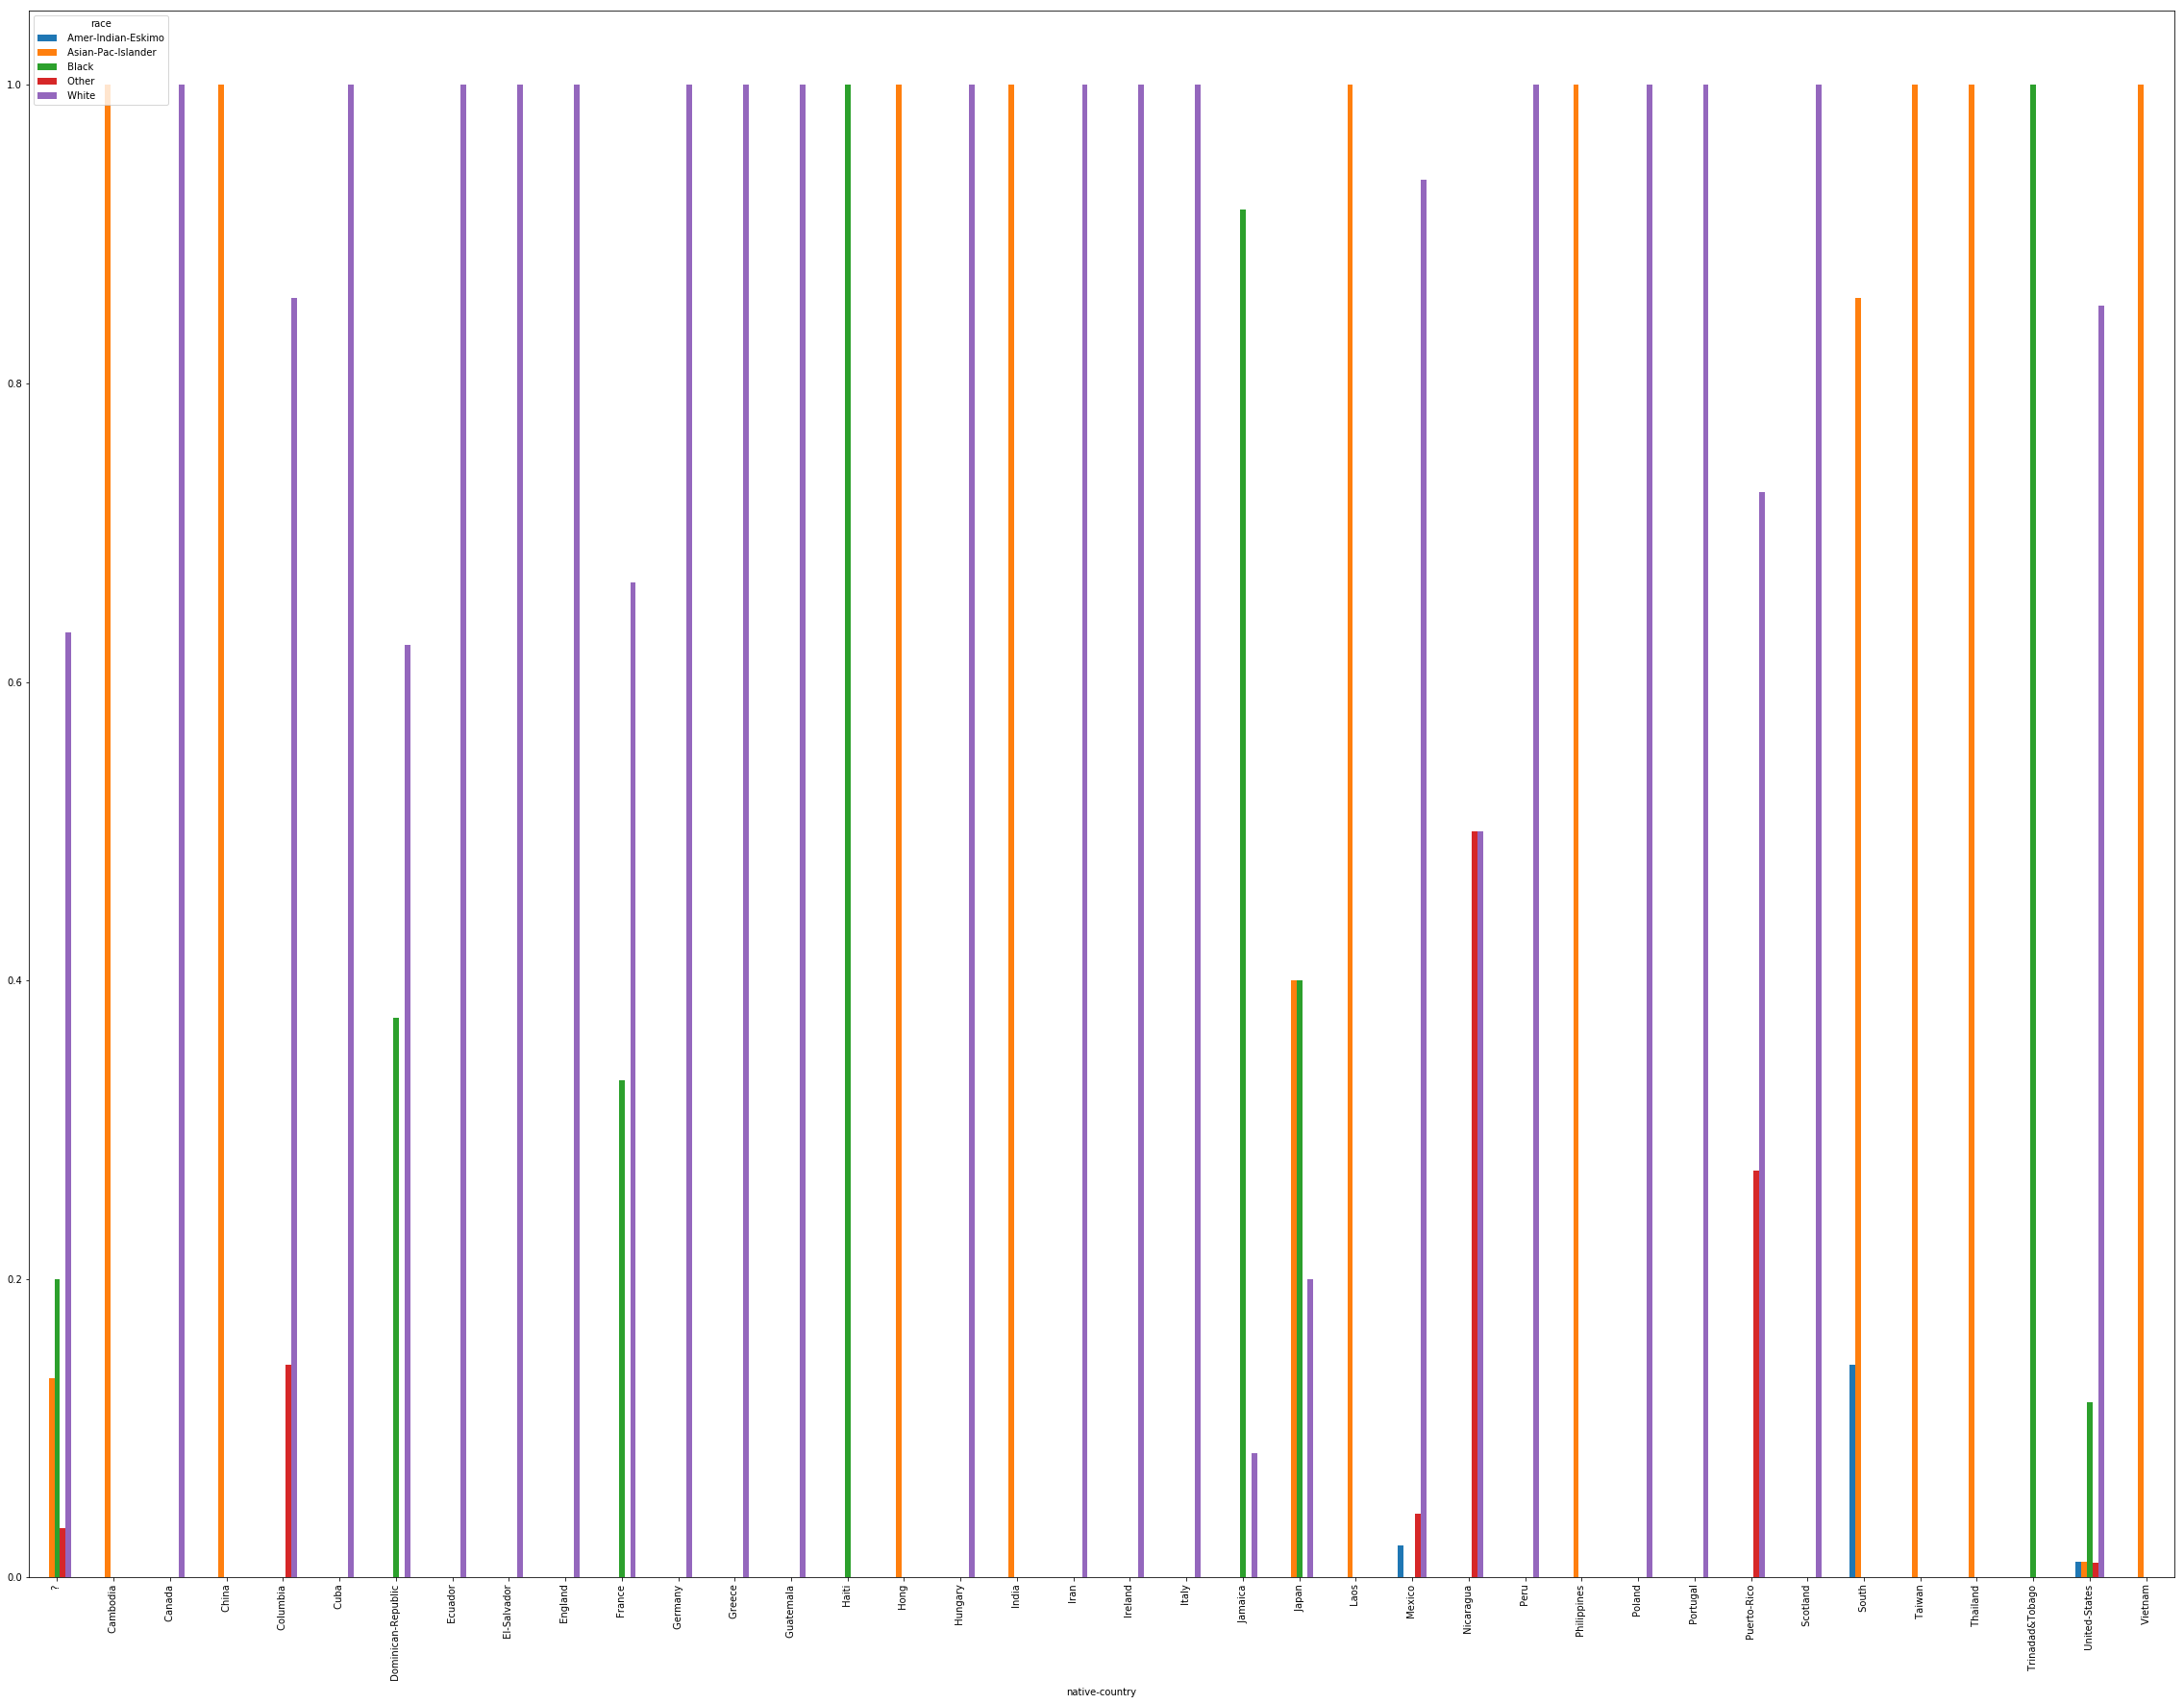

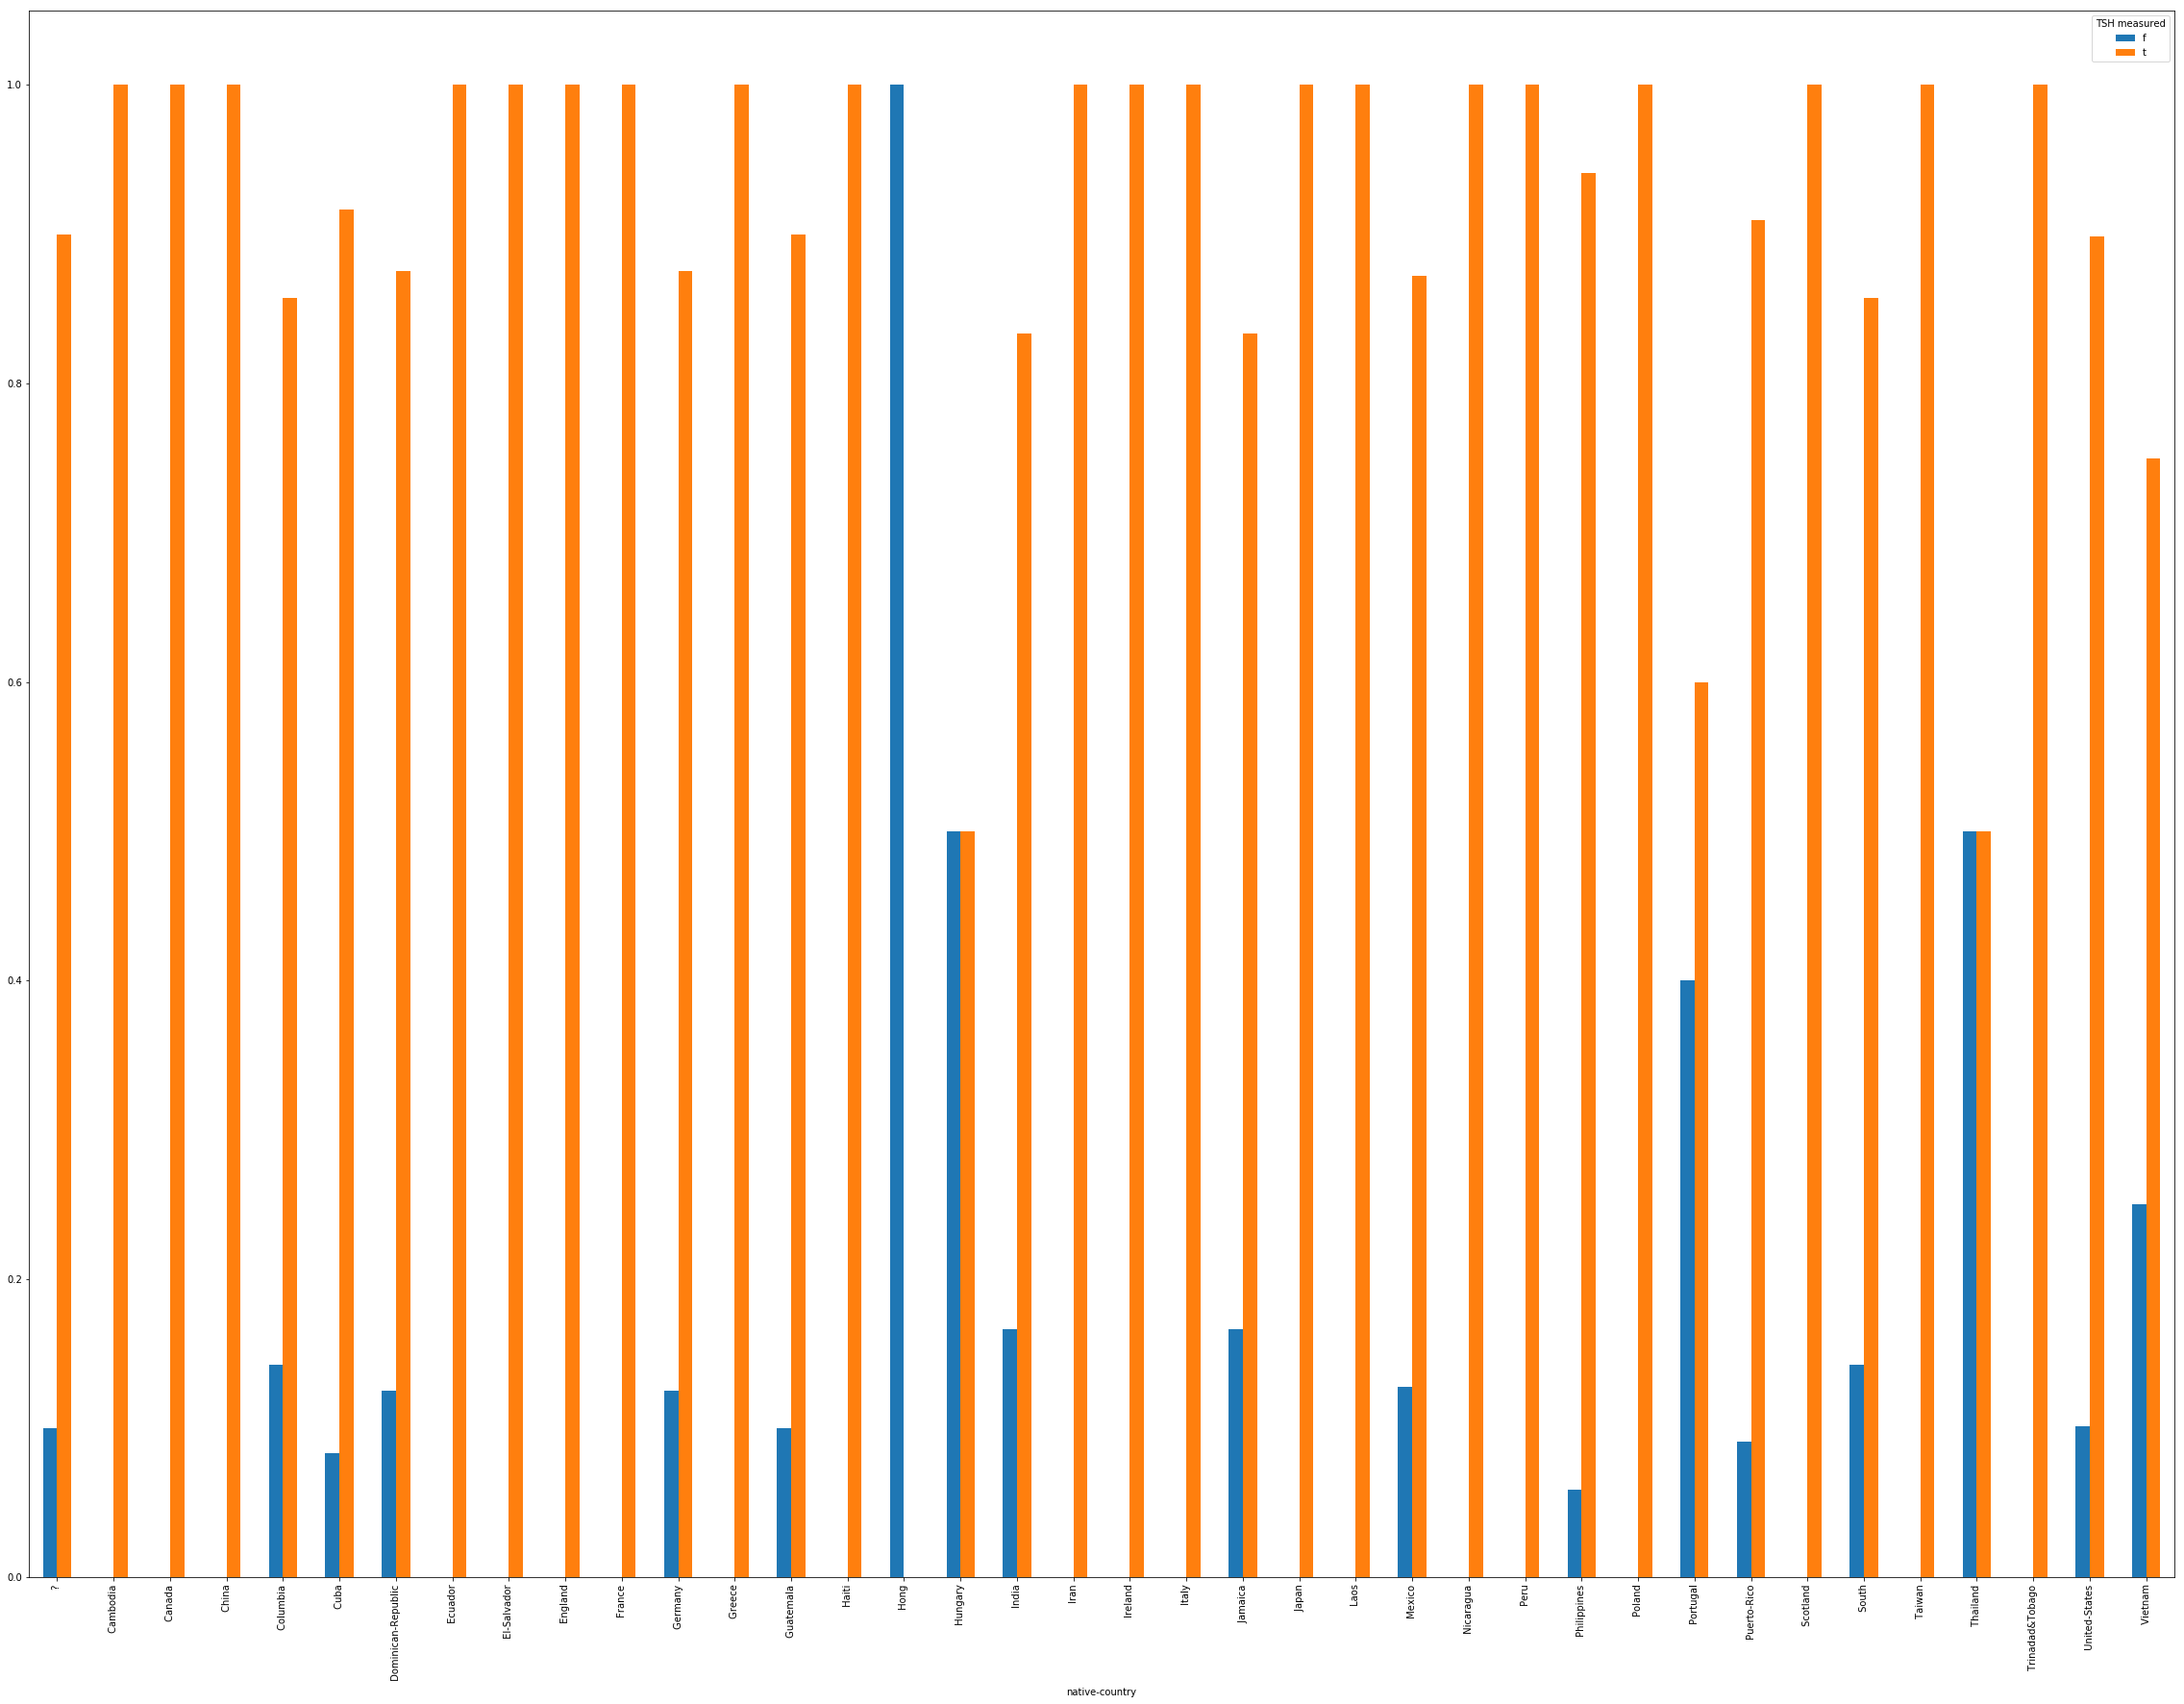

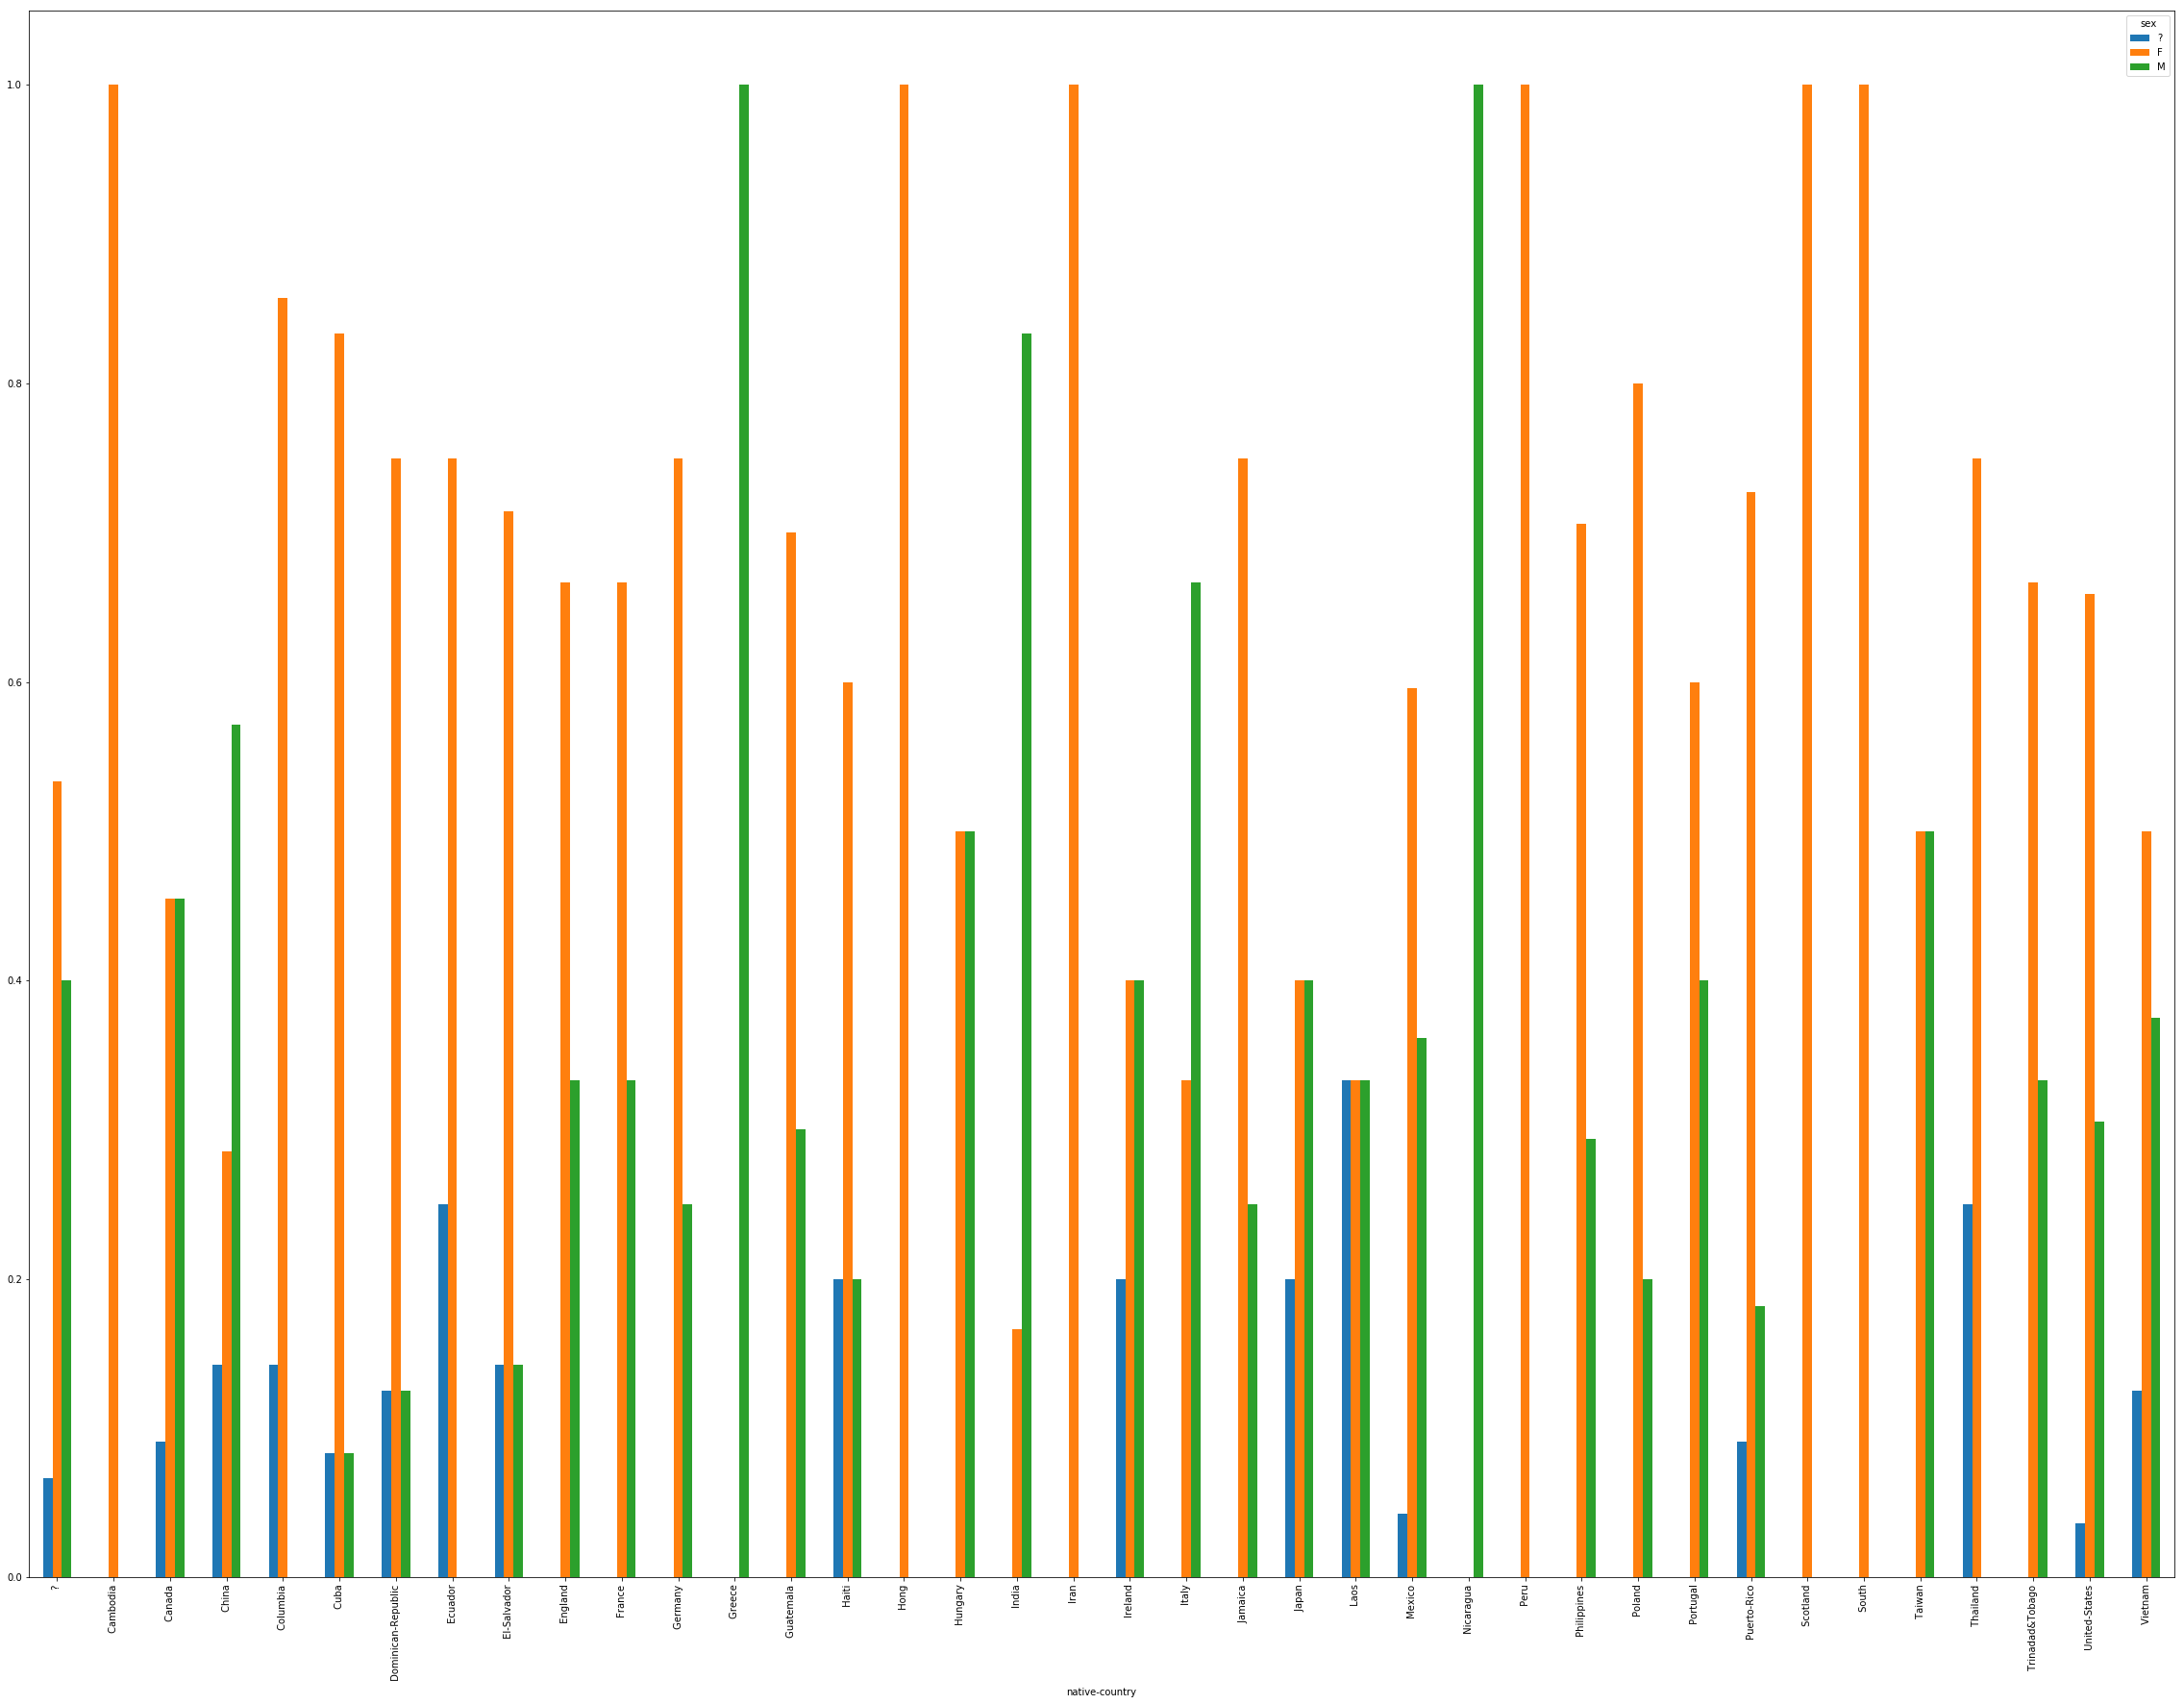

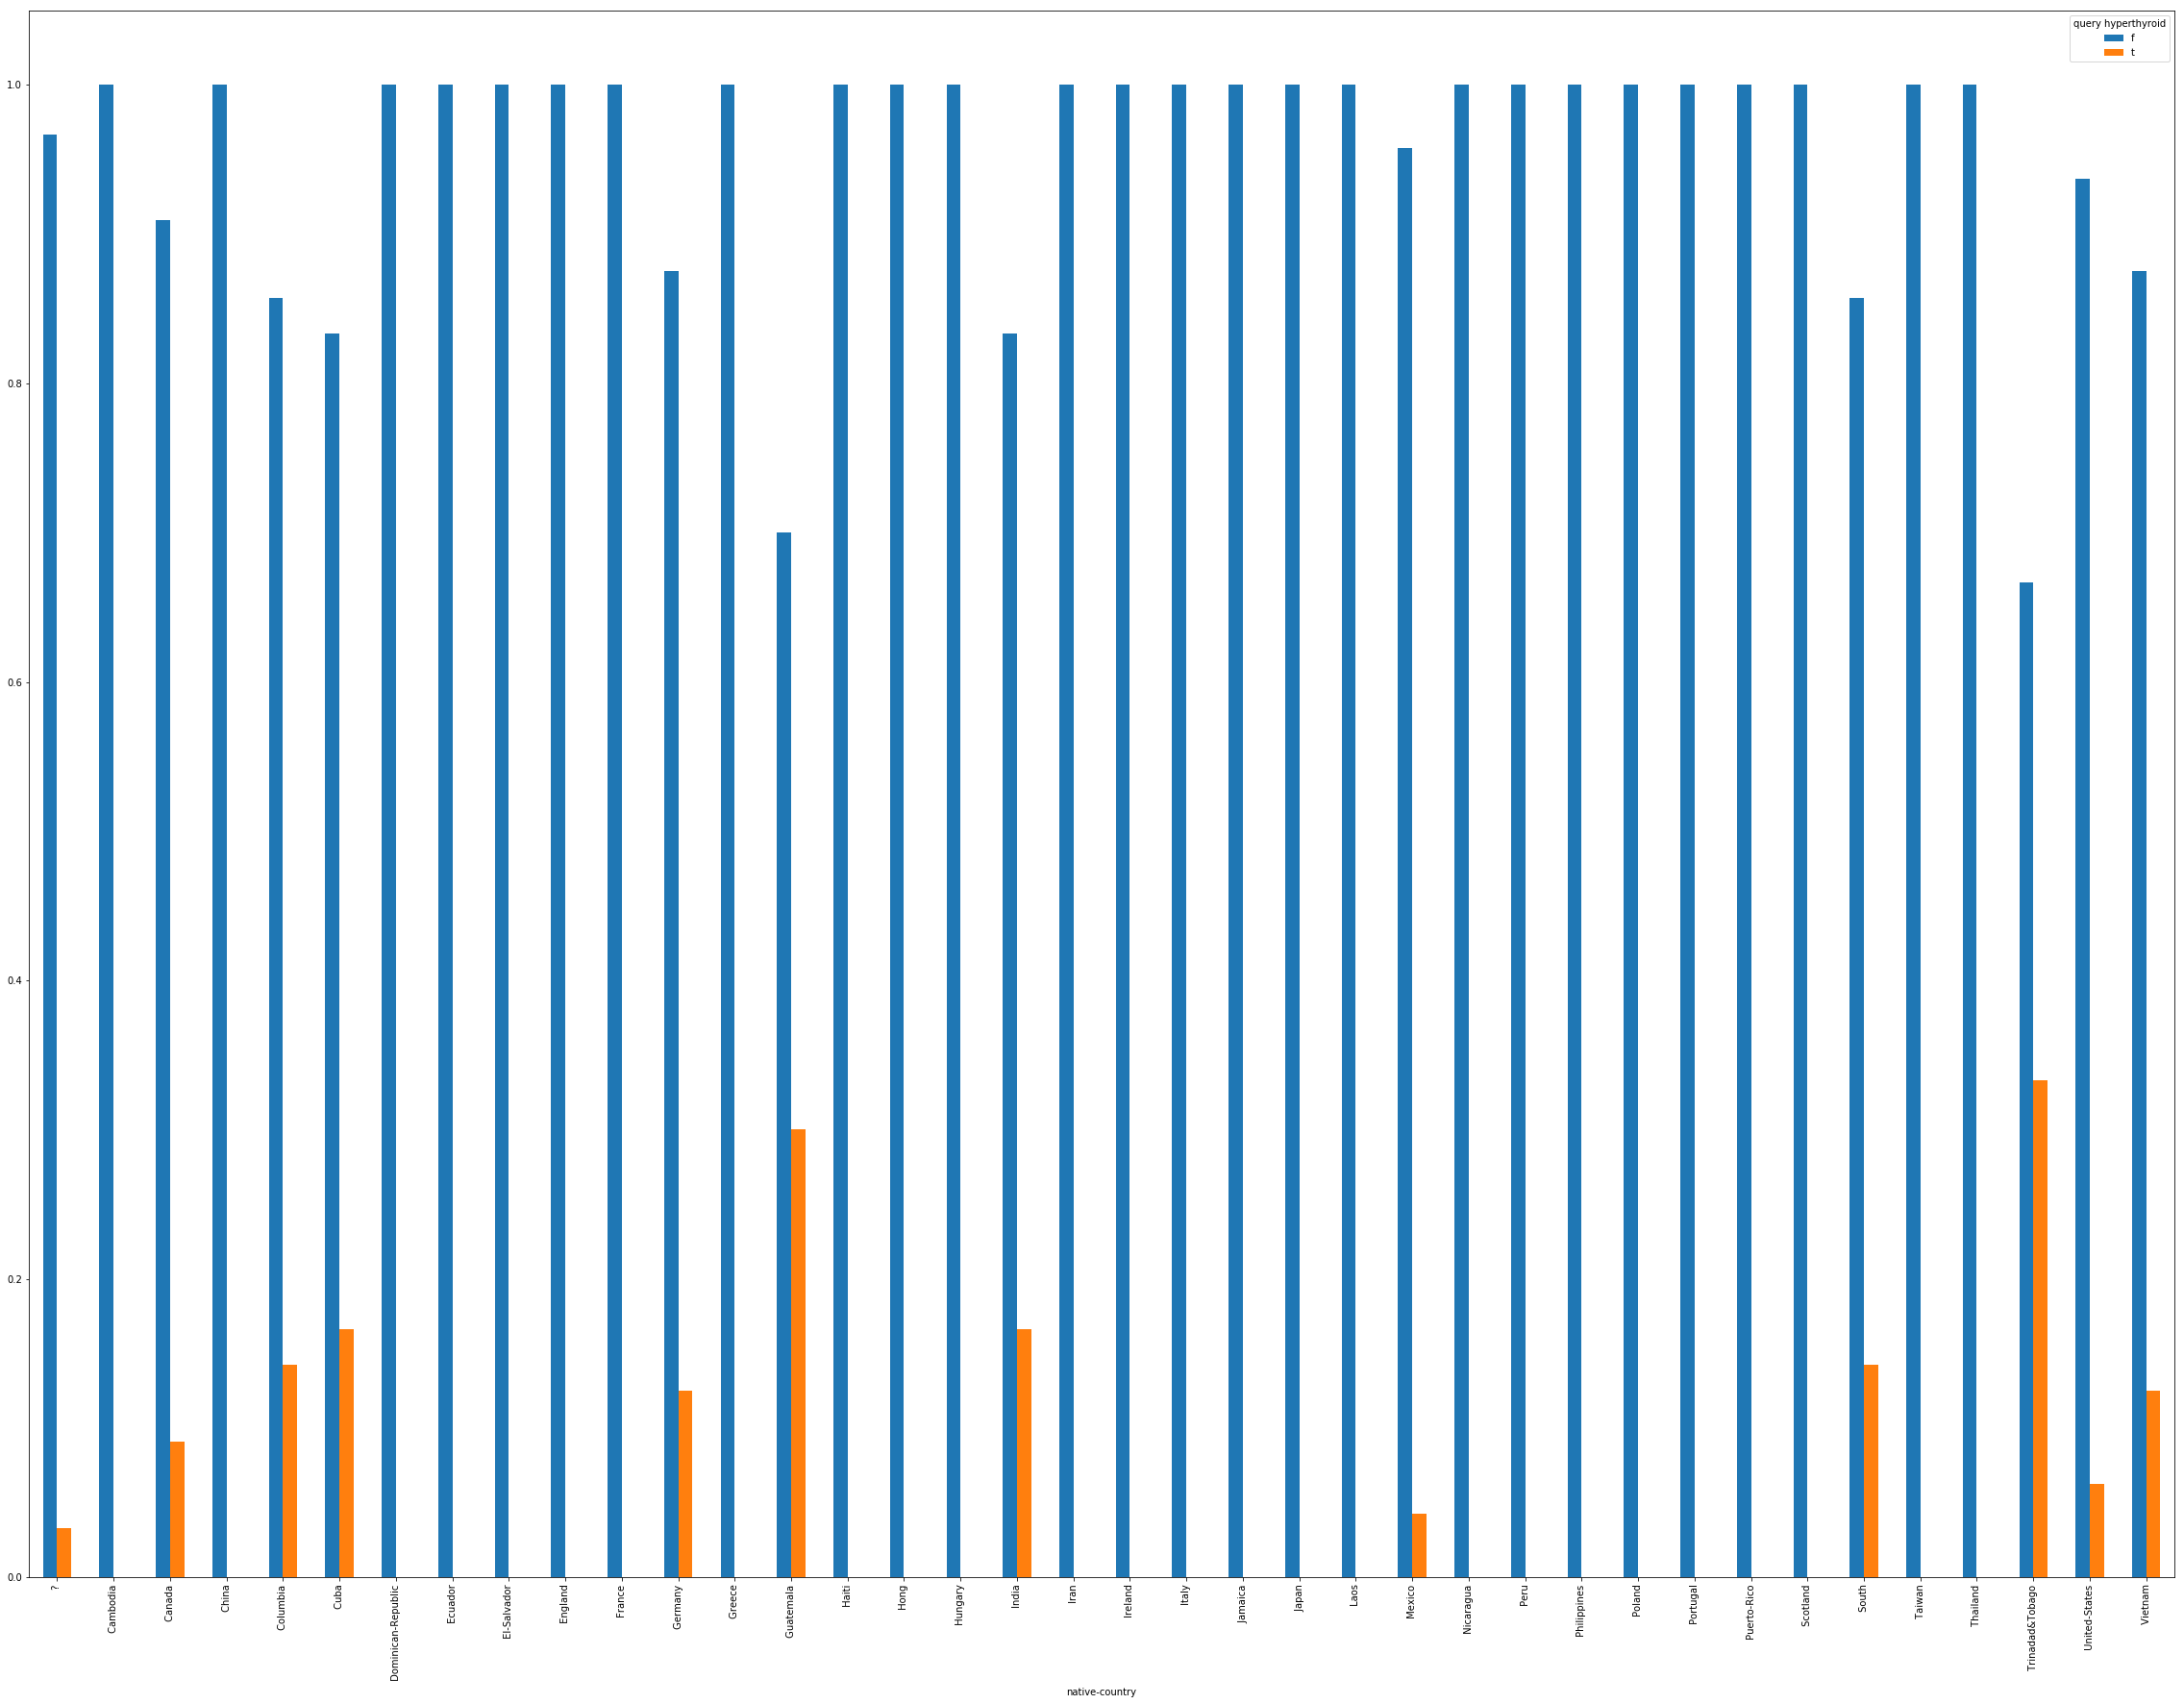

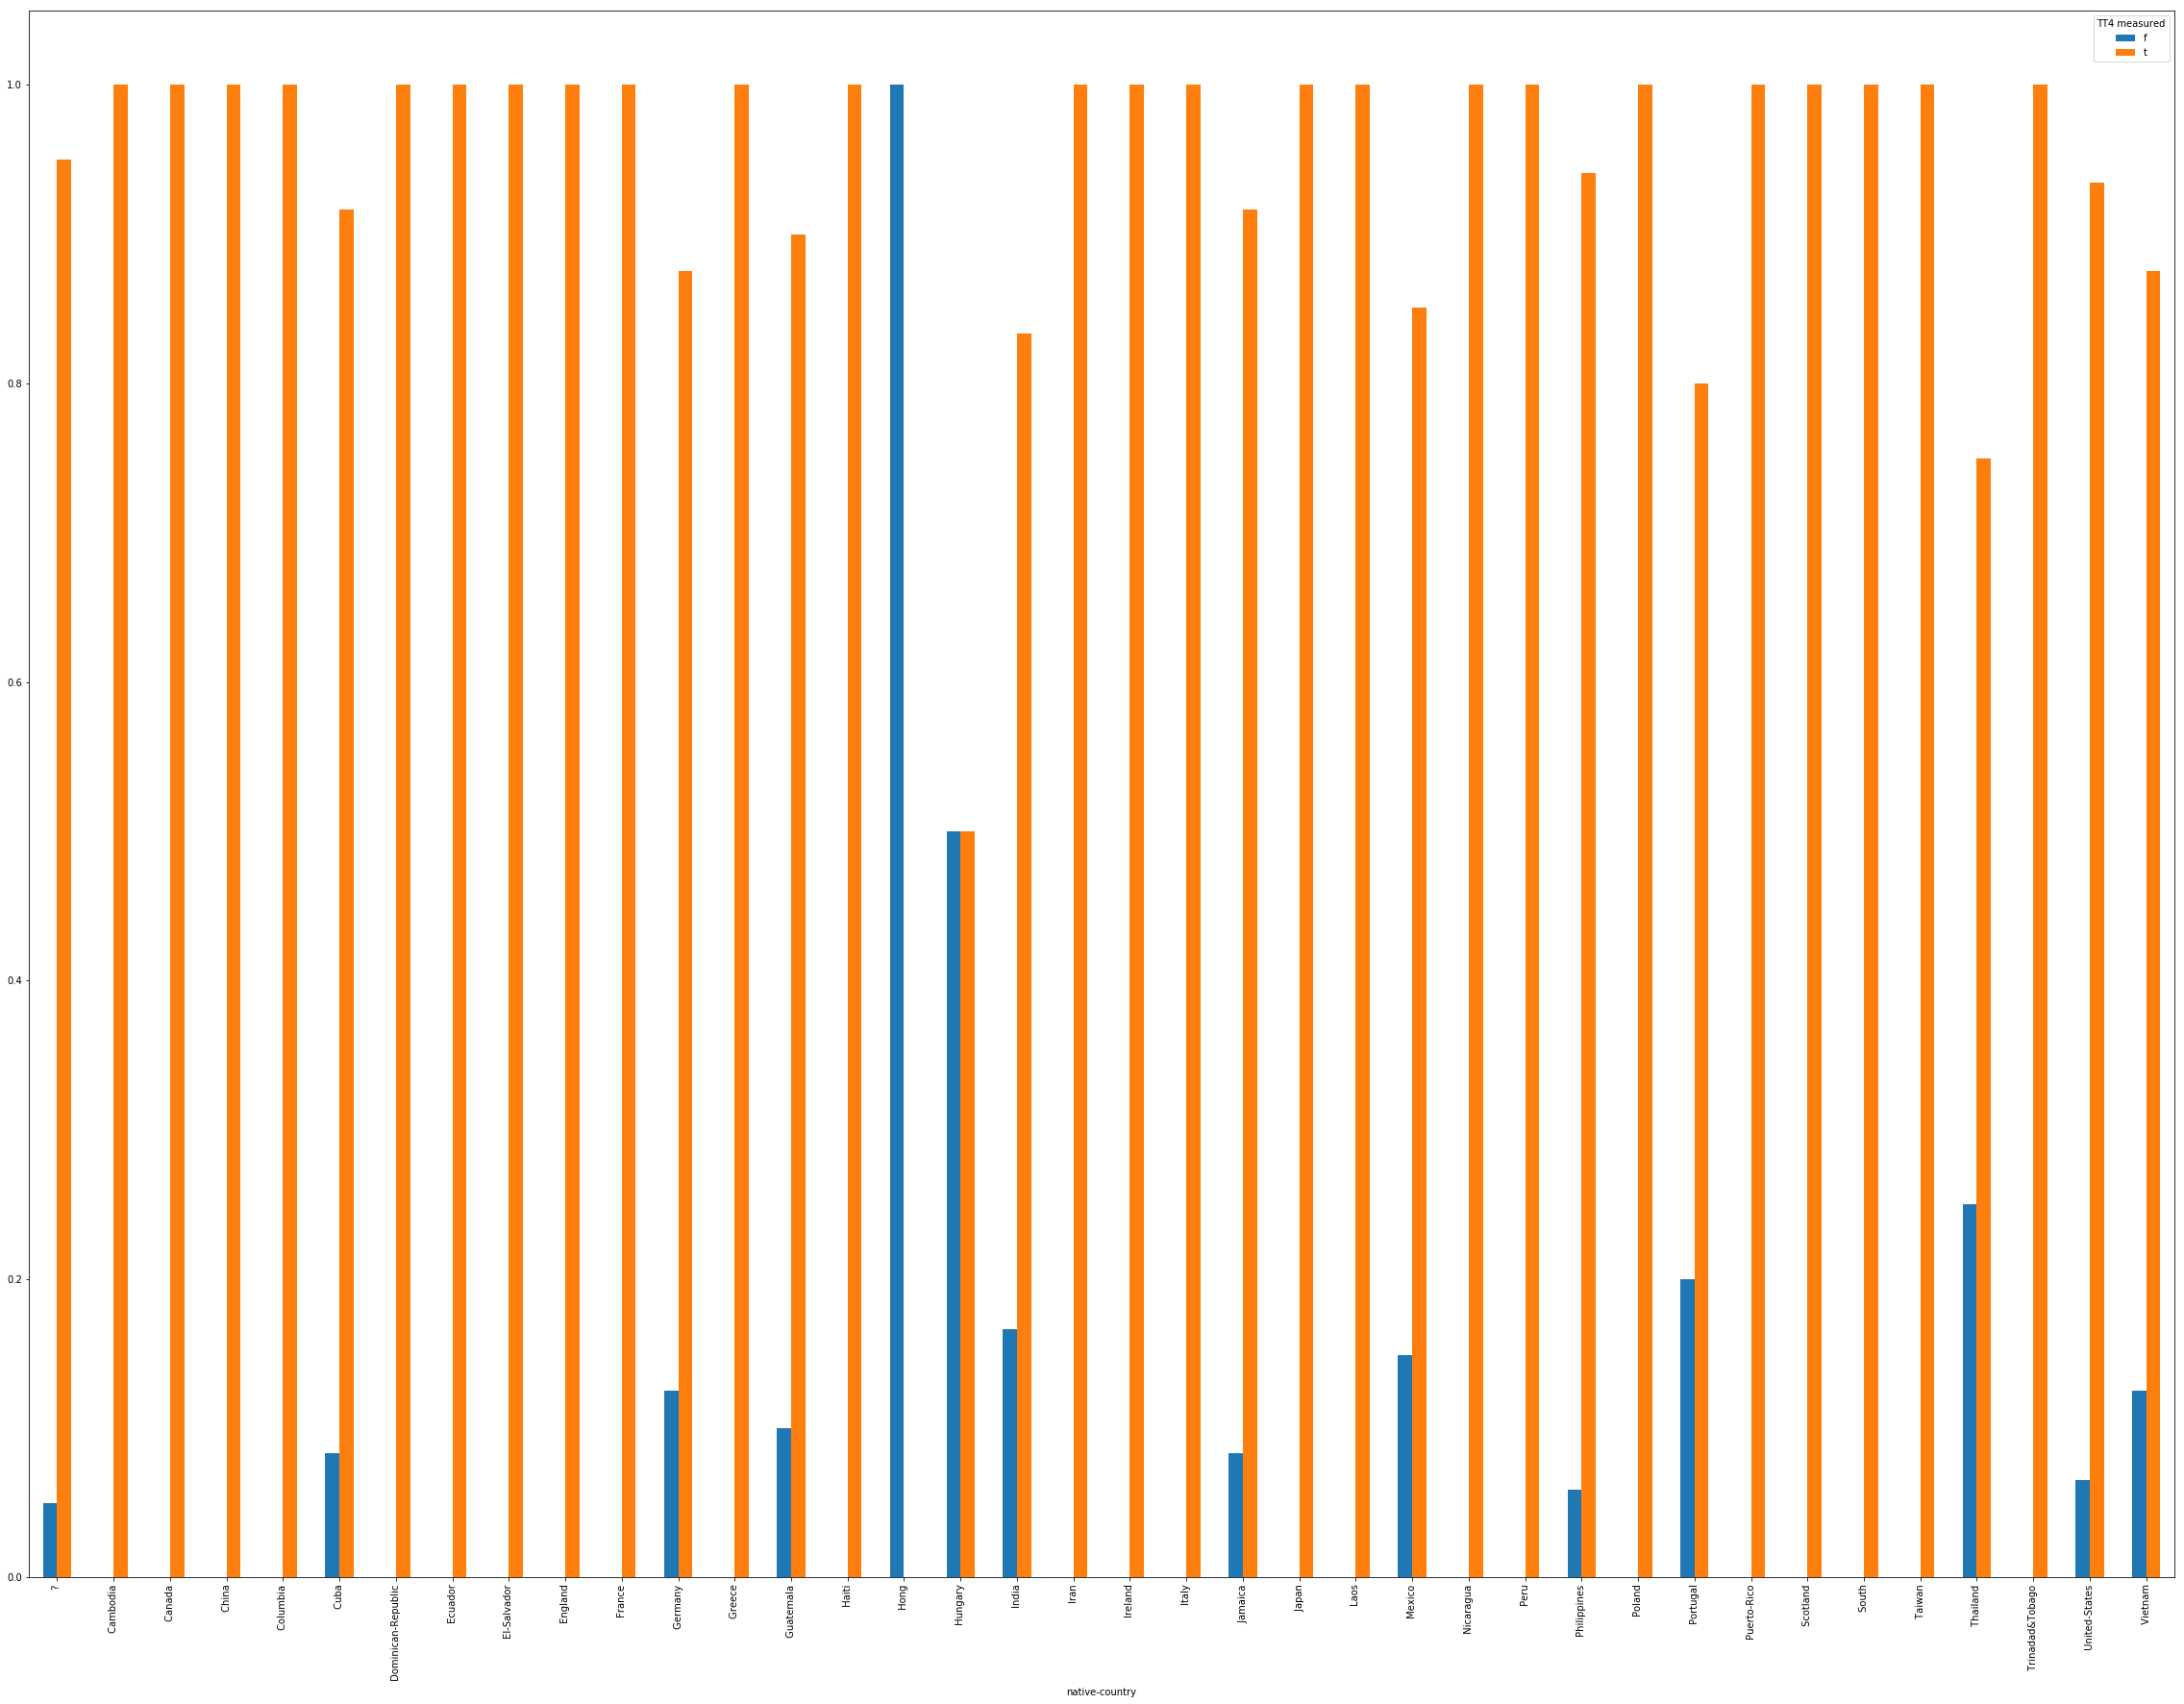

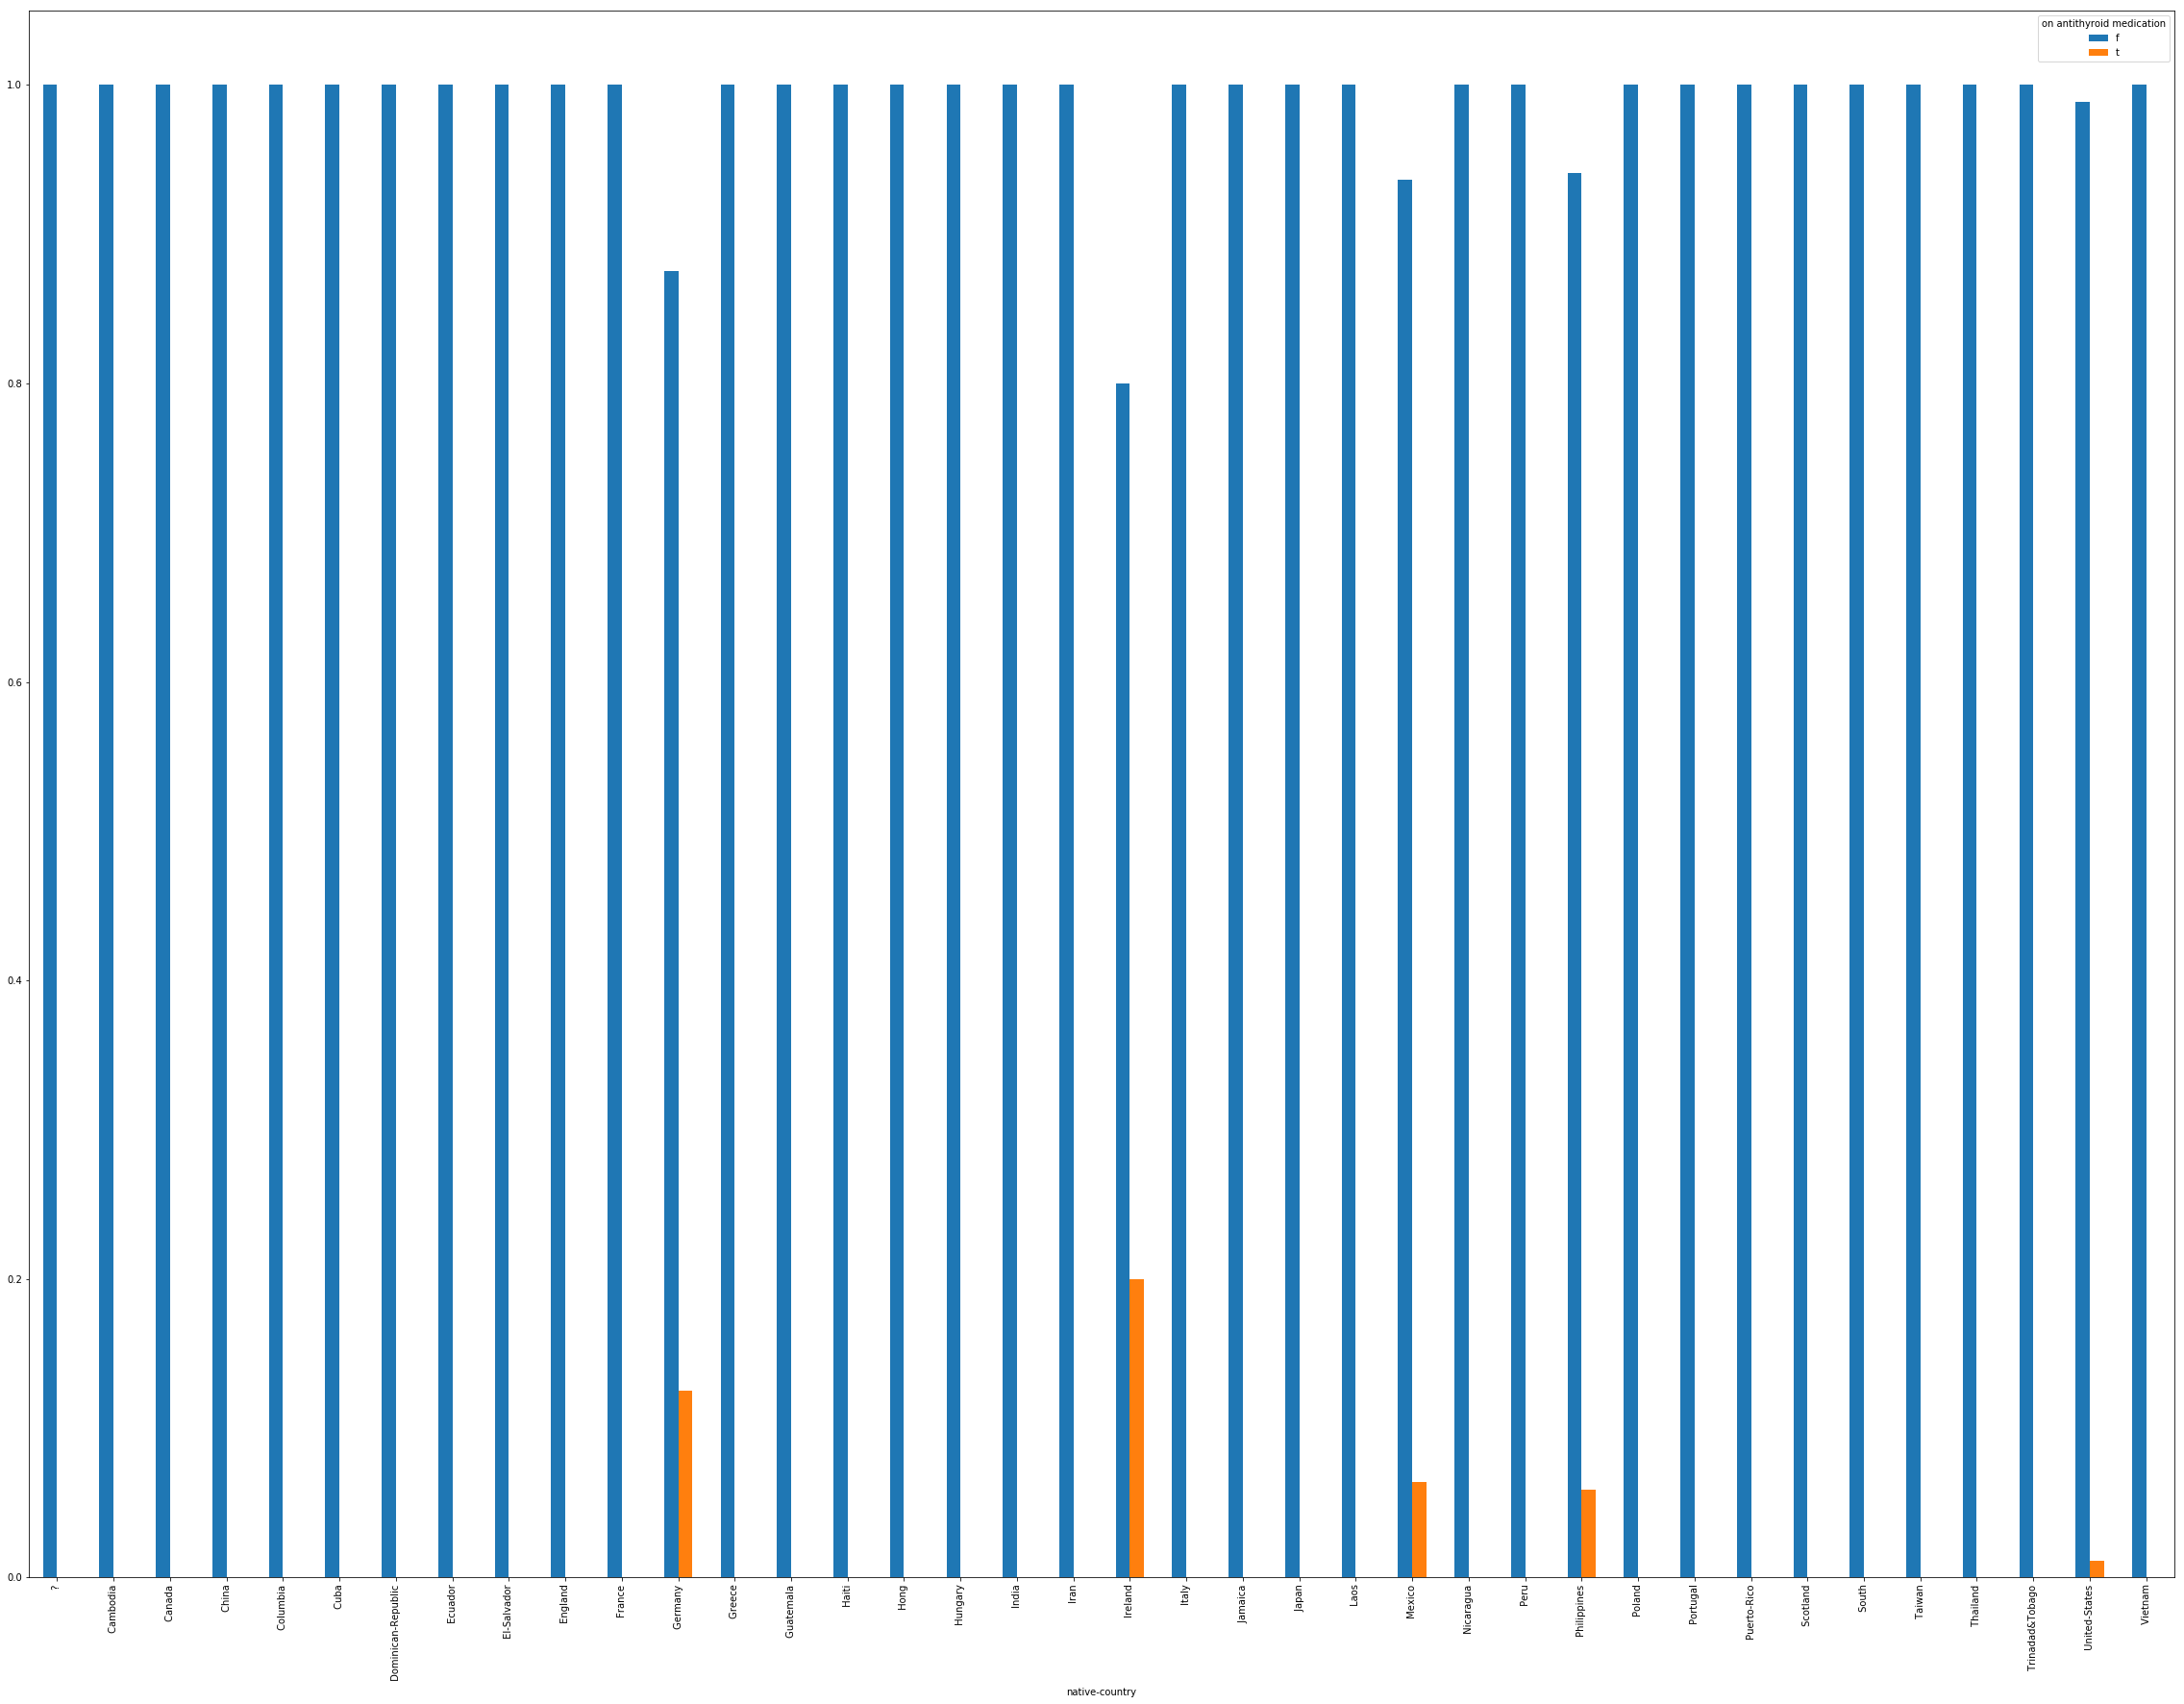

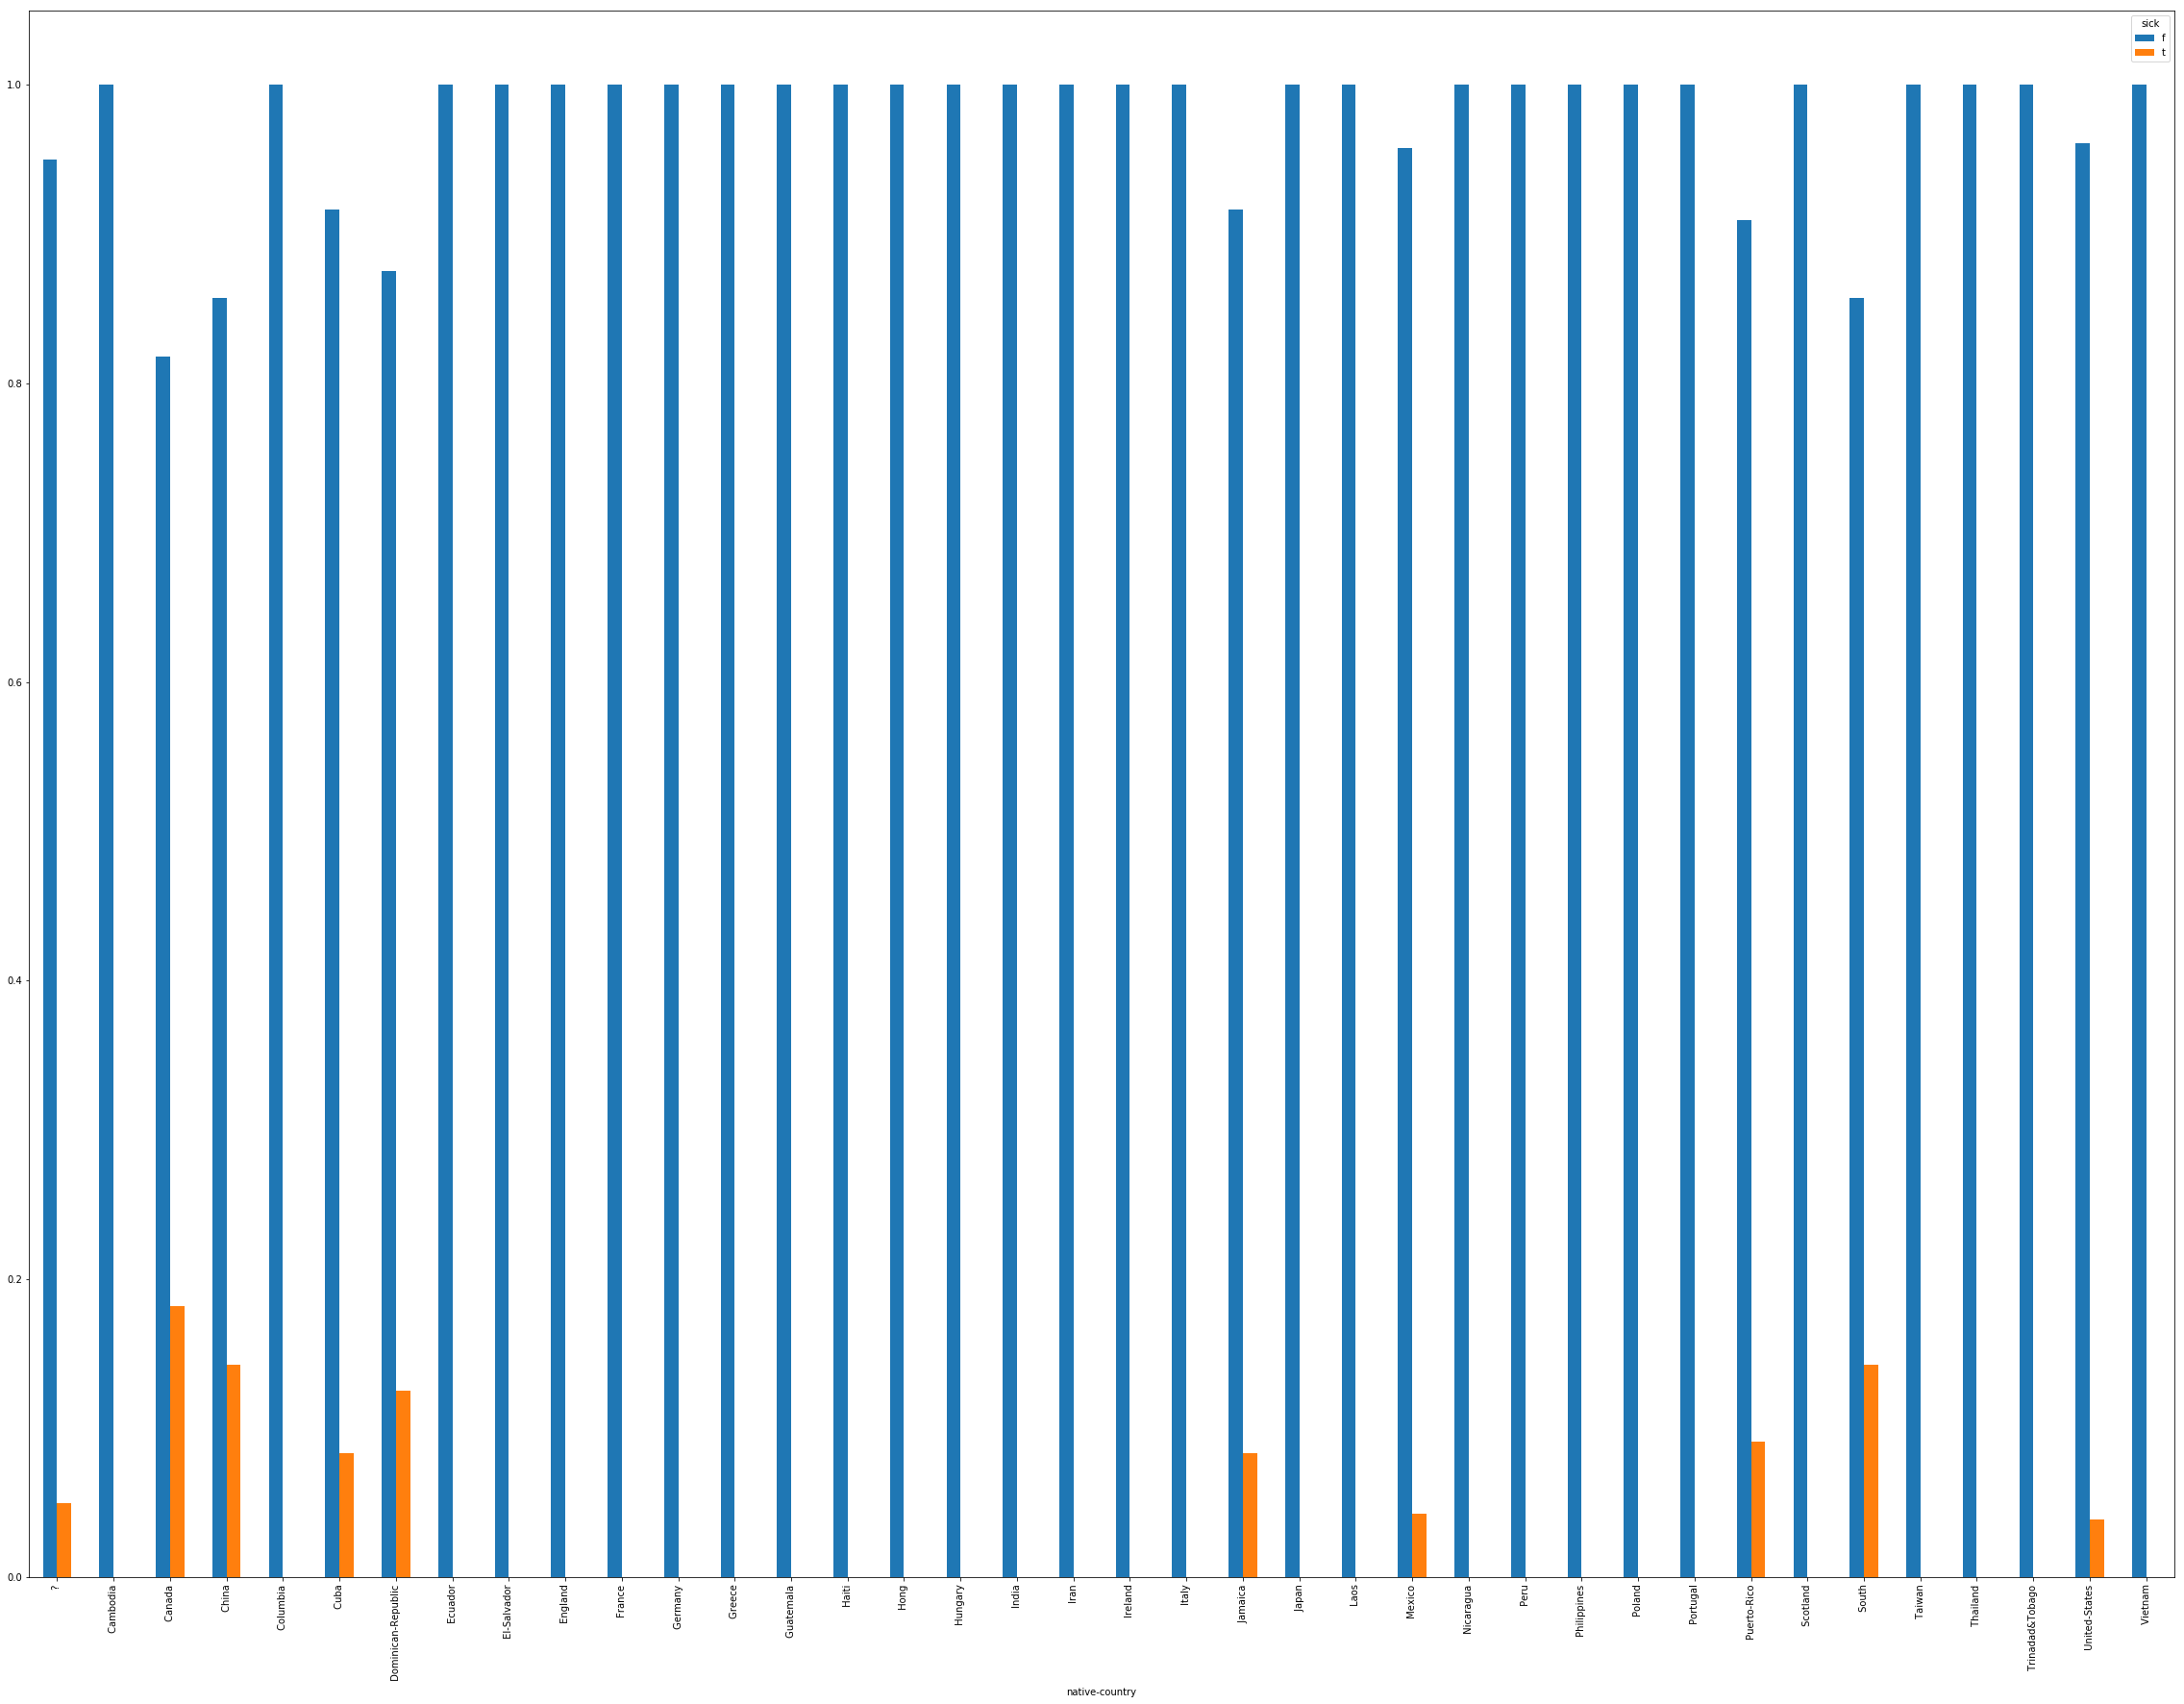

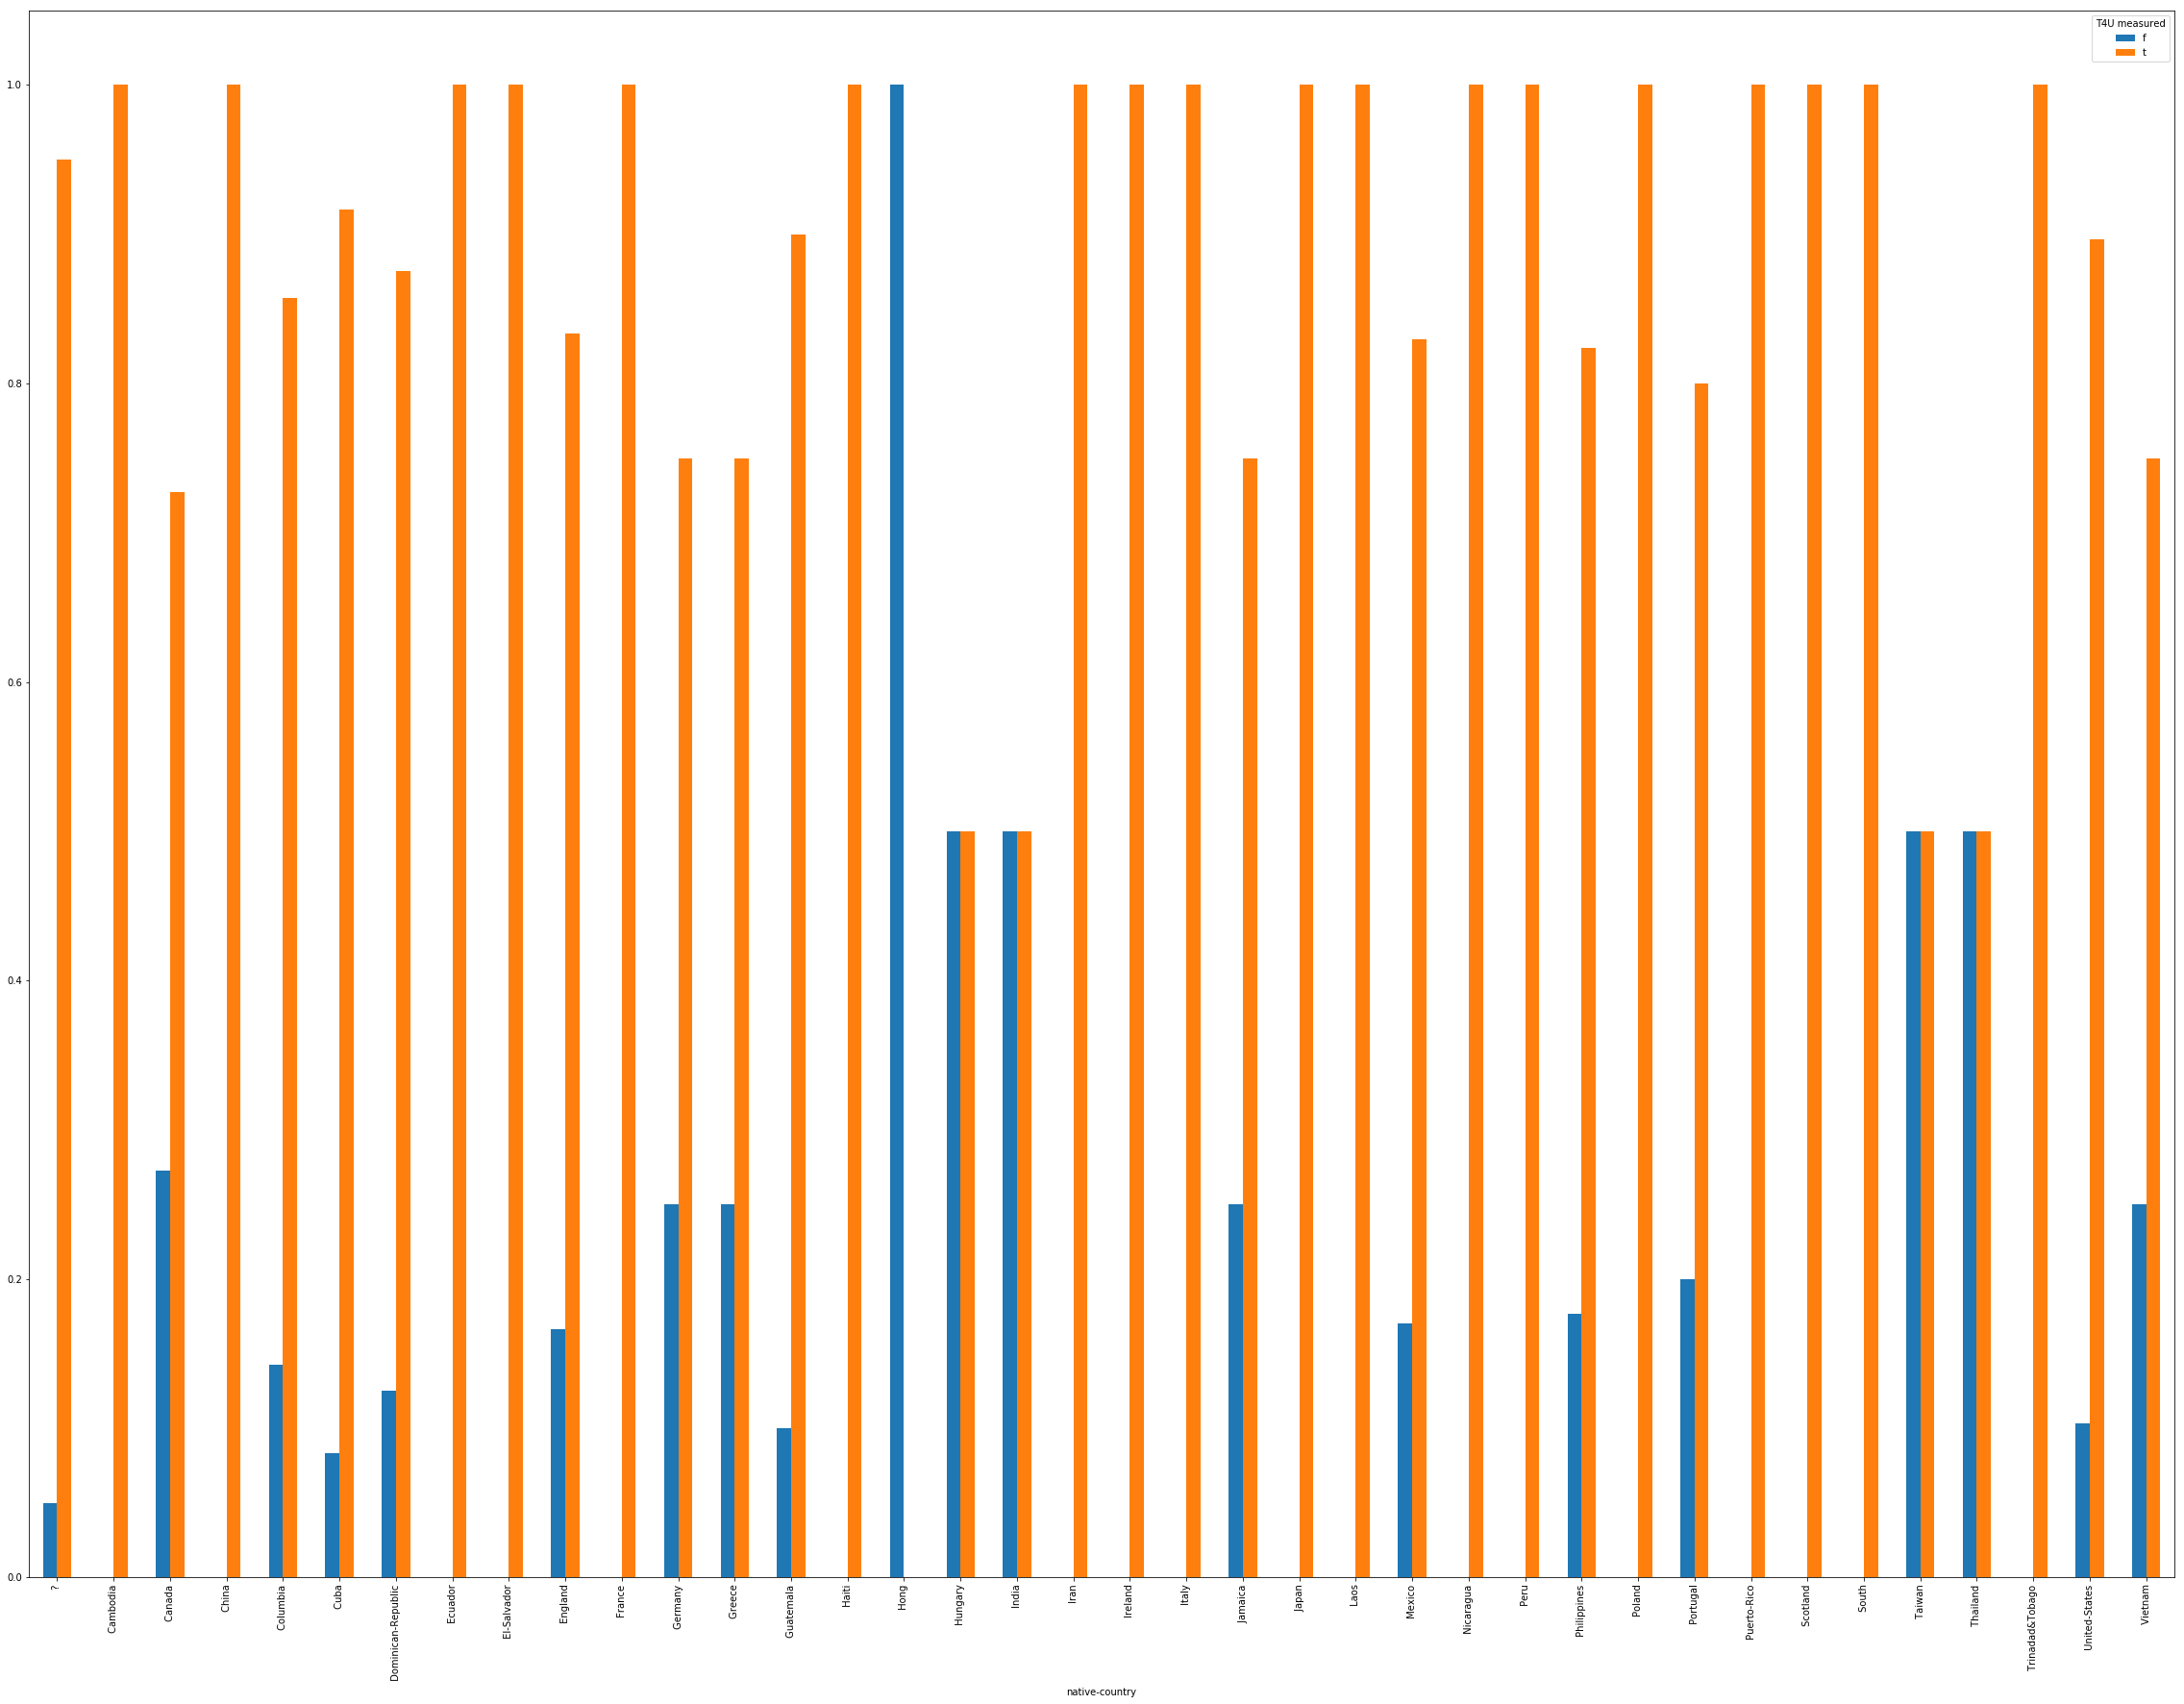

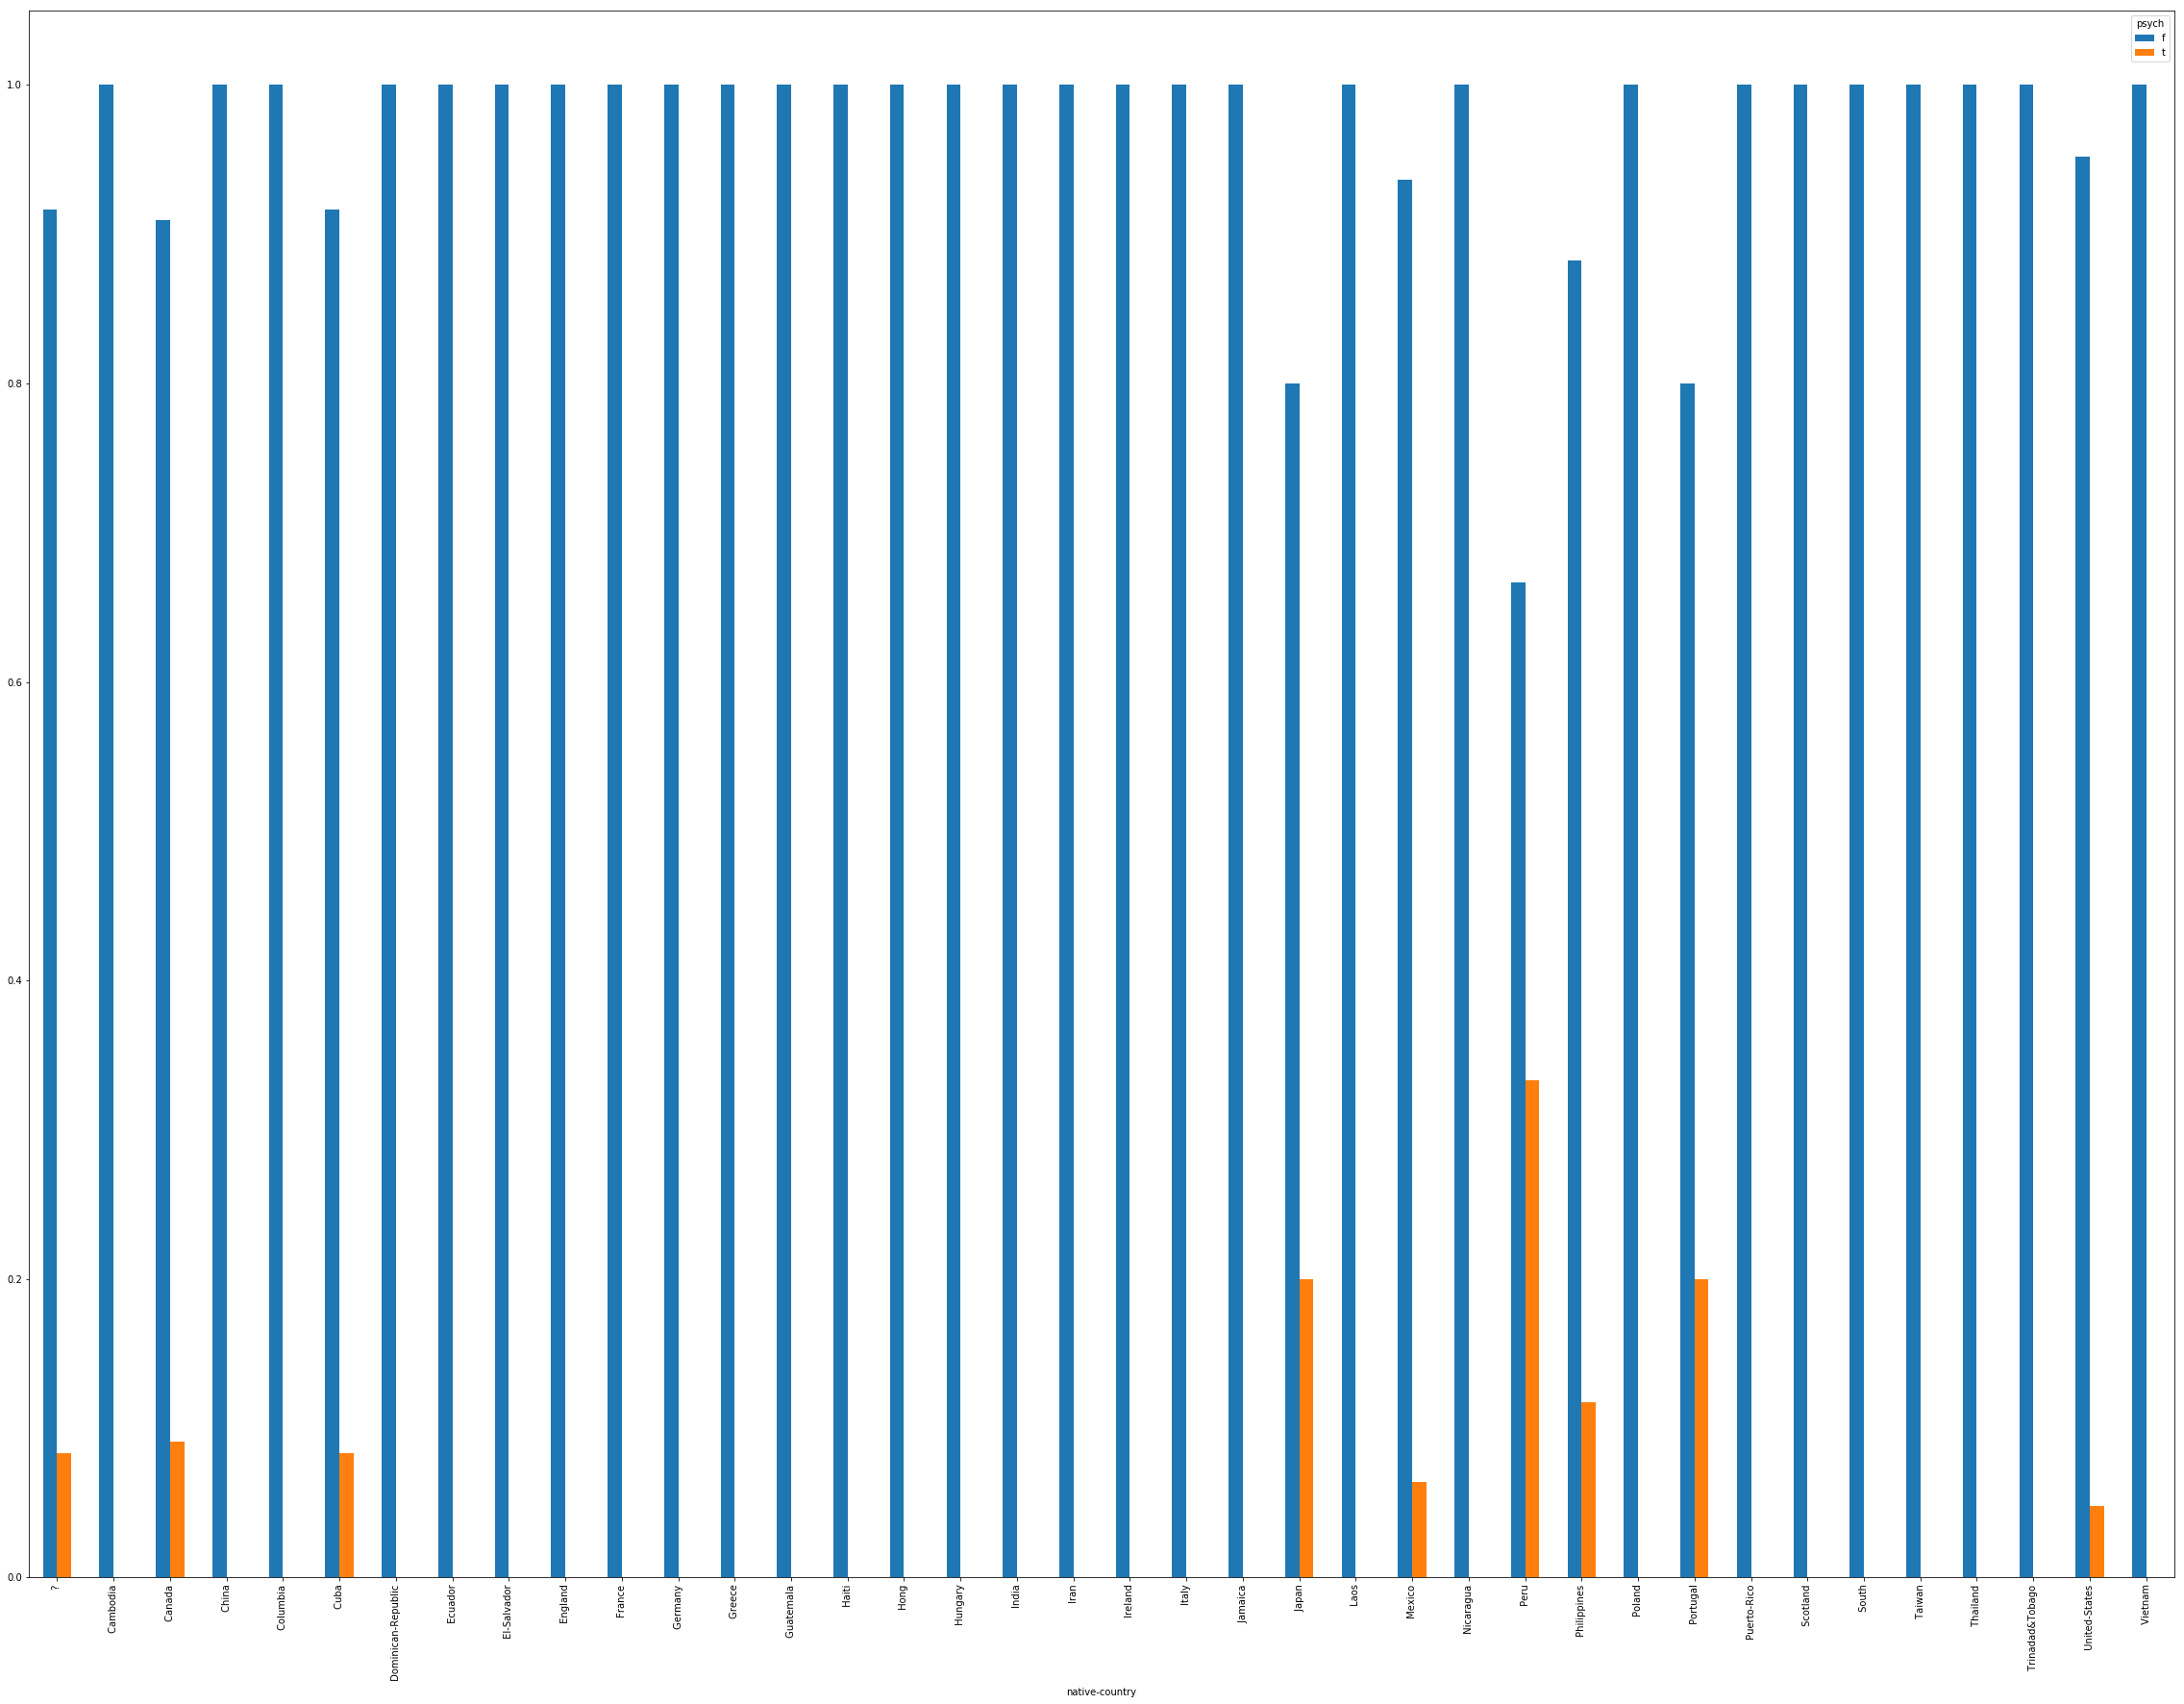

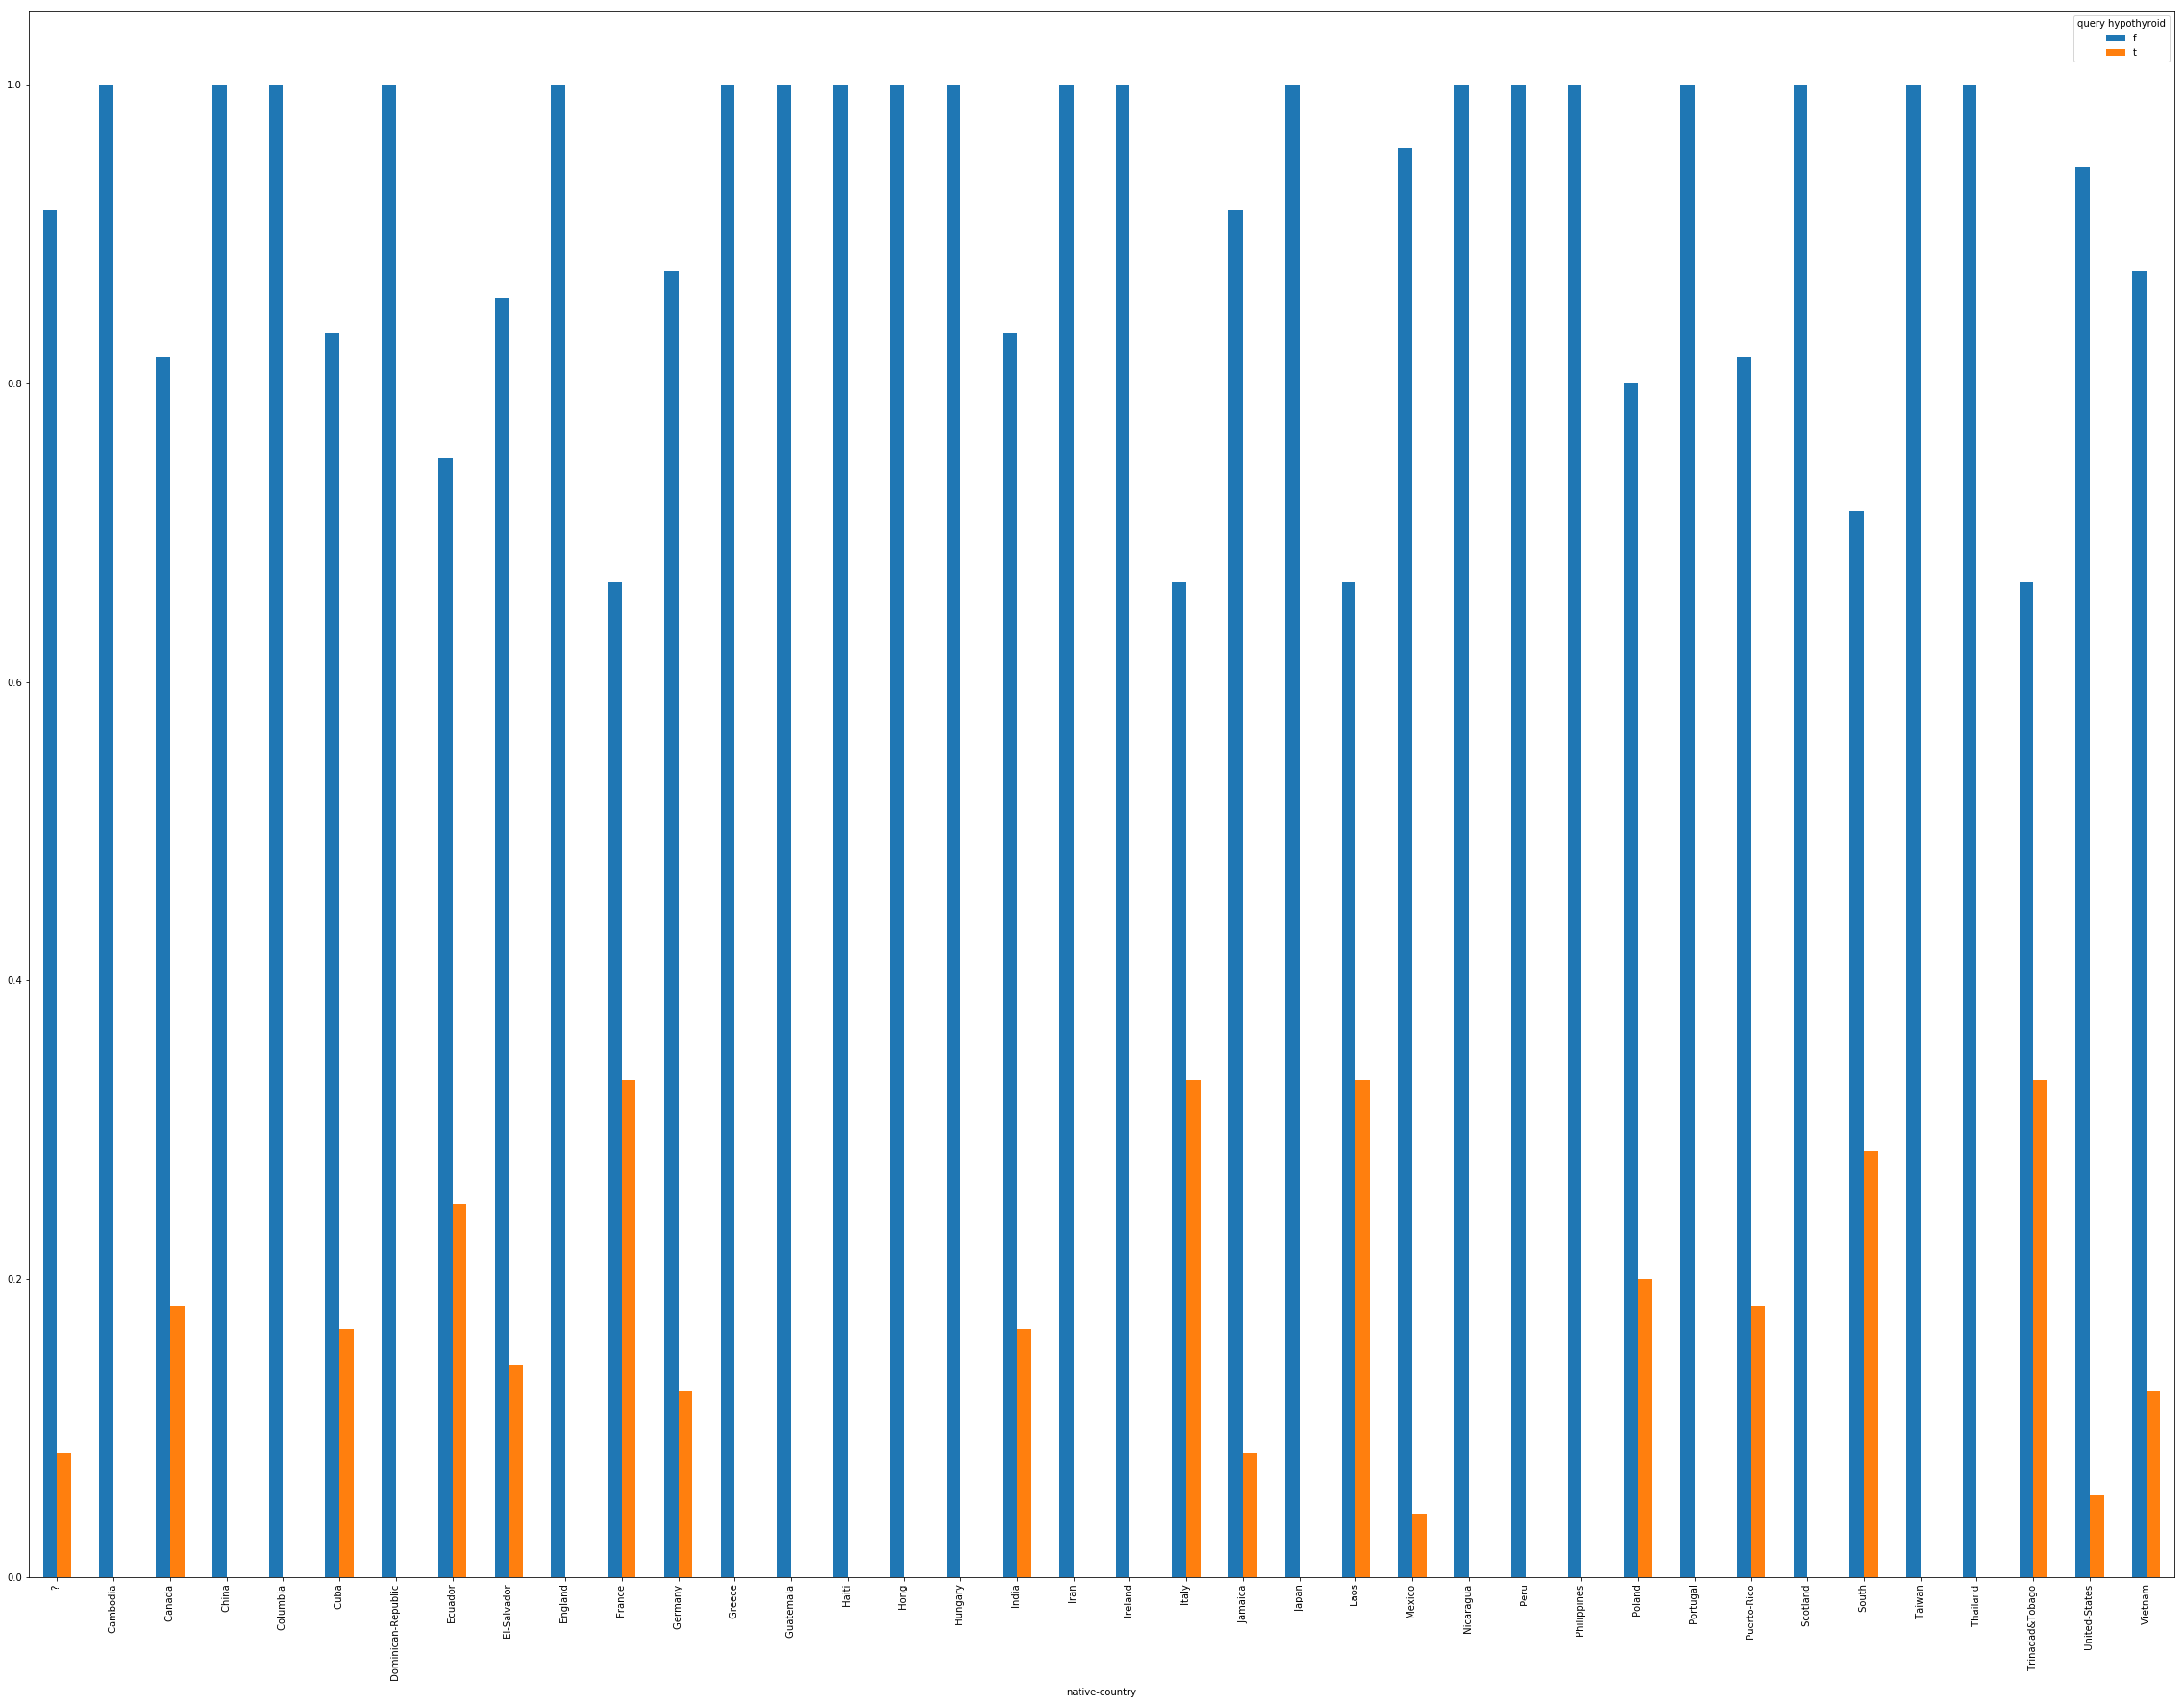

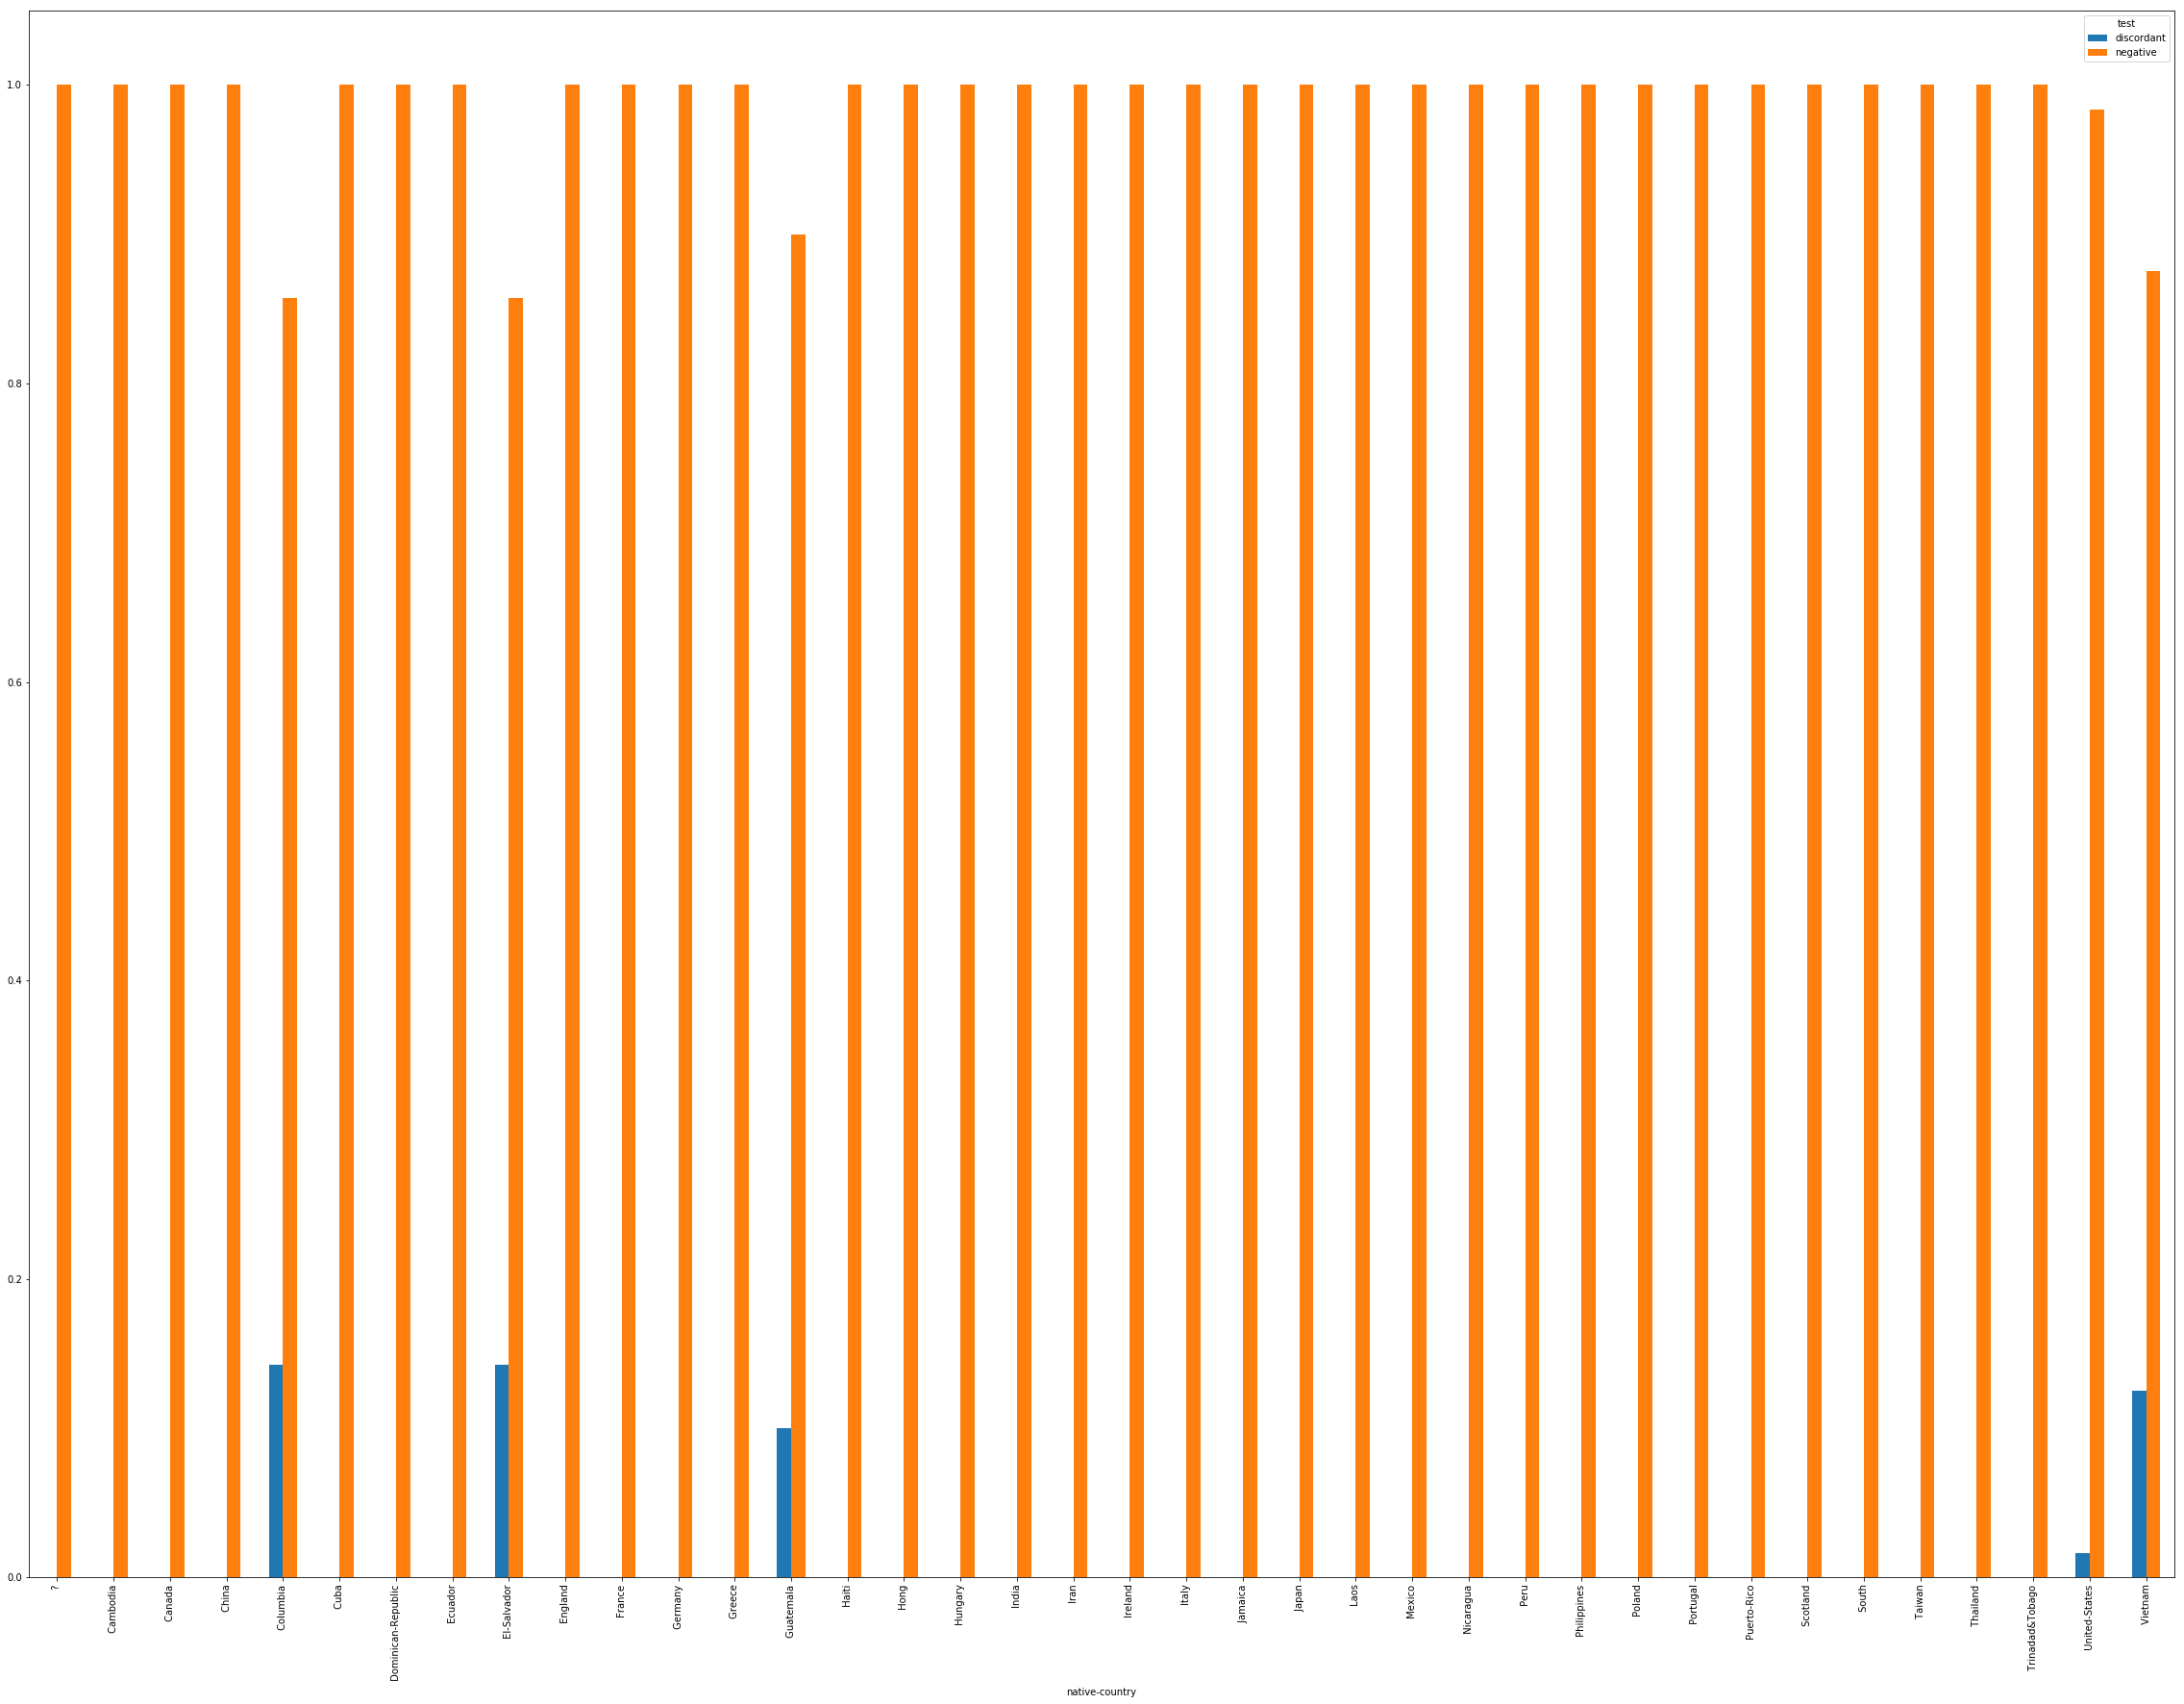

In [68]:
for column2 in train_data.columns:
    if train_data[column2].unique().size < 10 and 'native-country' != column2:
        non_uniform = False
        ctab = pd.crosstab(index=train_data['native-country'], columns=train_data[column2], normalize='index')
        for col in ctab.columns[:-1]:
            if (max(ctab[col]) - min(ctab[col]) > 0.15 or ctab[col].std() / ctab[col].mean() > 0.15):
                non_uniform = True
                break
        if non_uniform:
            ctab.plot.bar( figsize=(40, 30))

Od piatého po 9 ročník nebol tumor, nebo lani v profesorskom. V mnohých ohľadoch vytrčal stlpec hodnoty predškolských detí - väčší výskyt tumorov, atribútu psych, nepodávanie tyroxínu, lepšia nameranosť medicínskych meraní (až na TSH),  čo môže naznačovať súvis niektorých týchto uvedených atribútov s vekom. Test bol až po 8 ročník vždy negatívny, negatívny bol aj v 11-stom a profesorskom.

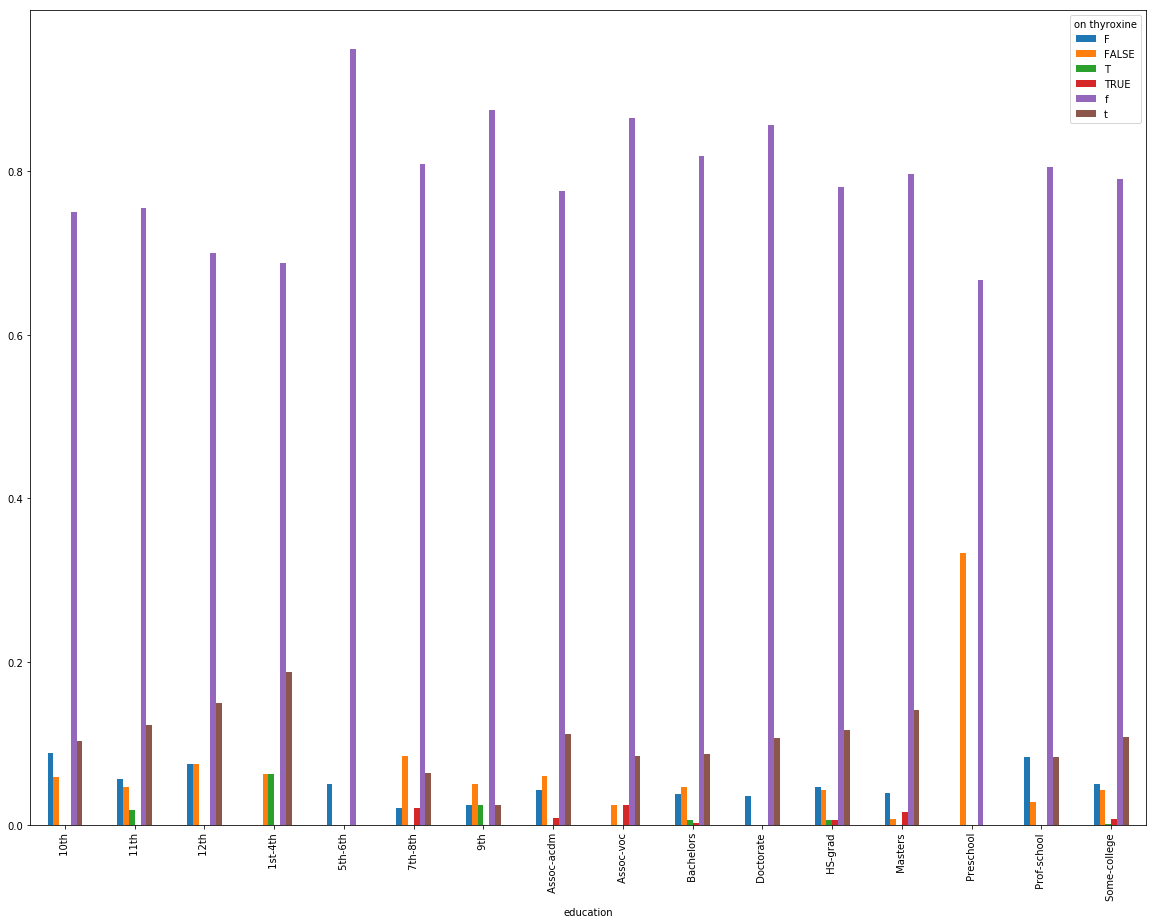

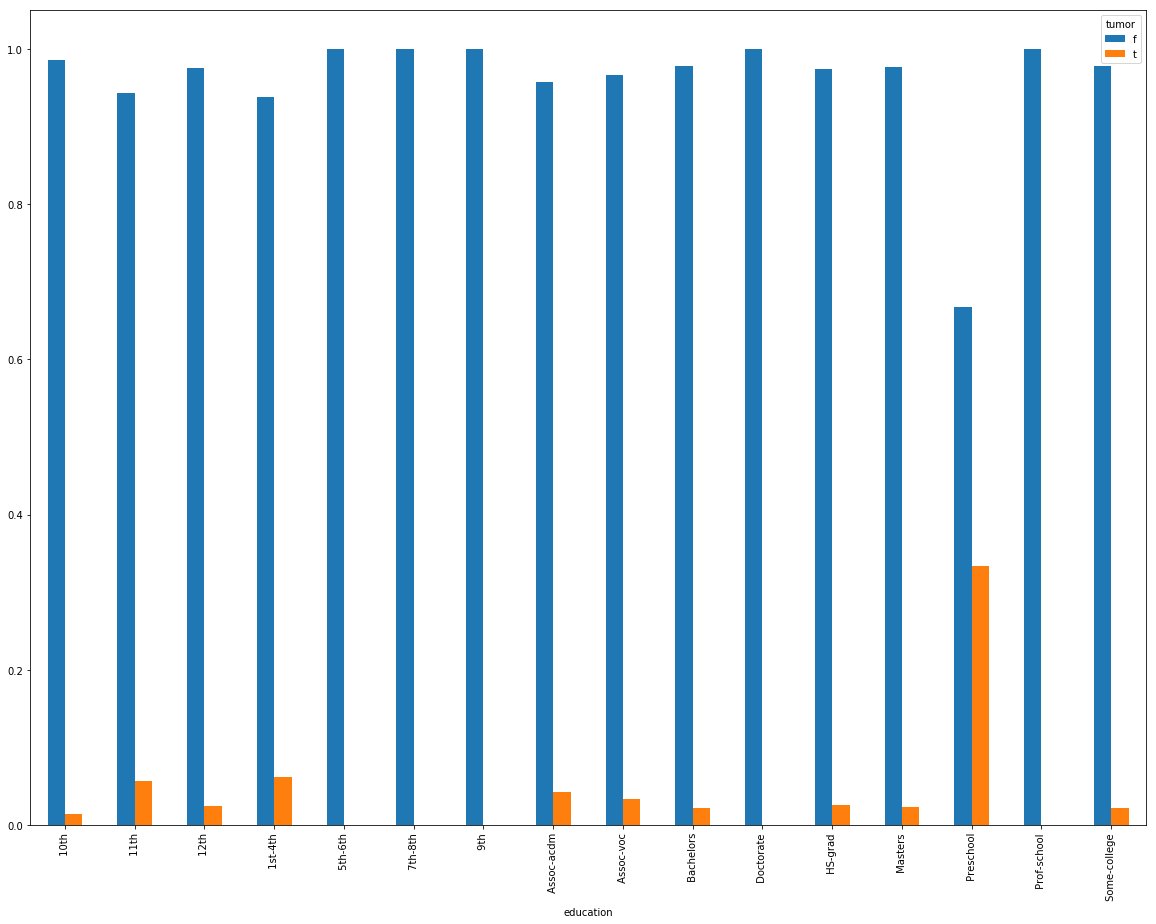

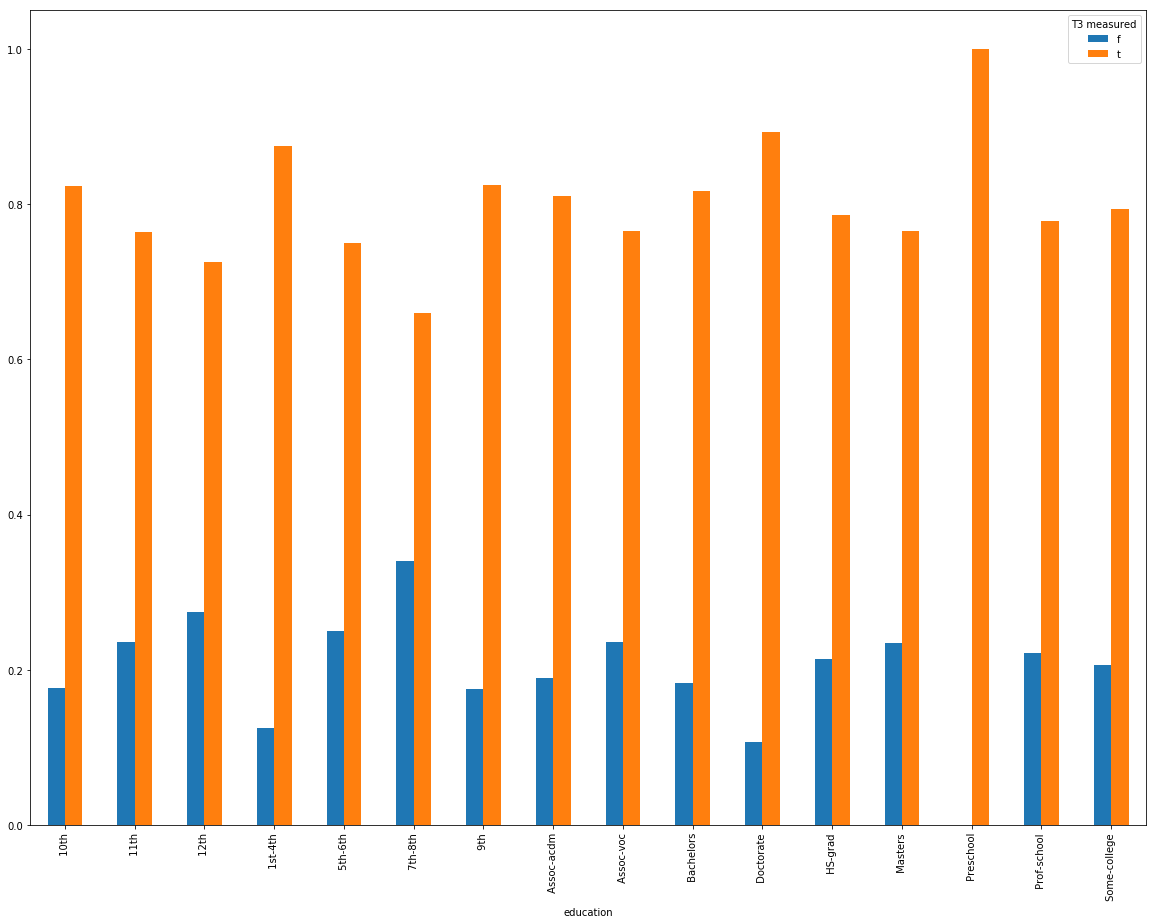

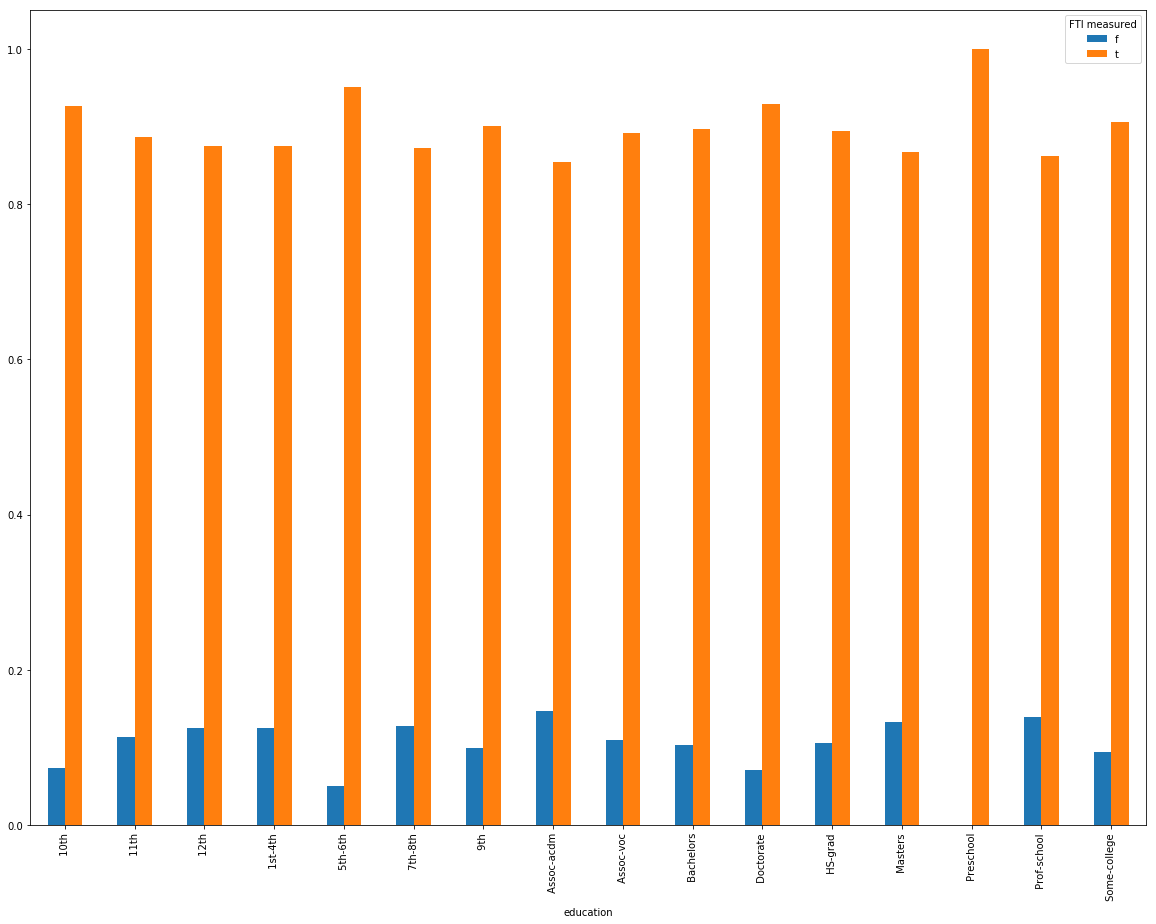

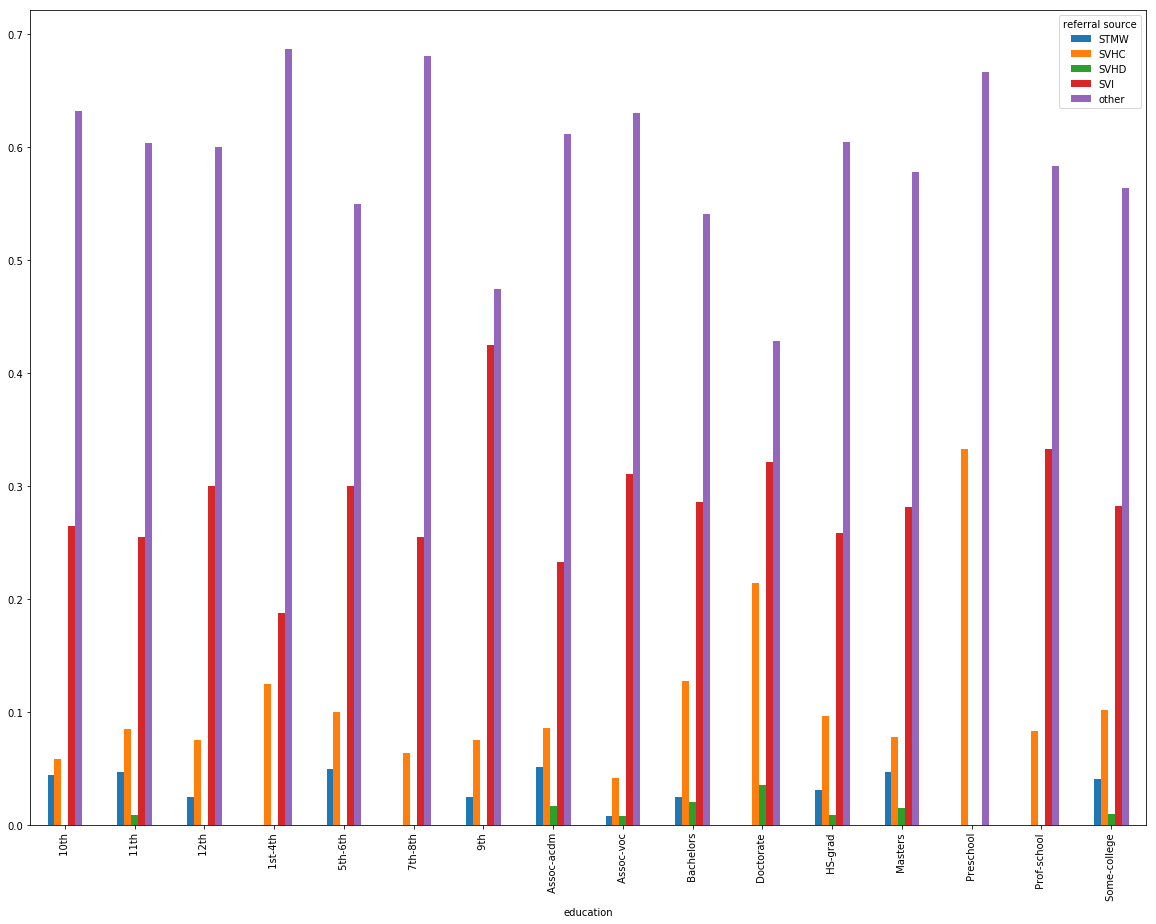

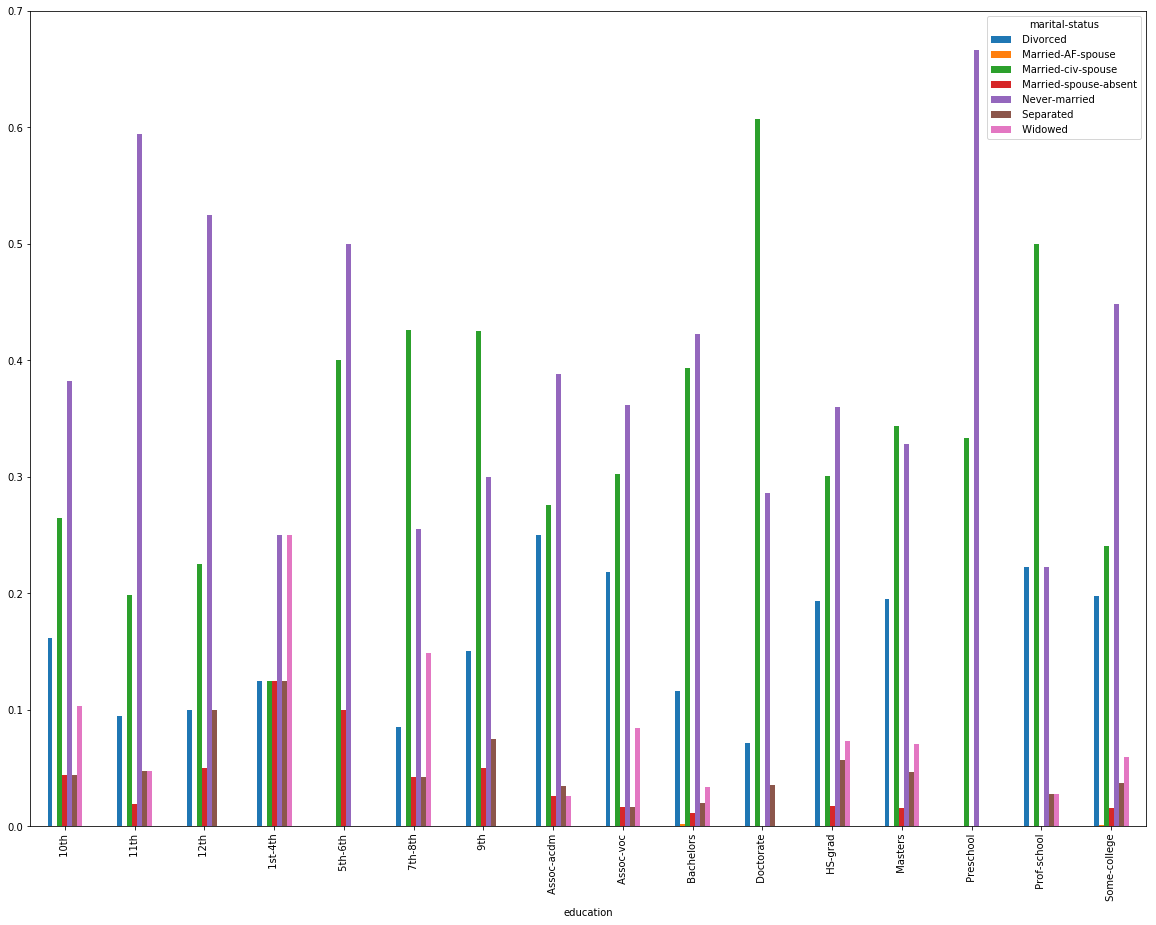

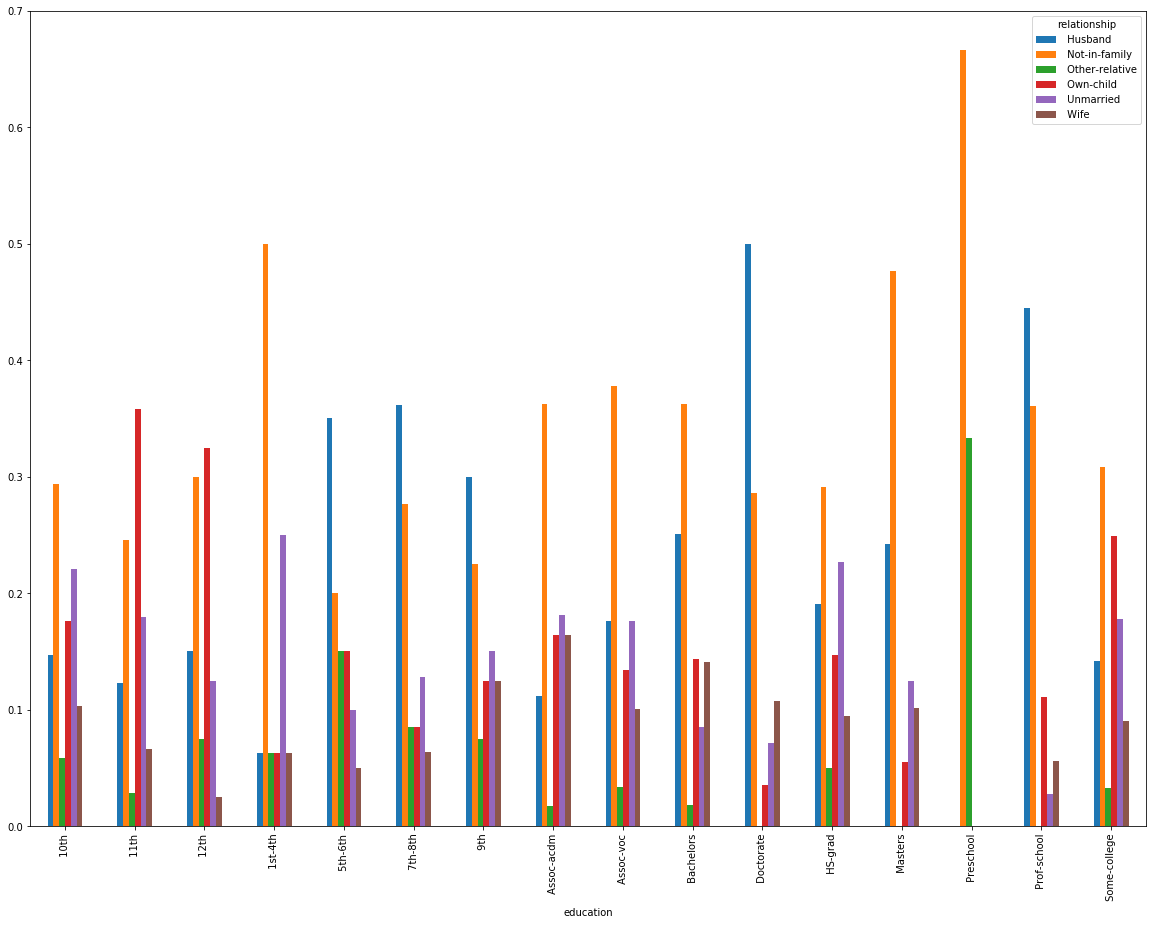

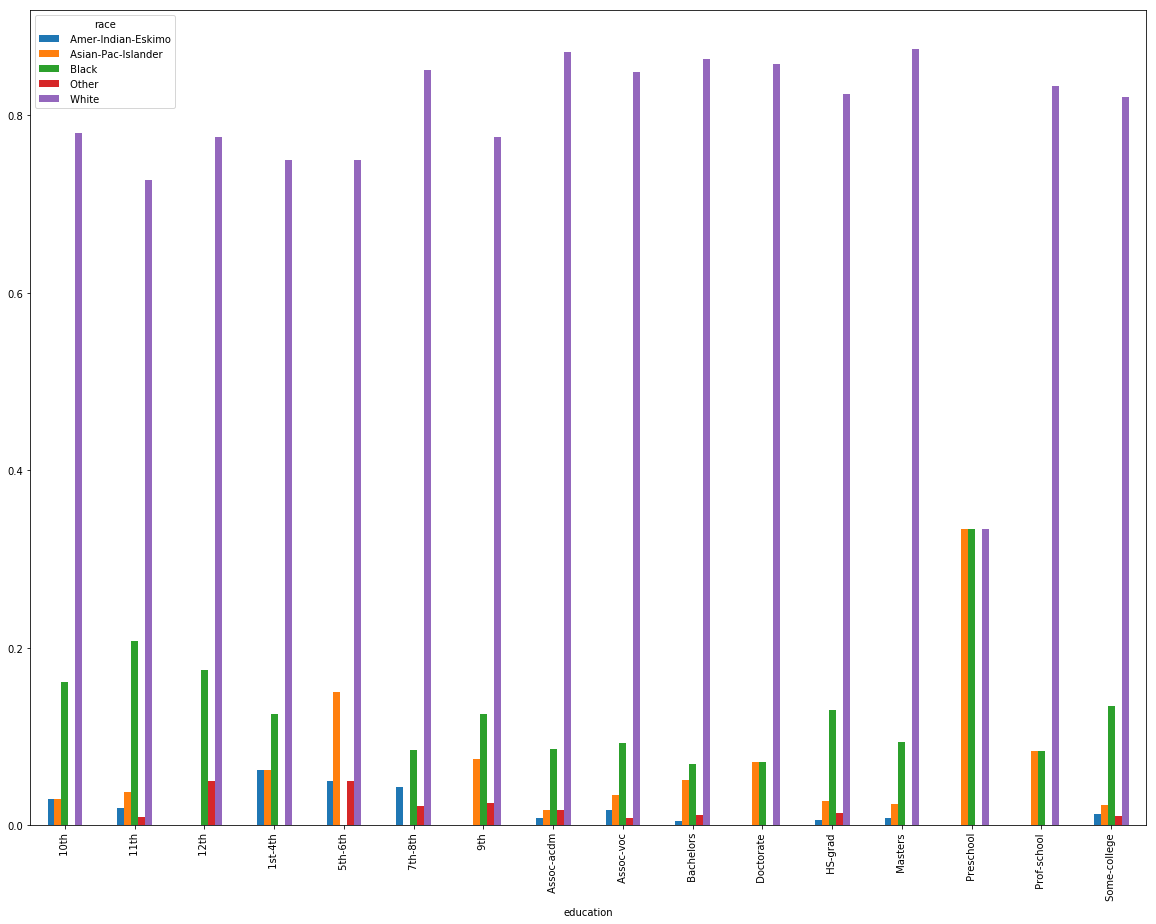

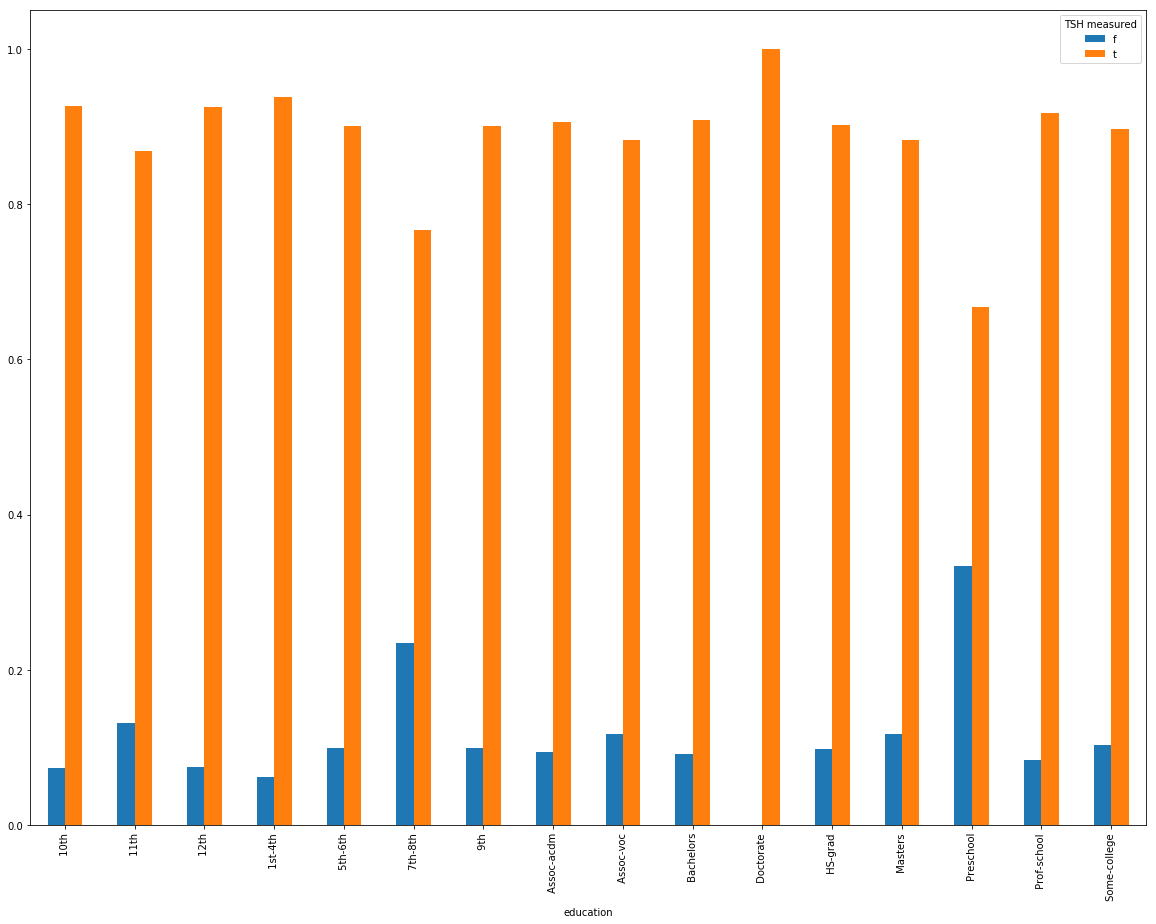

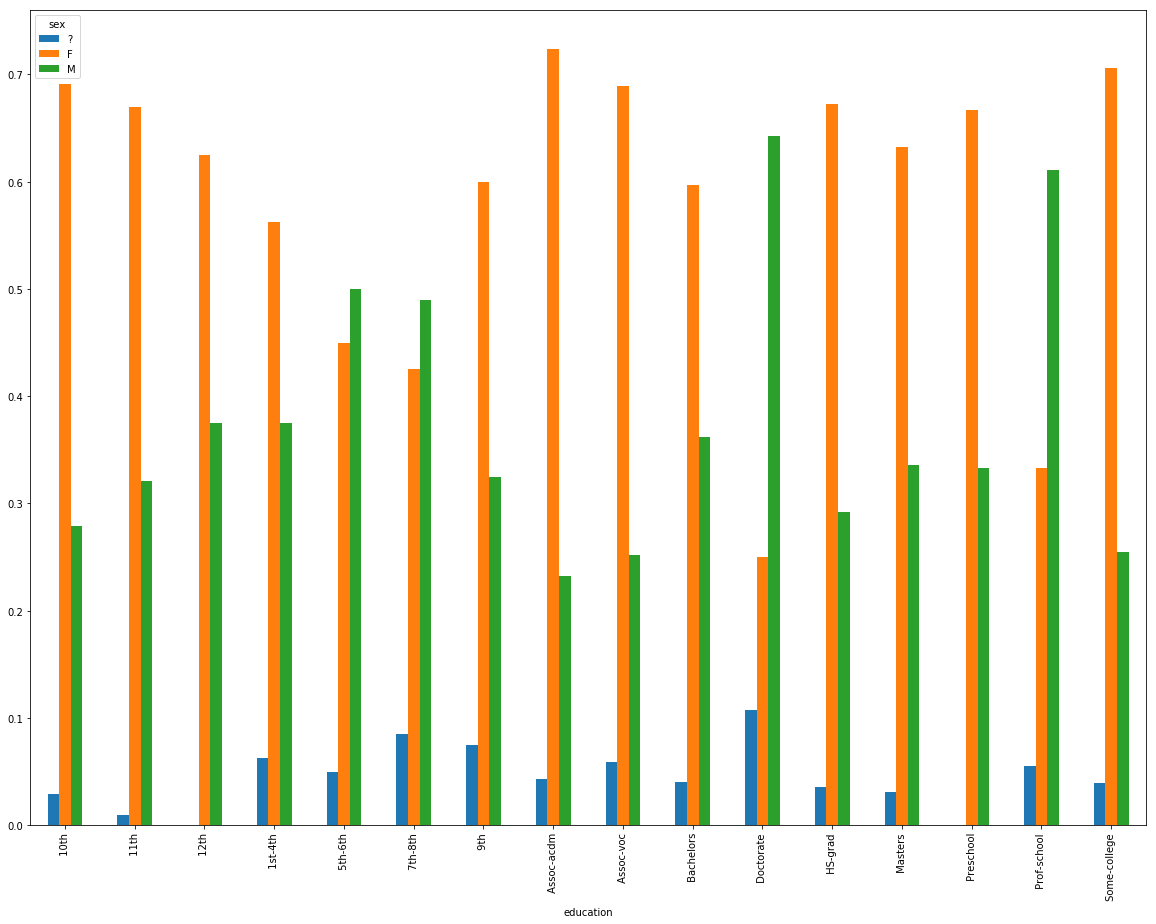

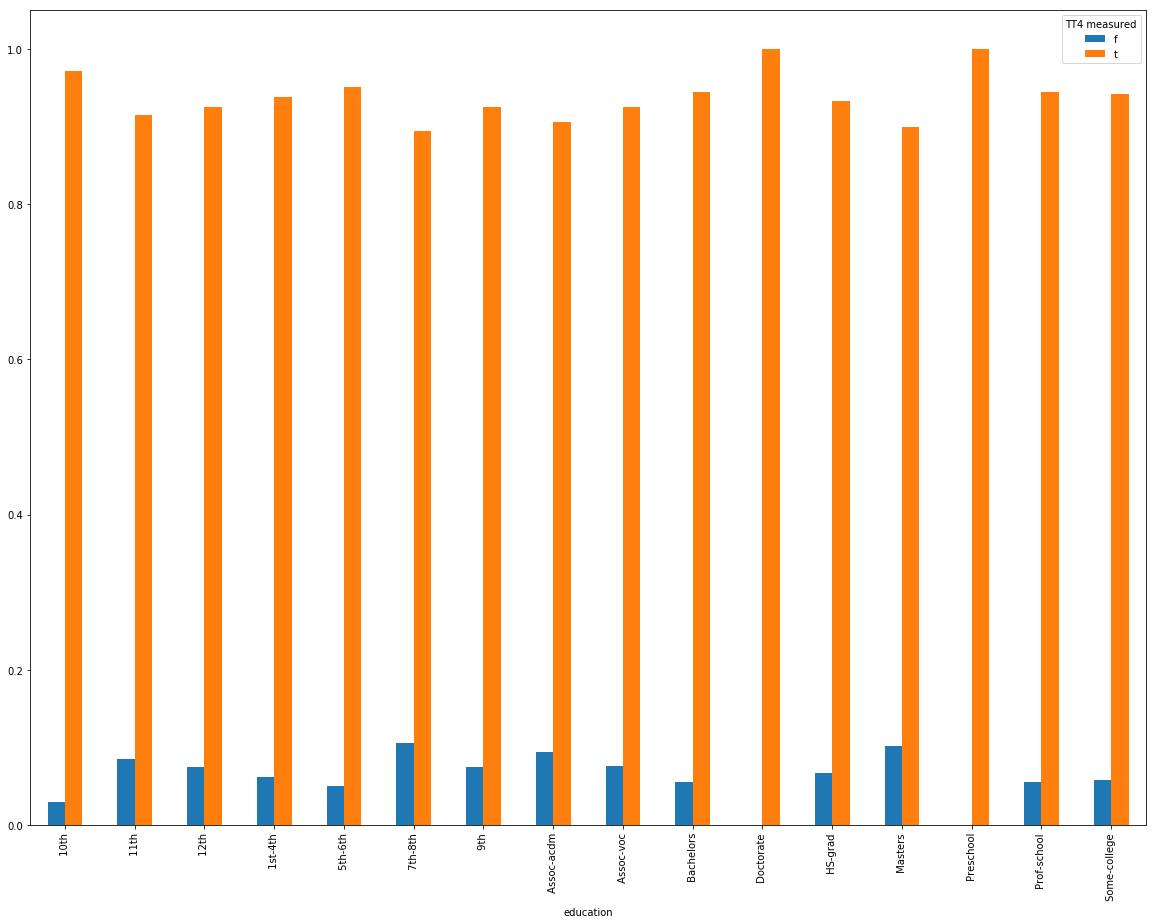

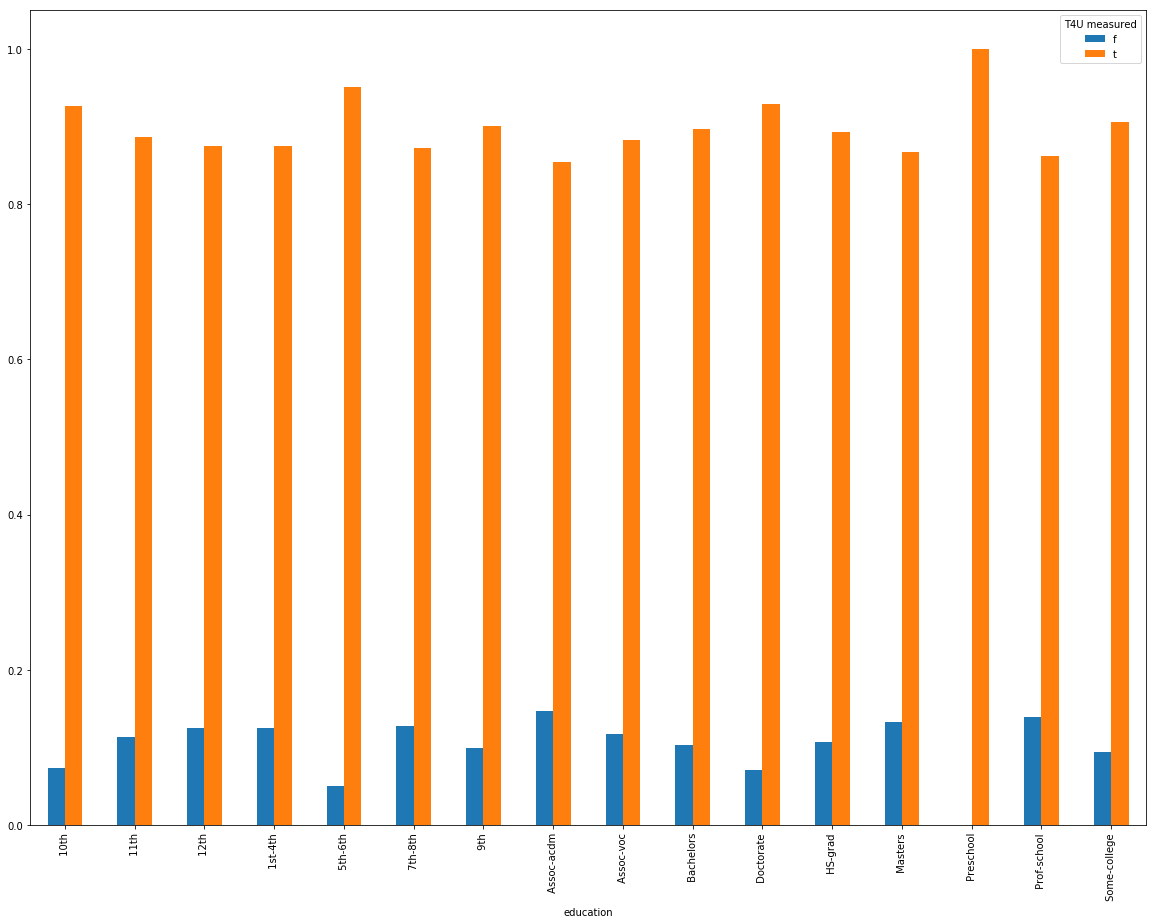

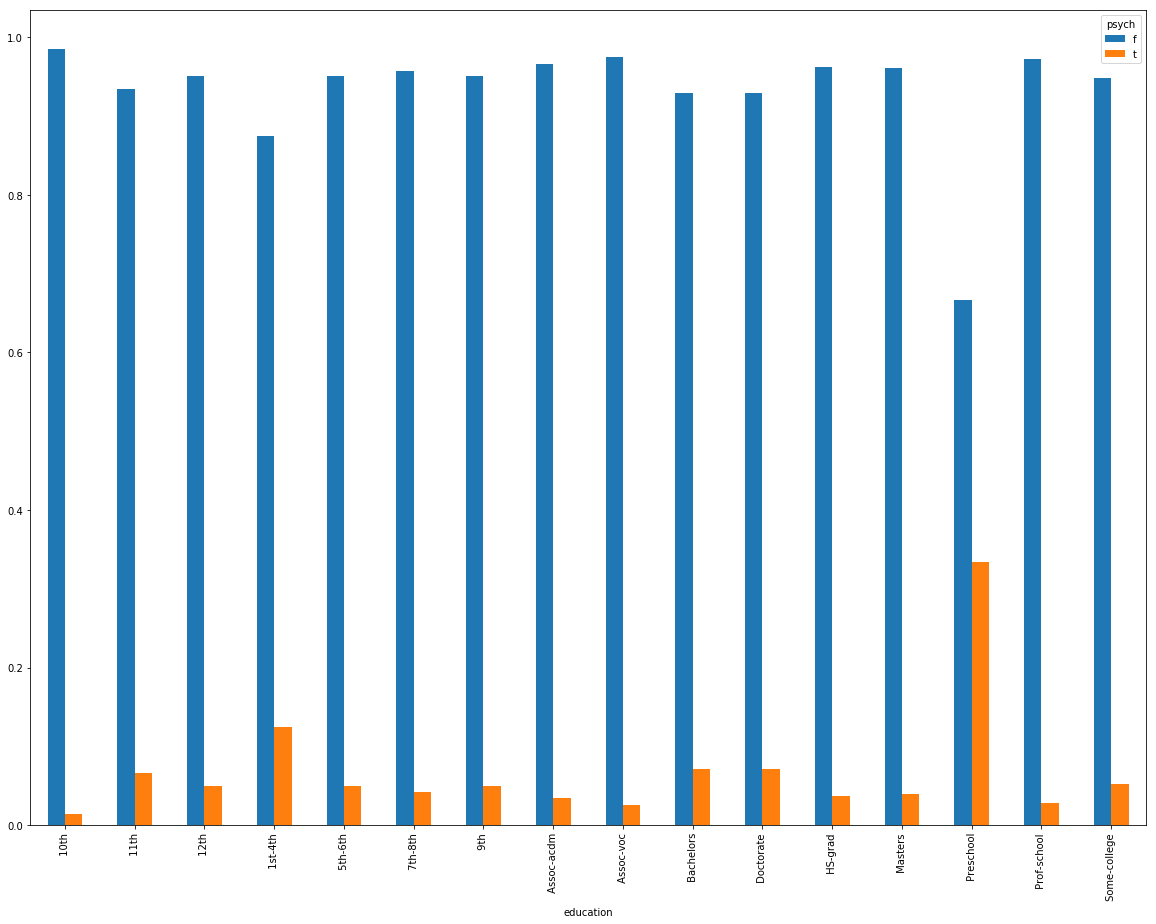

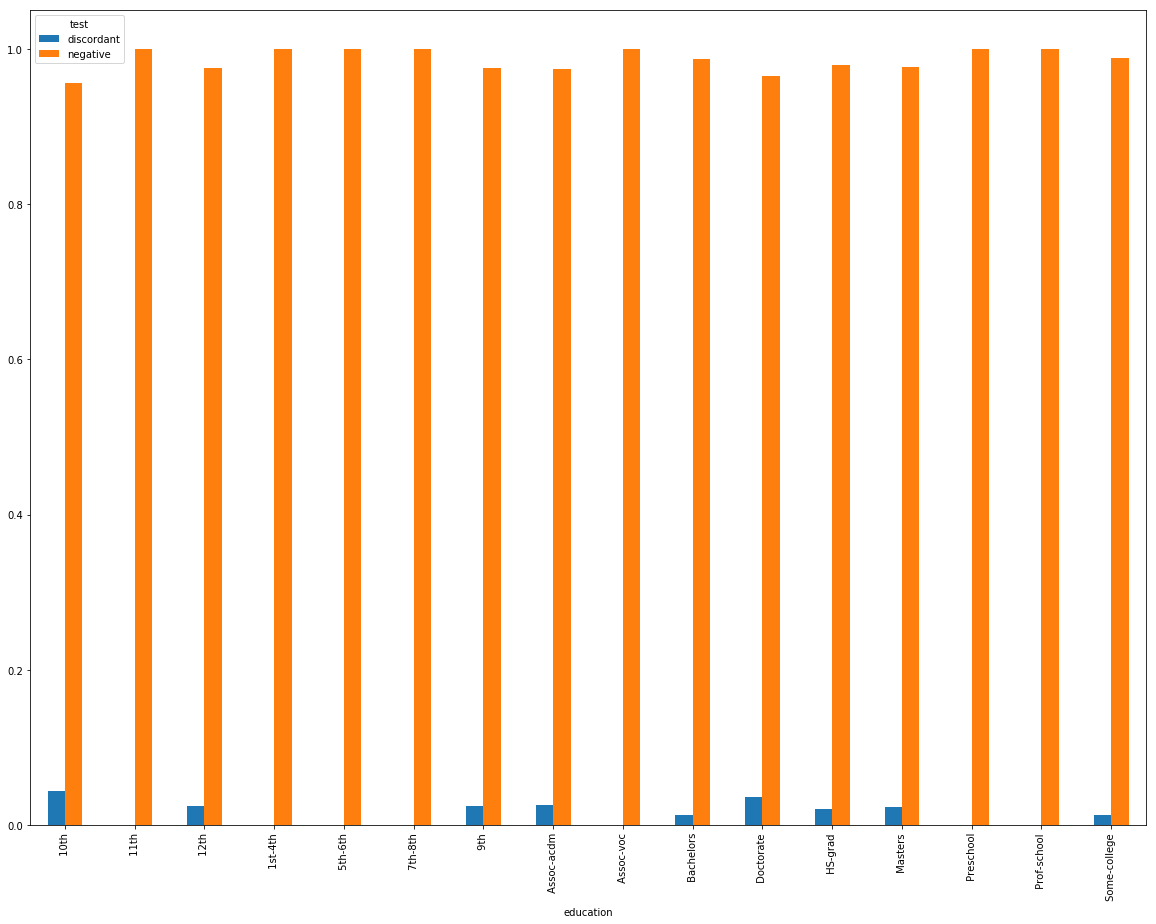

In [60]:
for column2 in train_data.columns:
    if train_data[column2].unique().size < 10 and 'education' != column2:
        non_uniform = False
        ctab = pd.crosstab(index=train_data['education'], columns=train_data[column2], normalize='index')
        for col in ctab.columns[:-1]:
            if (max(ctab[col]) - min(ctab[col]) > 0.15 or ctab[col].std() / ctab[col].mean() > 0.15):
                non_uniform = True
                break
        if non_uniform:
            ctab.plot.bar(figsize=(20, 15))

Rozdiely boli aj pri zamestnaniach. Niektoré triedy zamestnania mali vždy namerané jednotlivé medicínske merania. Zastúpenie rás a pohlavia bolo v jednotlivých zamestnanich odlišné. V niektorých triedach zamestnania boli testy výlučne negatívne.

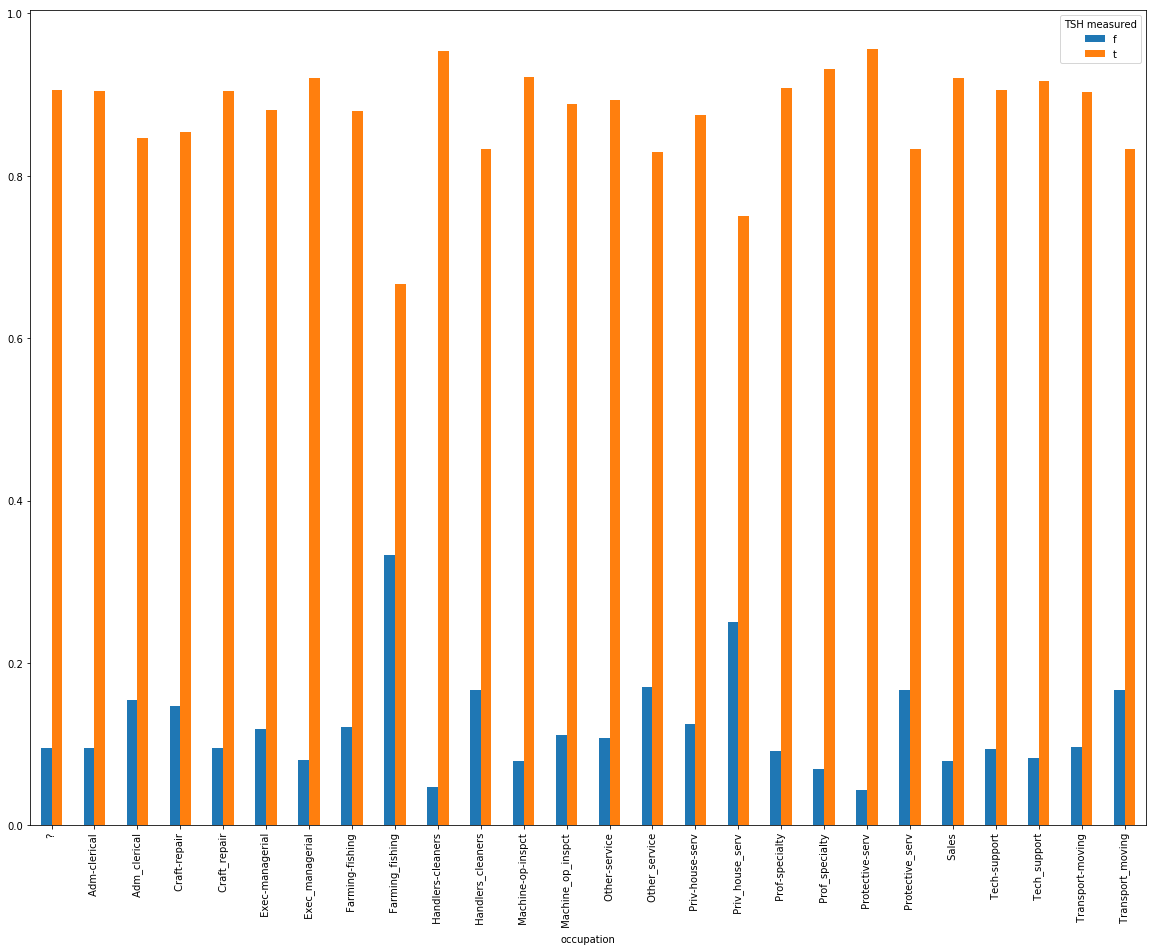

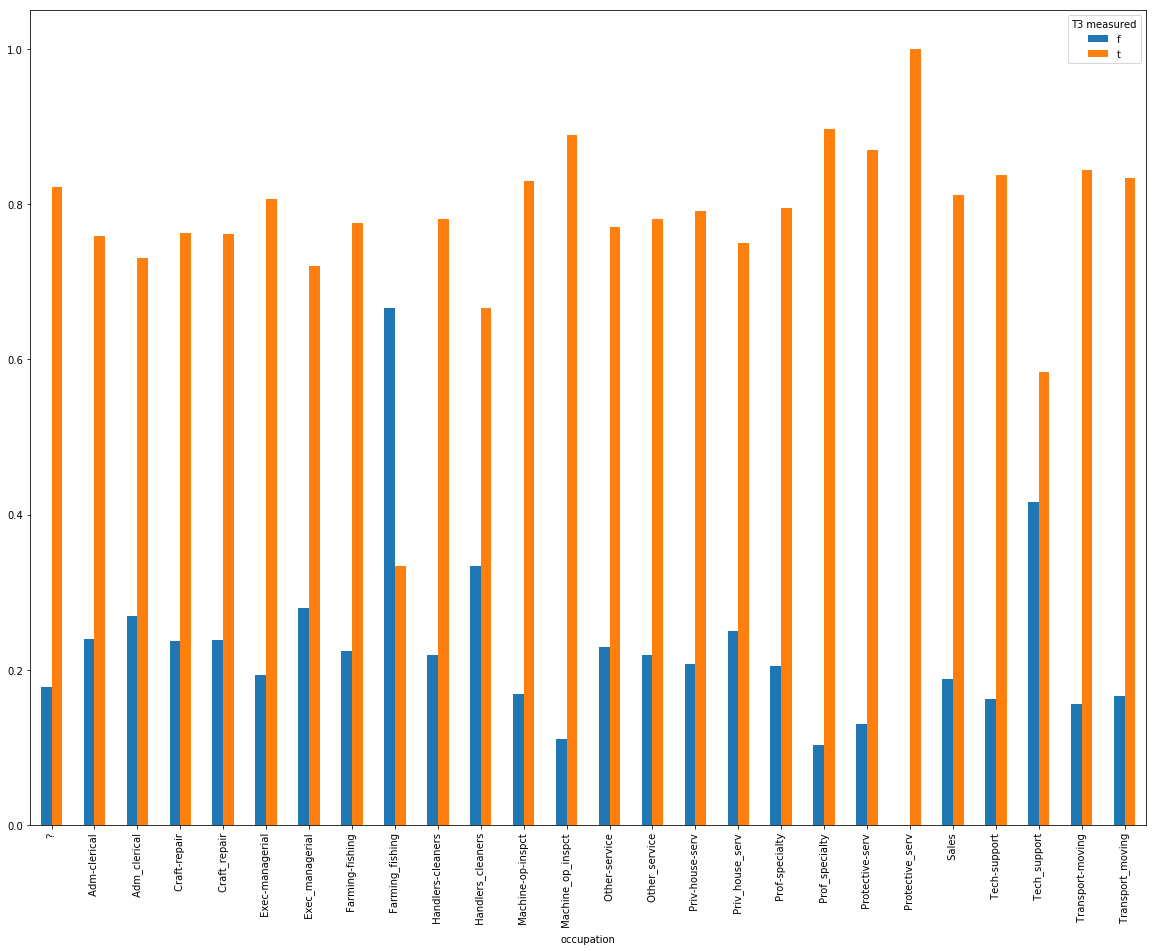

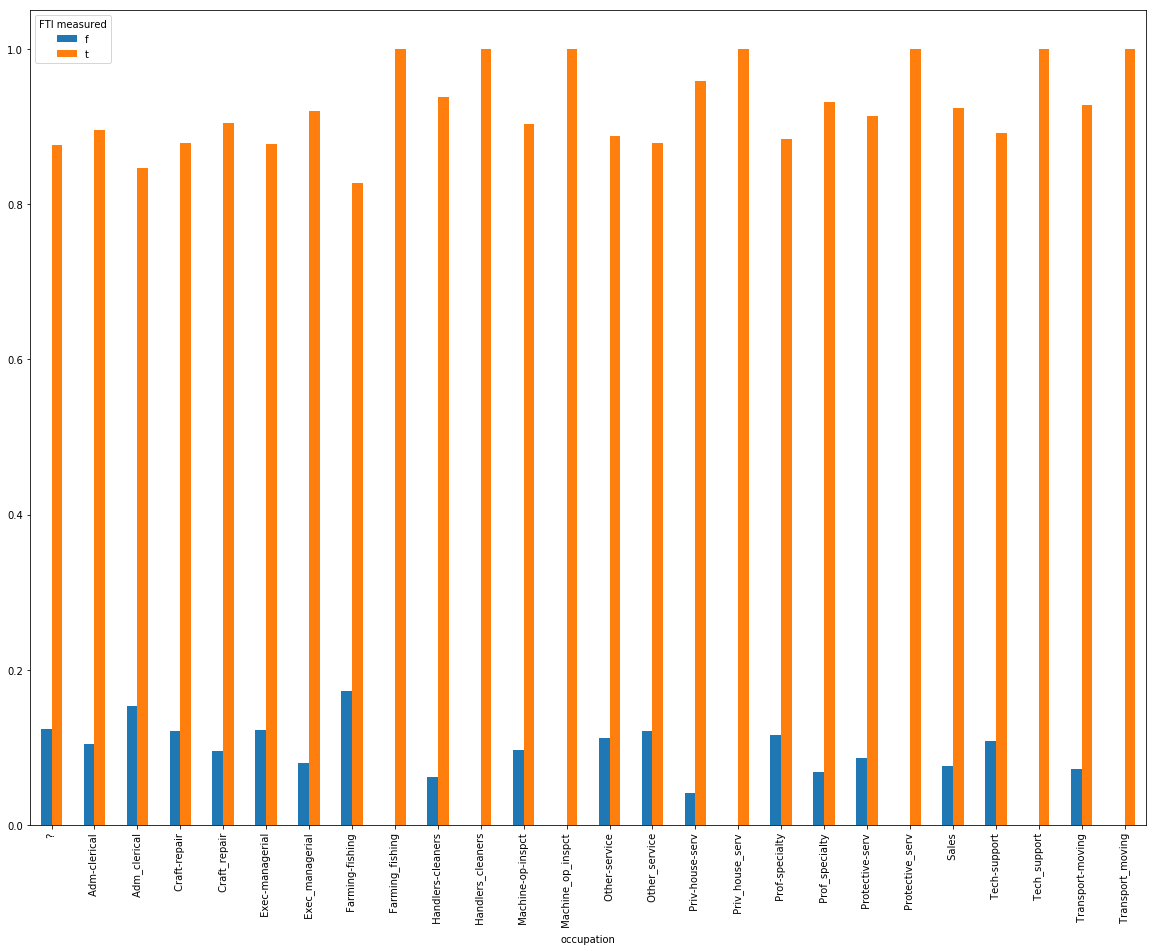

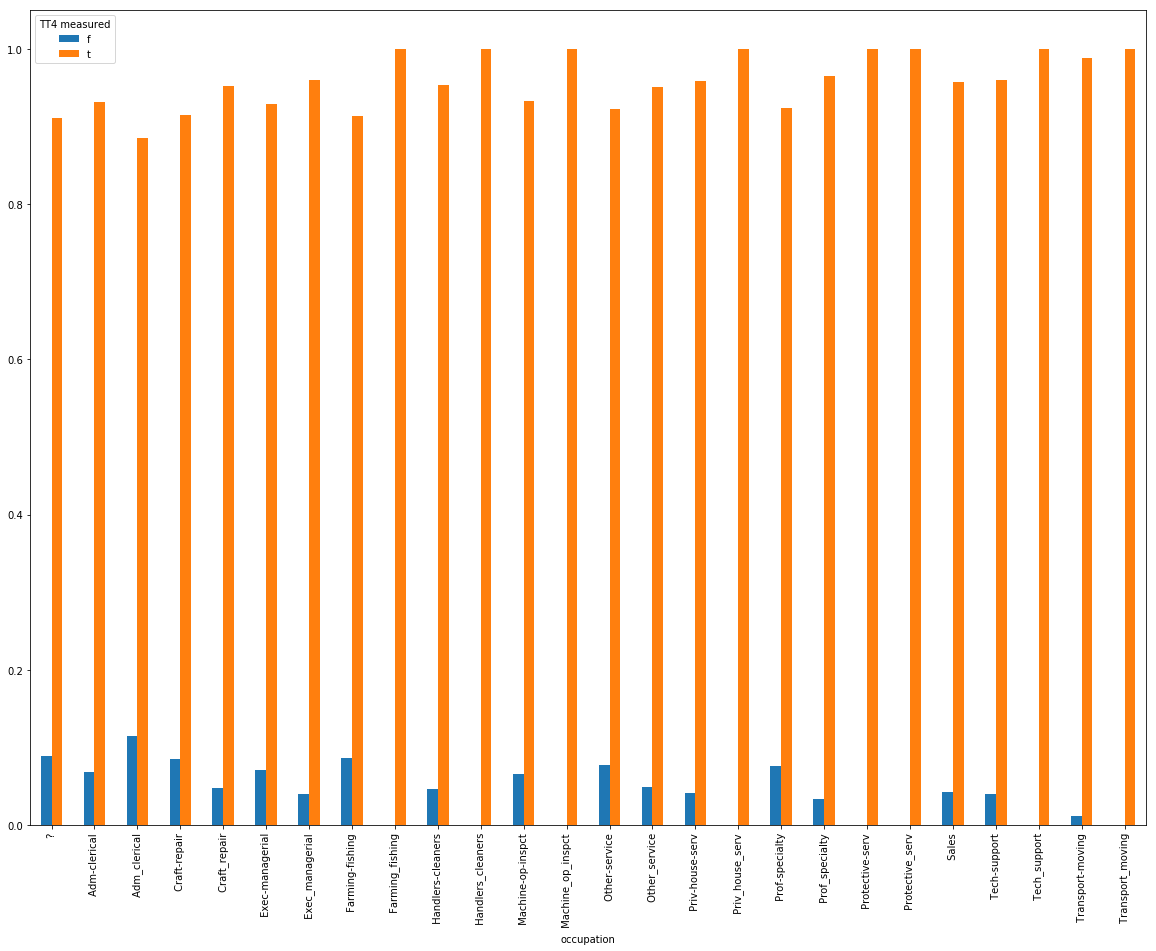

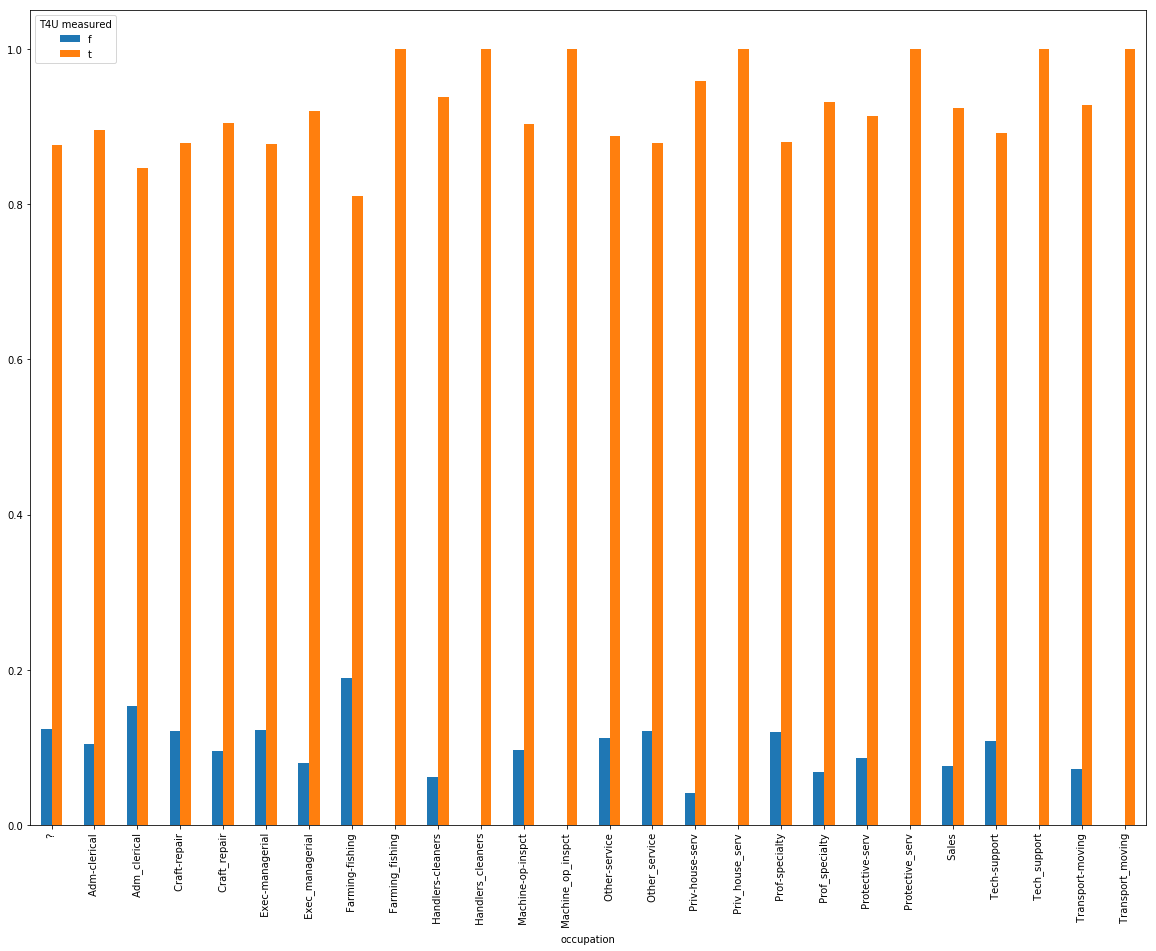

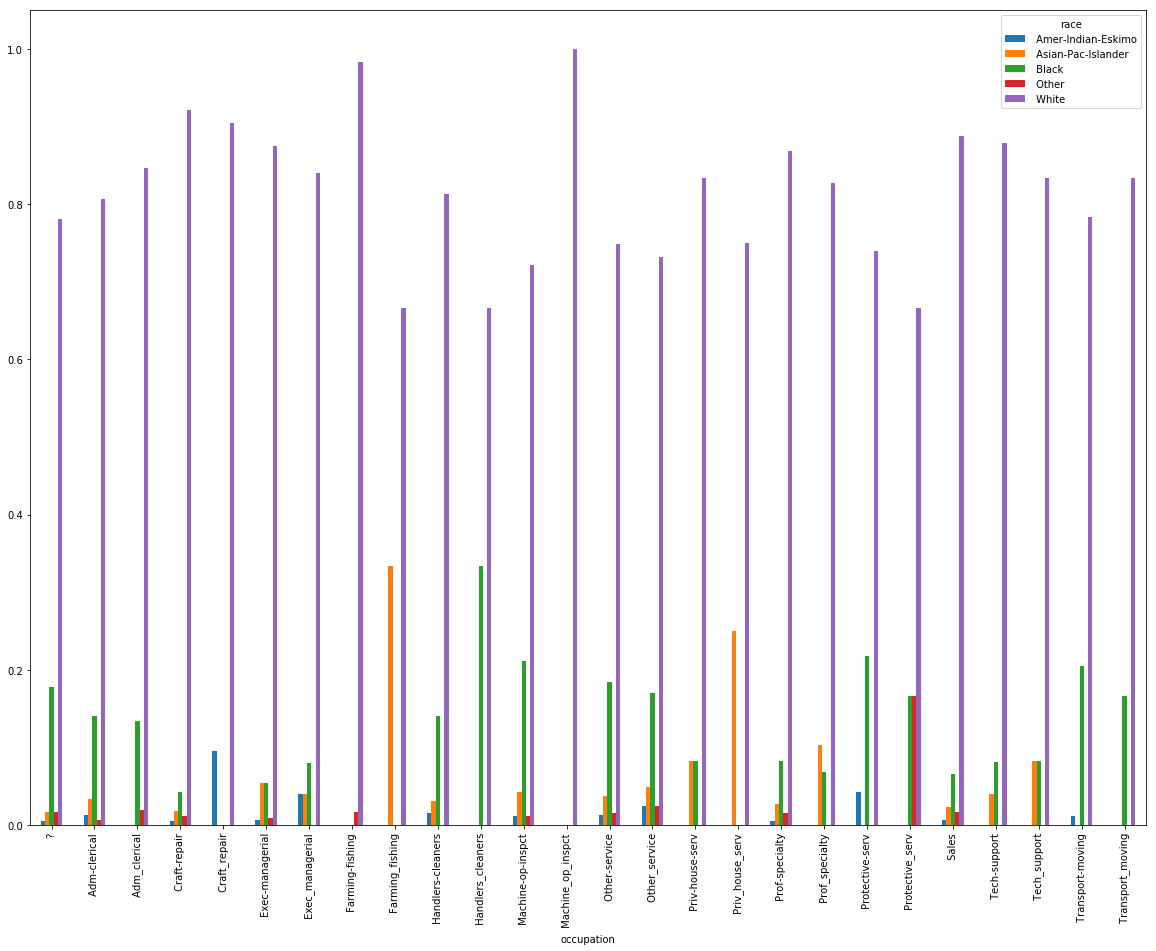

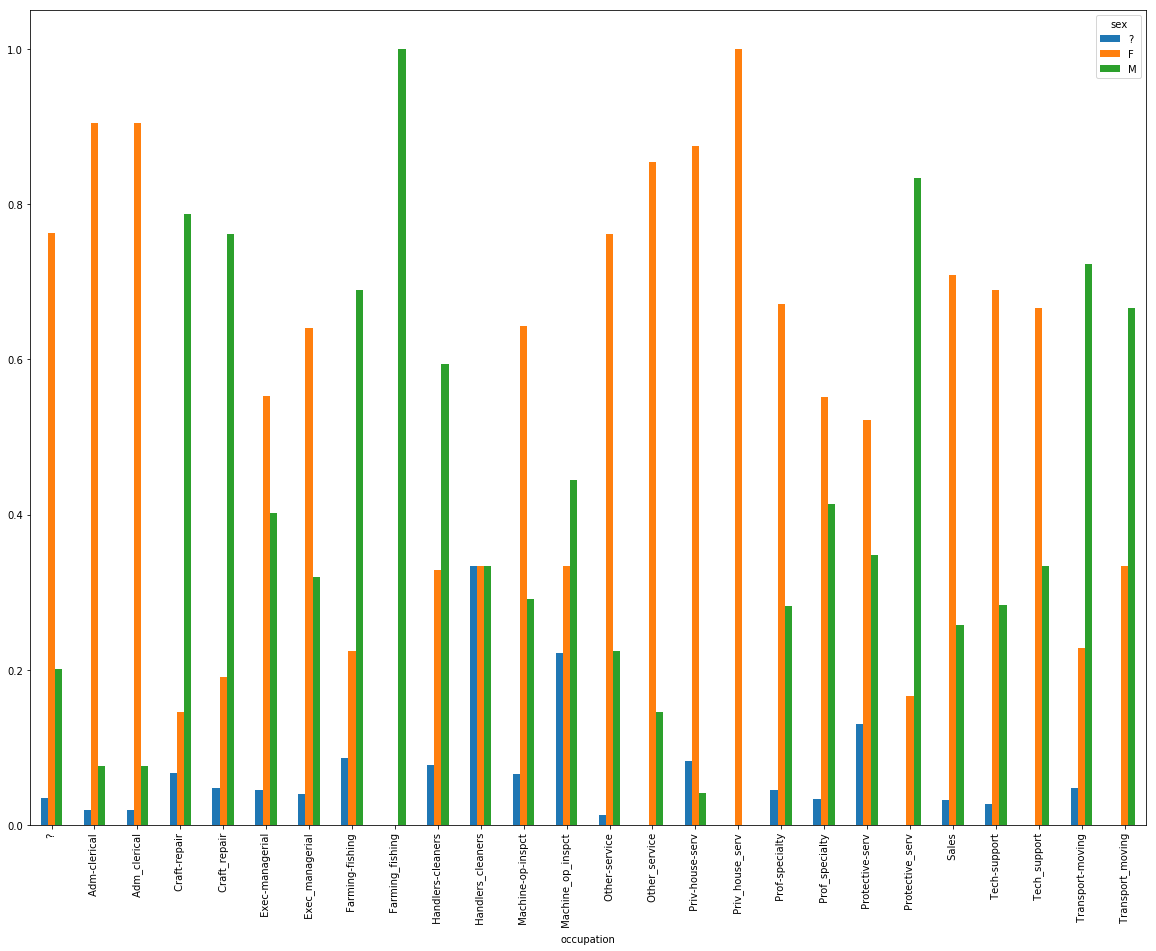

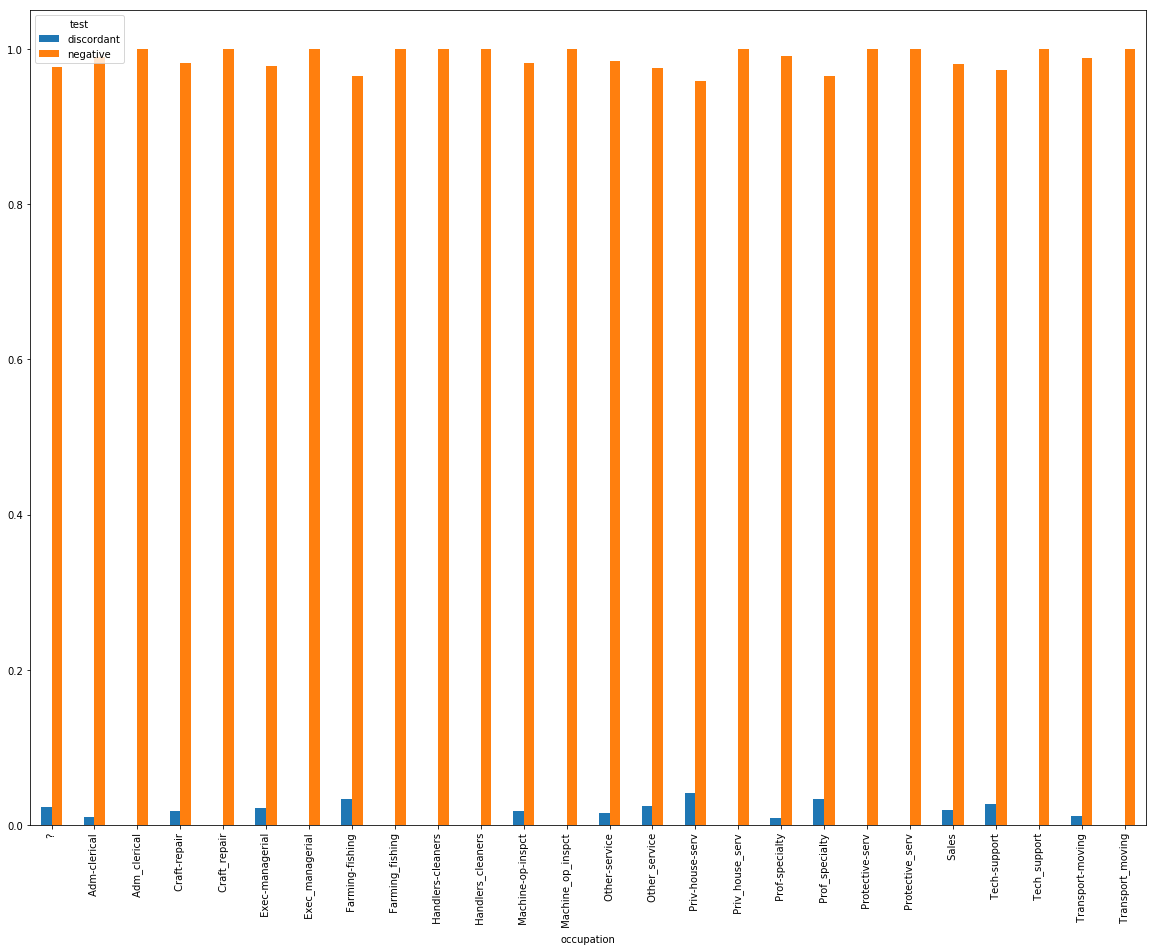

In [52]:
for column2 in ['TSH measured', 'T3 measured', 'FTI measured', 'TT4 measured', 'T4U measured', 'race', 'sex', 'test']:
    if train_data[column2].unique().size < 10 and 'occupation' != column2:
        non_uniform = False
        ctab = pd.crosstab(index=train_data['occupation'], columns=train_data[column2], normalize='index')
        for col in ctab.columns[:-1]:
            if (ctab[col].std() / ctab[col].mean() > 0.15):
                non_uniform = True
                break
        if non_uniform:
            ctab.plot.bar(figsize=(20, 15))

### 2.1.2 Spojité-kategorické atribúty

kategoricke-spojite

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


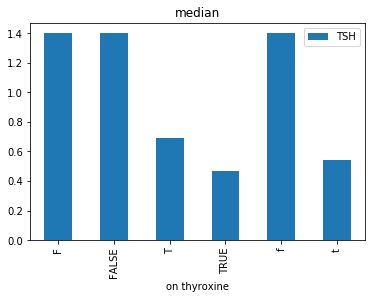

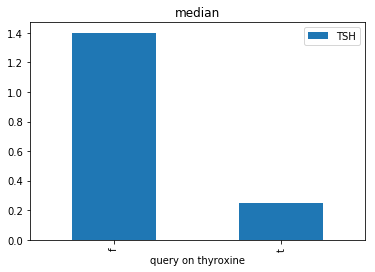

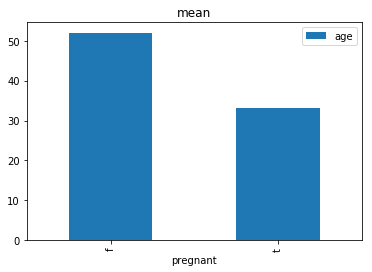

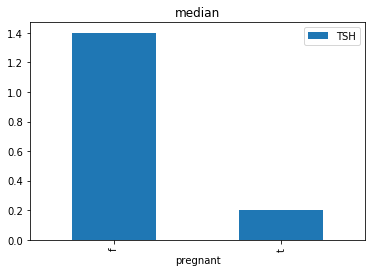

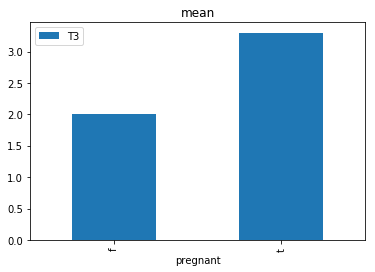

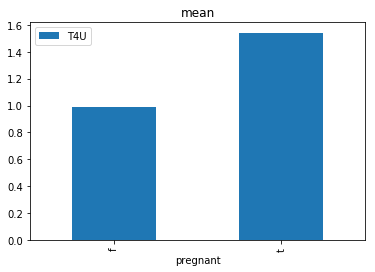

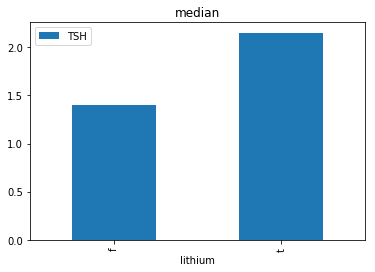

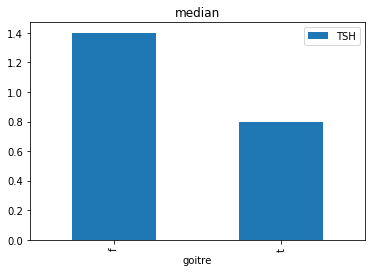

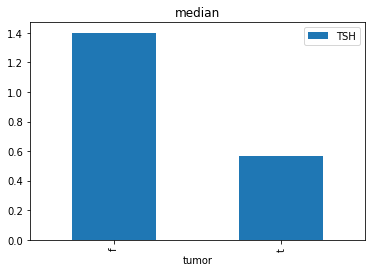

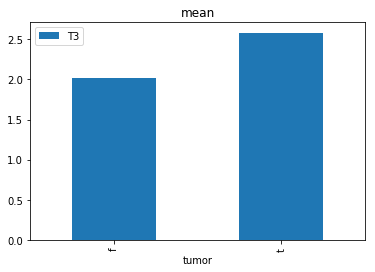

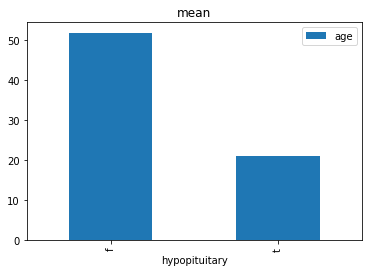

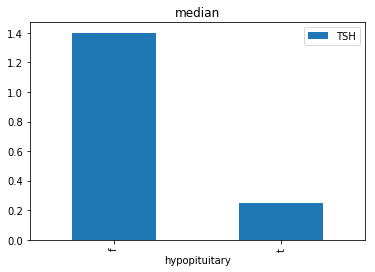

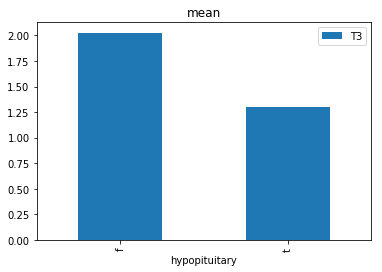

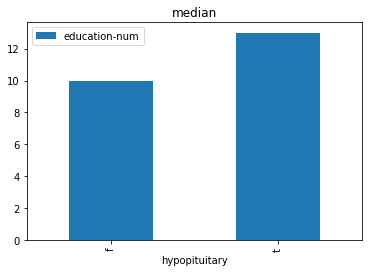

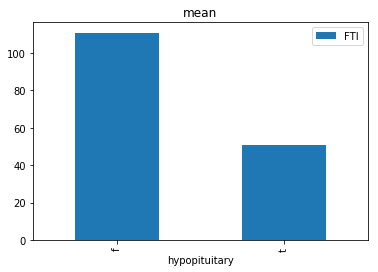

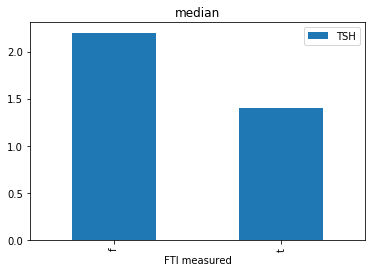

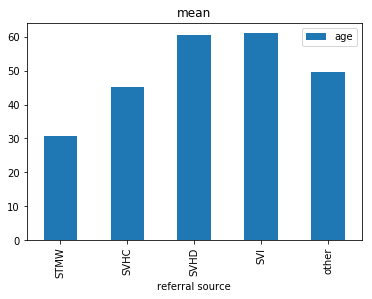

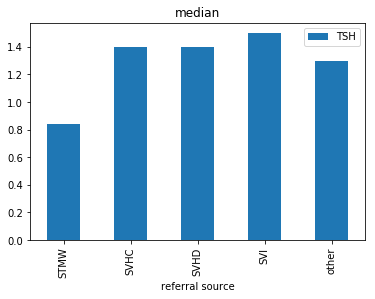

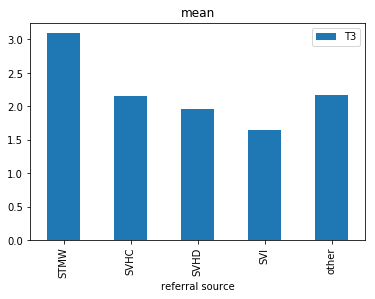

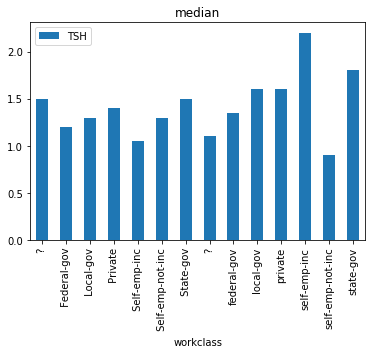

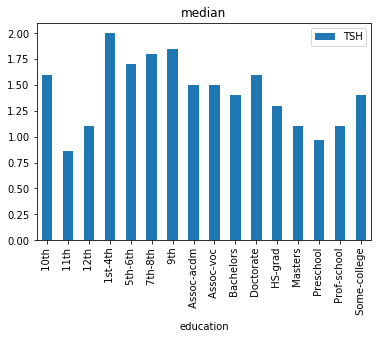

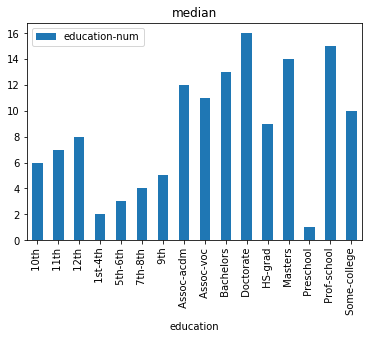

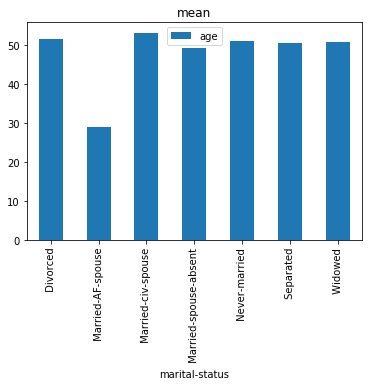

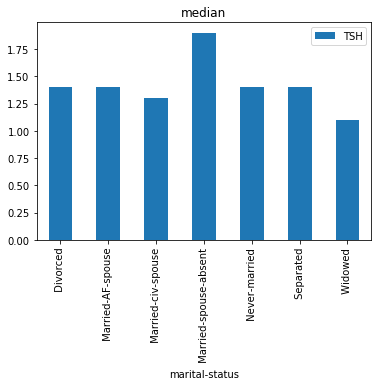

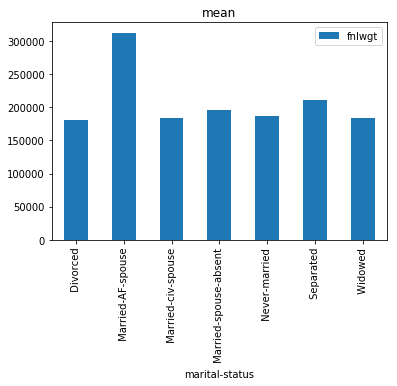

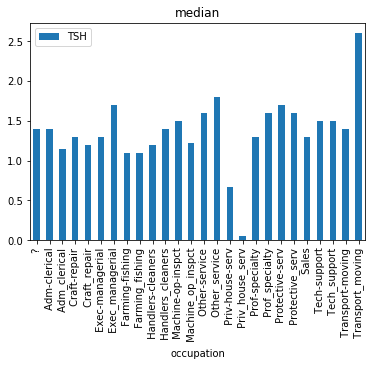

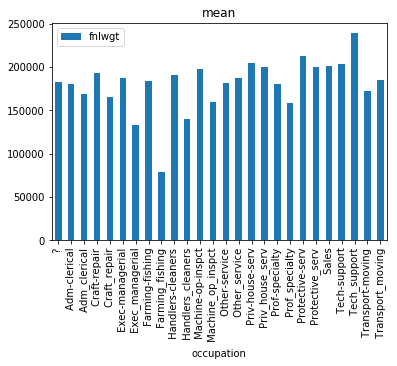

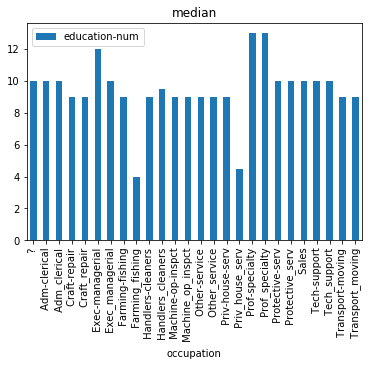

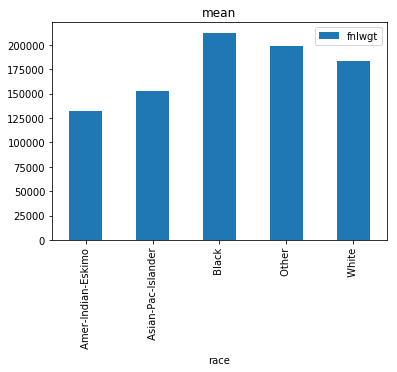

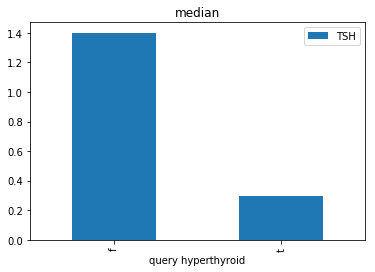

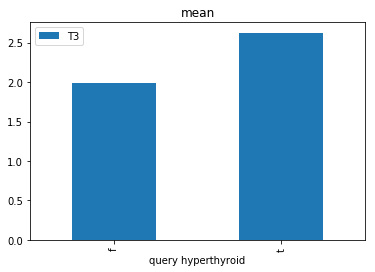

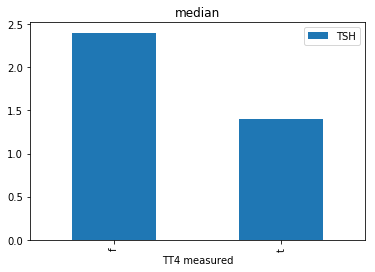

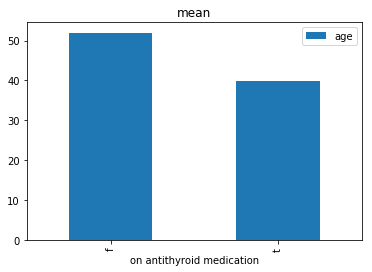

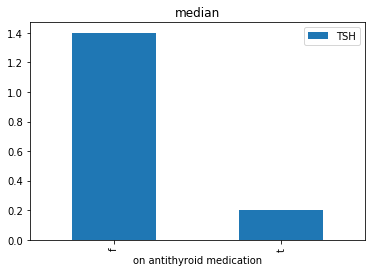

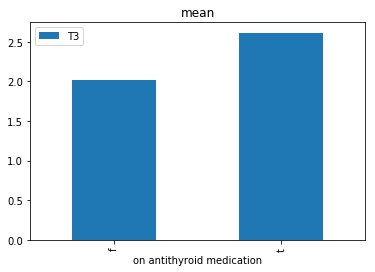

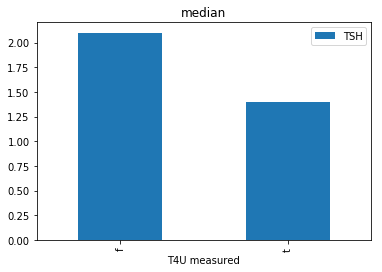

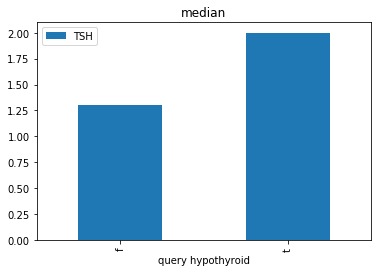

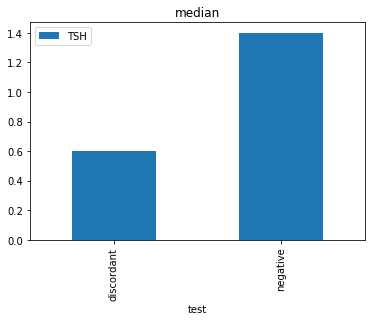

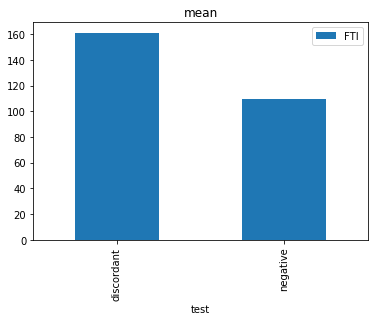

In [67]:
#pri rozhodovani, ci pouzit priemer alebo median som pouzil coefficient of variance (CV)
for column in train_data.columns[train_data.dtypes == np.object]:
    for column2 in train_data.columns:
        if np.issubdtype(train_data[column2].dtype, np.number) and column != column2 and train_data[column].unique().size < 35:
            if train_data[column2].std() / train_data[column2].mean() <= 1:
                means = train_data.groupby(column).mean()[[column2]]
                if means[column2].std() / means[column2].mean() > 0.15:
                    means.plot(kind='bar', title='mean', stacked=True)
                    #fig, ax = plt.subplots()
                    #for name, group in train_data.groupby(column):
                    #    ax.plot(group[column2], marker='o', linestyle='', label=name)
                    #ax.legend()
            else:
                medians = train_data.groupby(column).median()[[column2]]
                if medians[column2].mean() != 0 and medians[column2].std() / medians[column2].mean() > 0.15:
                    medians.plot(kind='bar', title='median', stacked=True)
        

### 2.1.3 Spojité-spojité atribúty

age - T3  correlation:  -0.24237972891474738
age - T4U  correlation:  -0.15697085287428023
TSH - T3  correlation:  -0.16089030633841833
TSH - FTI  correlation:  -0.291188373868199
T3 - age  correlation:  -0.24237972891474735
T3 - TSH  correlation:  -0.16089030633841833
T3 - T4U  correlation:  0.46343405909602275
T3 - FTI  correlation:  0.3510133883173405
T4U - age  correlation:  -0.15697085287428023
T4U - T3  correlation:  0.46343405909602275
T4U - FTI  correlation:  -0.17305613589545352
FTI - TSH  correlation:  -0.291188373868199


C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FTI - T3  correlation:  0.3510133883173405
FTI - T4U  correlation:  -0.17305613589545352


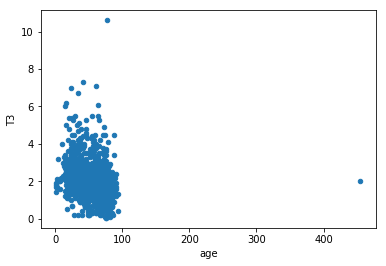

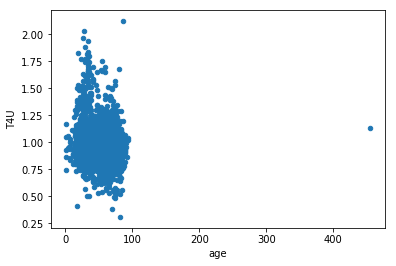

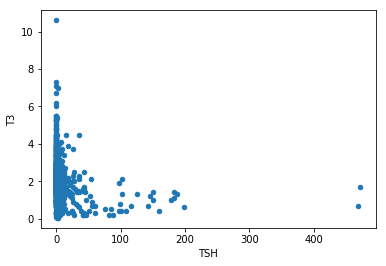

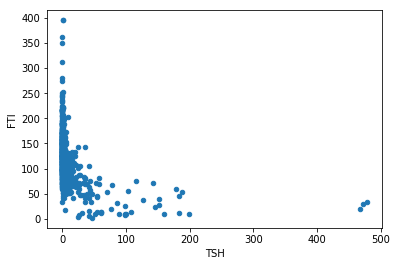

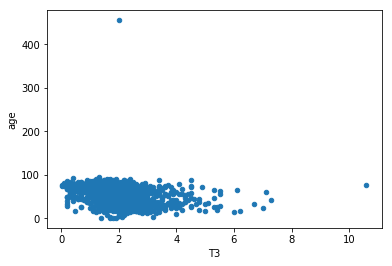

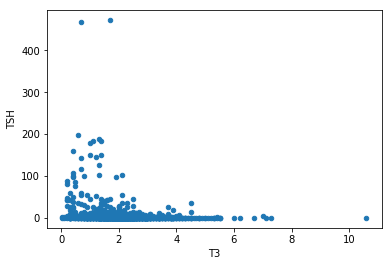

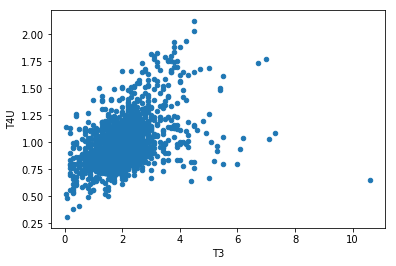

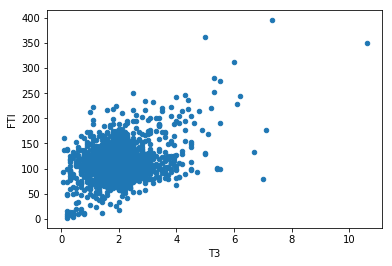

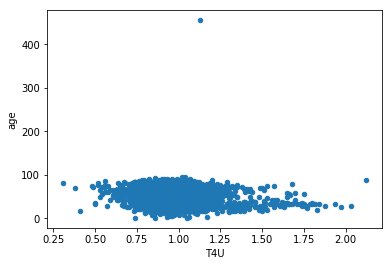

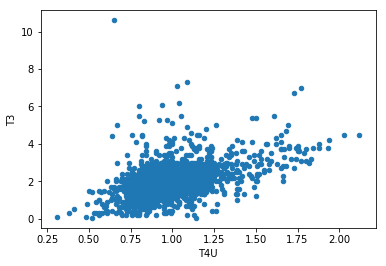

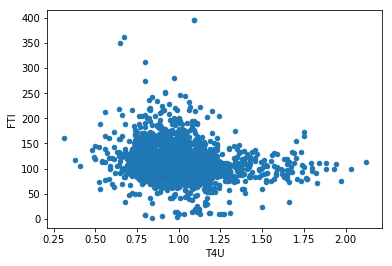

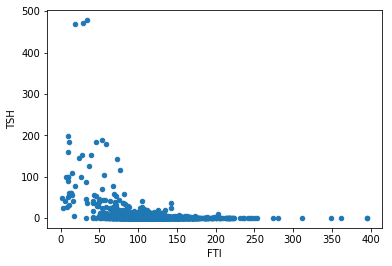

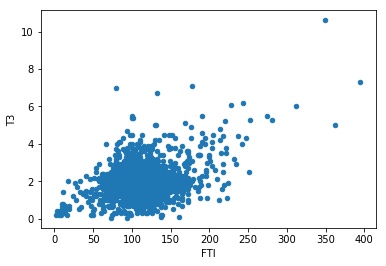

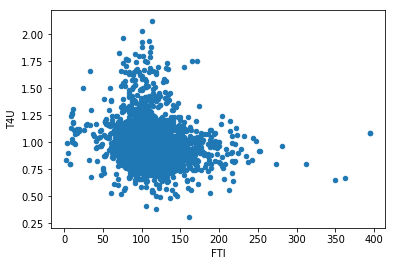

In [91]:
for column in train_data.columns:
    if np.issubdtype(train_data[column].dtype, np.number):
        for column2 in train_data.columns:
            if np.issubdtype(train_data[column2].dtype, np.number):
                corr = train_data[column].corr(train_data[column2])
                if (corr > 0.15 or corr < -0.15) and column != column2:
                    print(column, "-", column2, " correlation: ", train_data[column].corr(train_data[column2]))
                    train_data.plot.scatter(x=column, y=column2)
                    plt.figure()

0.0
